In [104]:
#install.packages("ggupset")
#install.packages("ggcorrplot")
#if (!require(devtools)) install.packages("devtools")
#devtools::install_github("yanlinlin82/ggvenn")
#install.packages("GGally")
#install.packages("openxlsx")
#if (!requireNamespace("BiocManager", quietly = TRUE))
#  install.packages("BiocManager")
#BiocManager::install("GenomicDistributions")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'GenomicDistributions'”
Old packages: 'ape', 'BiocFileCache', 'BiocManager', 'biomaRt', 'blob', 'brew',
  'broom', 'clipr', 'commonmark', 'desc', 'doParallel', 'foreach', 'formatR',
  'gdata', 'GenomeInfoDb', 'GenomicFeatures', 'gert', 'gplots', 'httpuv',
  'httr', 'IRdisplay', 'IRkernel', 'iterators', 'kernlab', 'ks', 'lmtest',
  'MASS', 'Matrix', 'matrixStats', 'mclust', 'mgcv', 'nlme', 'openssl',
  'pbdZMQ', 'pkgbuild', 'plyr', 'pracma', 'processx', 'ps', 'RcppEigen',
  'RCurl', 'regioneR', 'repr', 'rprojroot', 'RSQLite', 'S4Vectors', 'sp',
  'speedglm', 'testthat', 'tidyr', 'uuid', 'waldo', 'xfun', 'XML', 'zoo'



In [342]:
library(dplyr)
library(stringr)
library(ggplot2)
library(ggupset)
library(UpSetR)
library(data.table)
library(ggcorrplot)
library(ggvenn)
library(GGally)
library(openxlsx)
library(GenomicDistributions)
library(tidyr)
library(fuzzyjoin)

In [247]:
#load data
Mu1_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_1/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_1", .before = GeneID)
Mu2_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_2/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_2", .before = GeneID)
#we skip library 3 - Co125 background!
Mu3_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_3/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_3", .before = GeneID)
Mu4_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_4/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_4", .before = GeneID)
Mu5_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_5/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_5", .before = GeneID)
Mu6_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_6/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_6", .before = GeneID)
Mu7_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_7/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_7", .before = GeneID)
Mu8_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_8/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_8", .before = GeneID)
#F7
Mu_F7_1_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-1//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_1", .before = GeneID)

Mu_F7_2_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-2//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_2", .before = GeneID)

Mu_F7_3_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-3//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_3", .before = GeneID)

Mu_F7_4_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-4//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_4", .before = GeneID)

Warning message in file(file, "rt"):
“cannot open file '/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_1/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [299]:
#merge data
all_Mu_merged <- bind_rows(
  Mu1_germinal_annotated,
  Mu2_germinal_annotated,
  Mu3_germinal_annotated,
  Mu4_germinal_annotated,
  Mu5_germinal_annotated,
  Mu6_germinal_annotated,
  Mu7_germinal_annotated,
  Mu8_germinal_annotated,
  Mu_F7_1_germinal_annotated,
  Mu_F7_2_germinal_annotated,
  Mu_F7_3_germinal_annotated,
  Mu_F7_4_germinal_annotated)

B73_Mu_merged <- all_Mu_merged %>%
  filter(!str_detect(lib, 'F7'))

F7_Mu_merged <- all_Mu_merged %>%
  filter(str_detect(lib, 'F7'))

In [261]:
#load data UNannotated
Mu1_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_1/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_1")
Mu2_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_2/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_2")
#we skip library 3 - Co125 background!
Mu3_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_3/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_3")
Mu4_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_4/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_4")
Mu5_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_5/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_5")
Mu6_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_6/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_6")
Mu7_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_7/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_7")
Mu8_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_8/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_8")
#F7
Mu_F7_1_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-1//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_1")

Mu_F7_2_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-2//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_2")

Mu_F7_3_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-3//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_3")

Mu_F7_4_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-4//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_4")

In [263]:
#merge data
all_Mu_not_annotated_merged <- bind_rows(
  Mu1_germinal_not_annotated,
  Mu2_germinal_not_annotated,
  Mu3_germinal_not_annotated,
  Mu4_germinal_not_annotated,
  Mu5_germinal_not_annotated,
  Mu6_germinal_not_annotated,
  Mu7_germinal_not_annotated,
  Mu8_germinal_not_annotated,
  Mu_F7_1_germinal_not_annotated,
  Mu_F7_2_germinal_not_annotated,
  Mu_F7_3_germinal_not_annotated,
  Mu_F7_4_germinal_not_annotated)

B73_Mu_not_annotated_merged <- all_Mu_not_annotated_merged %>%
  filter(!str_detect(lib, 'F7'))

F7_Mu_not_annotated_merged <- all_Mu_not_annotated_merged %>%
  filter(str_detect(lib, 'F7'))

### Overlap of top N Mu species between libraries

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



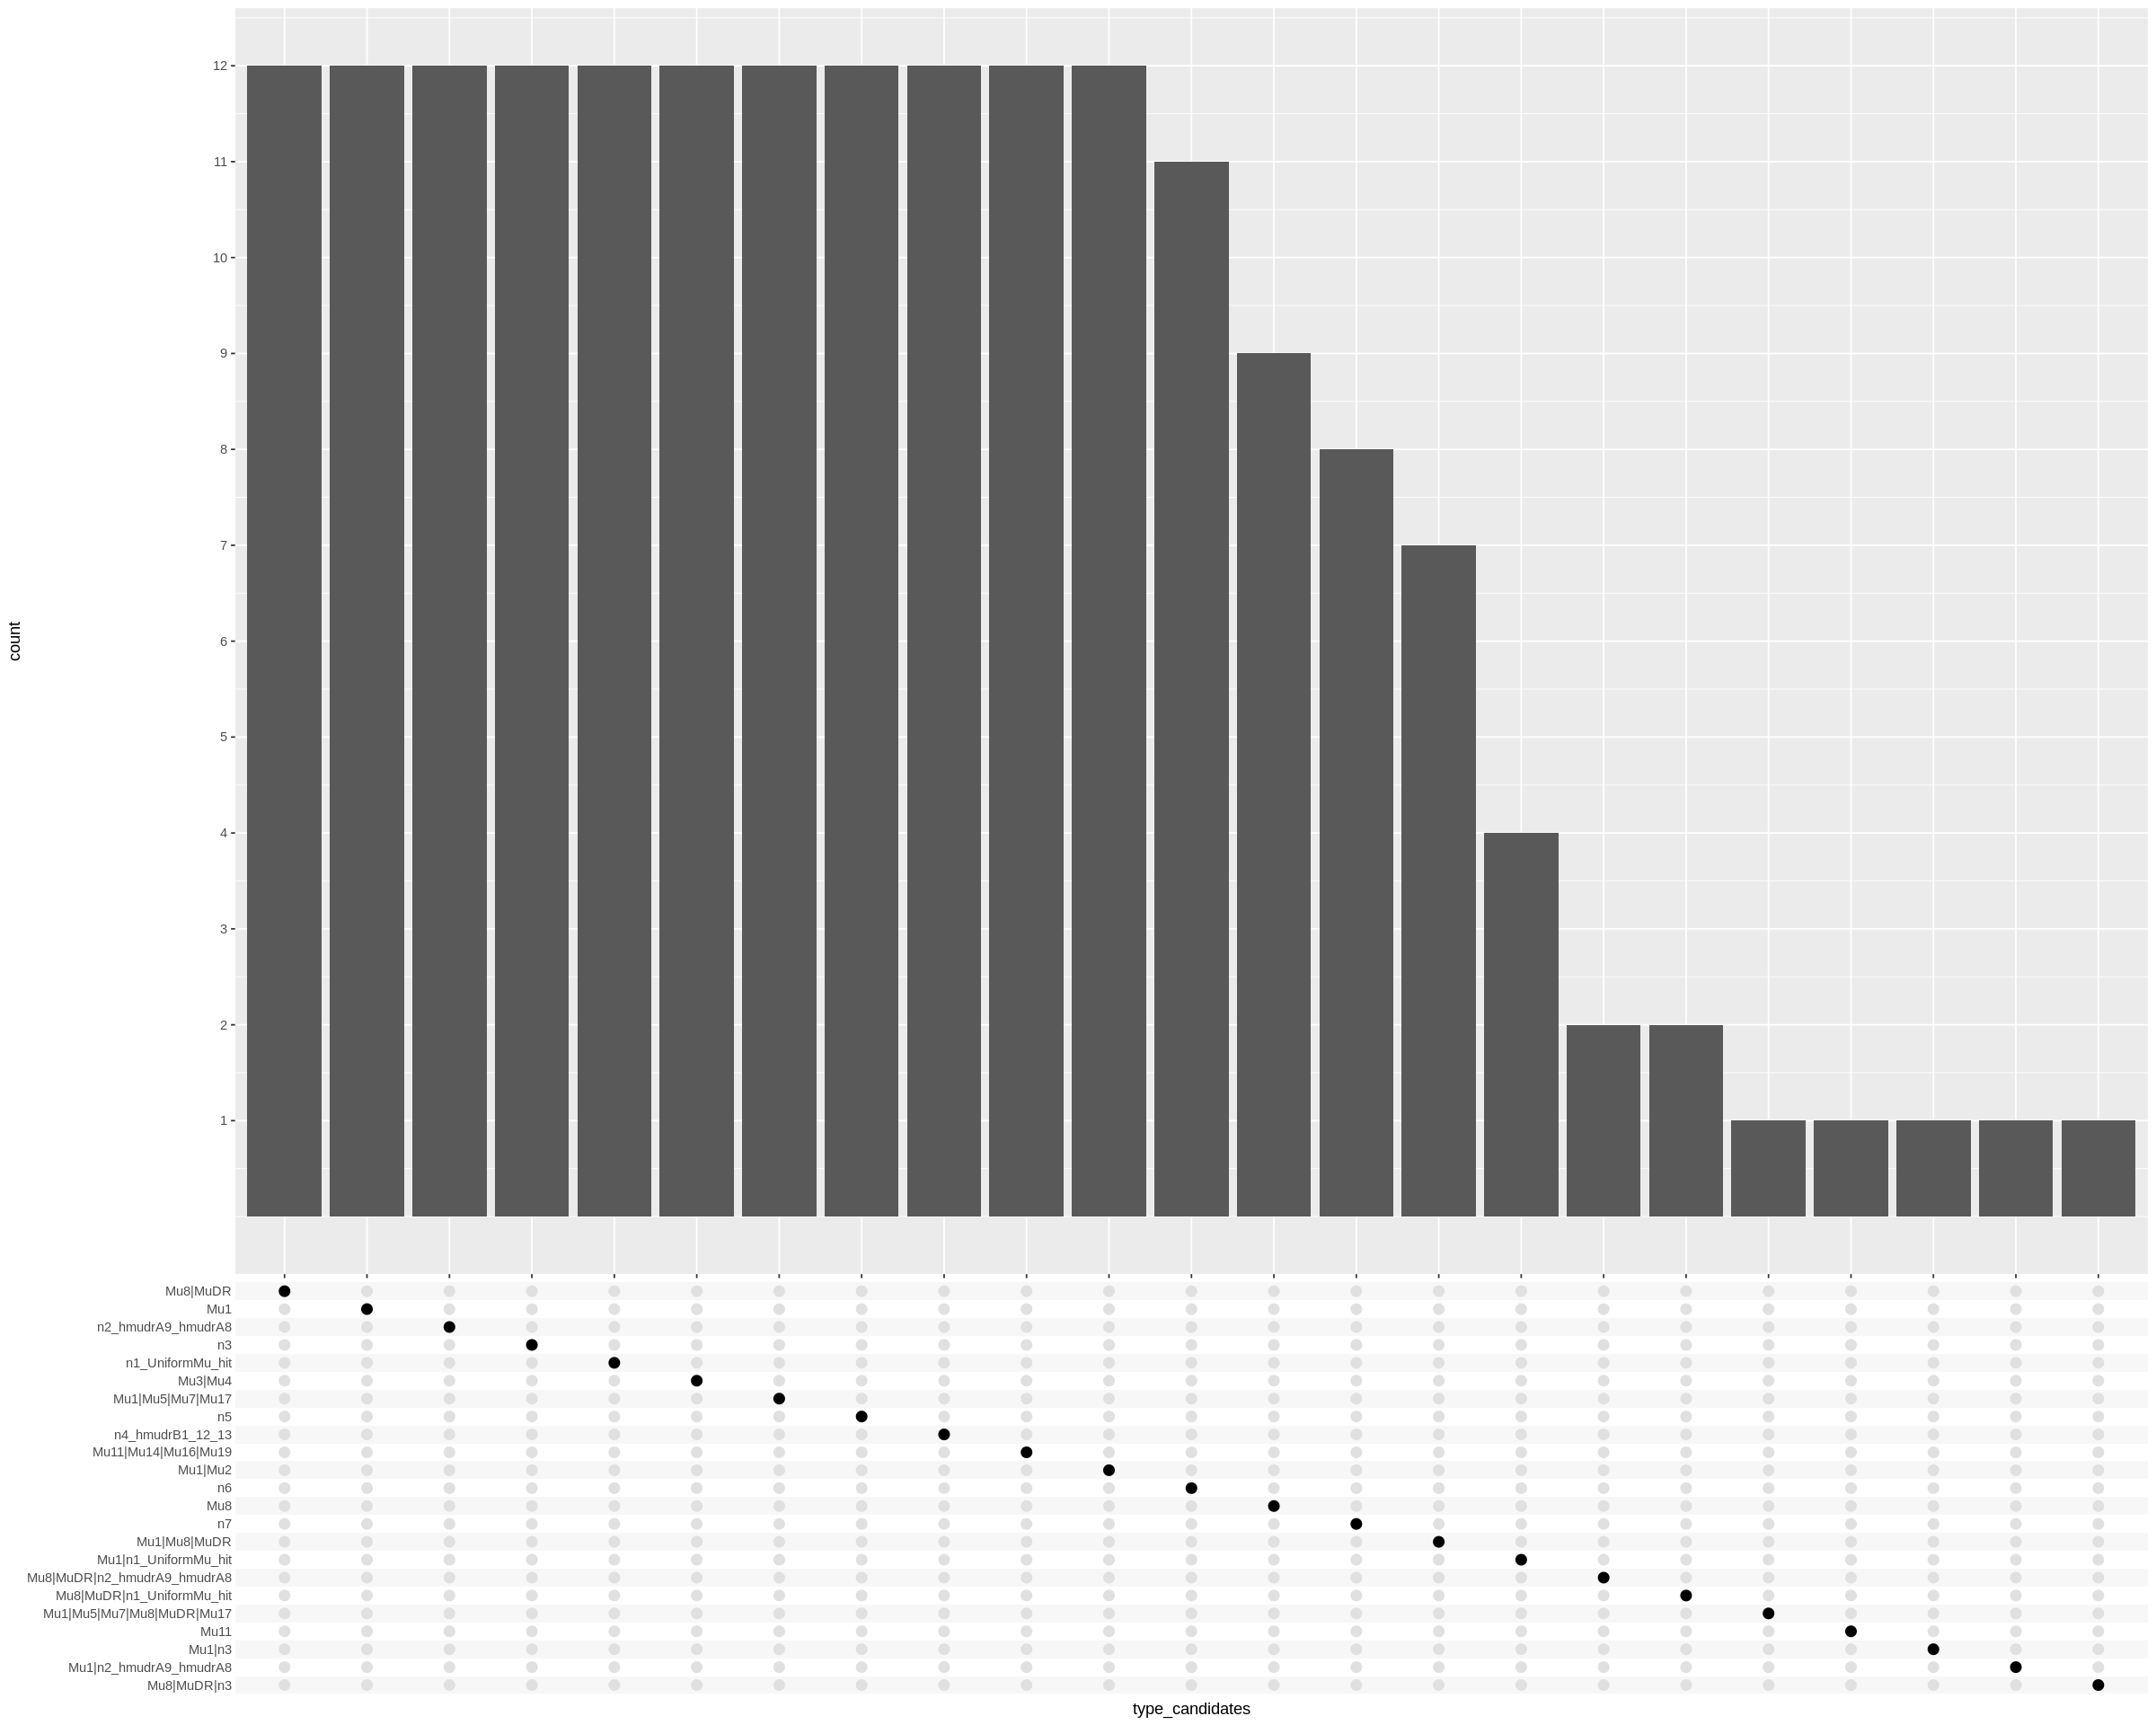

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



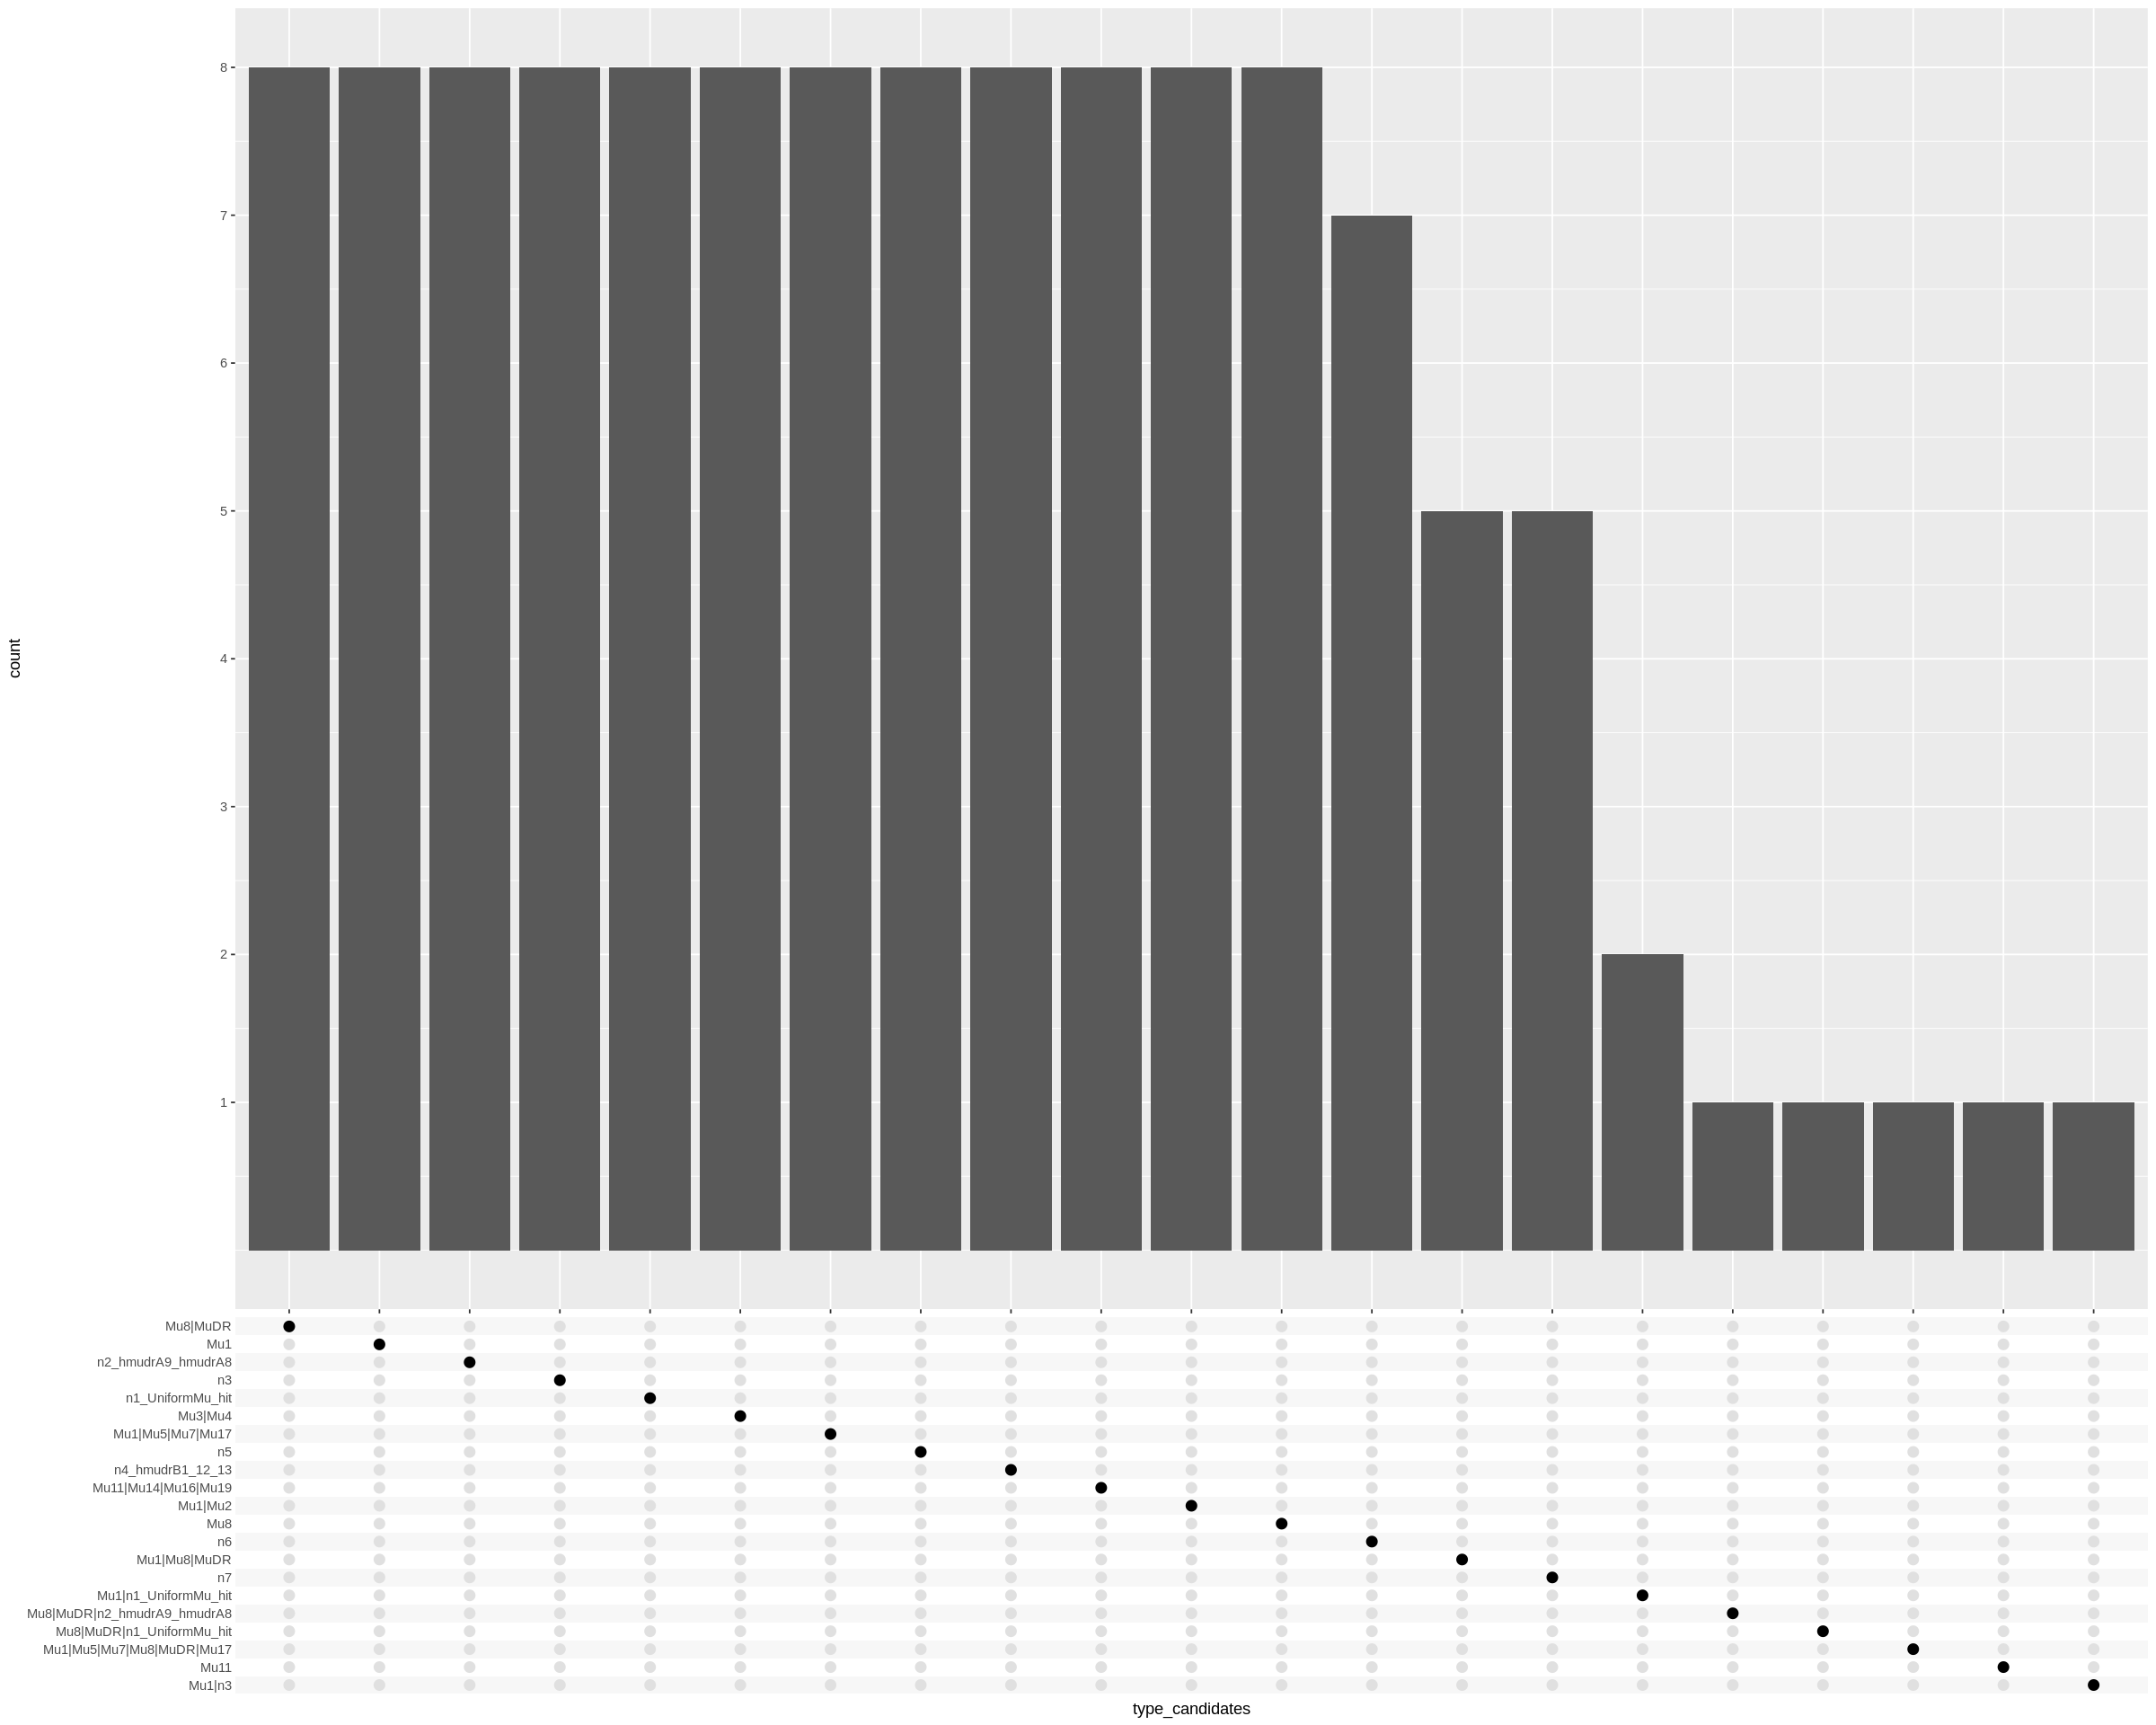

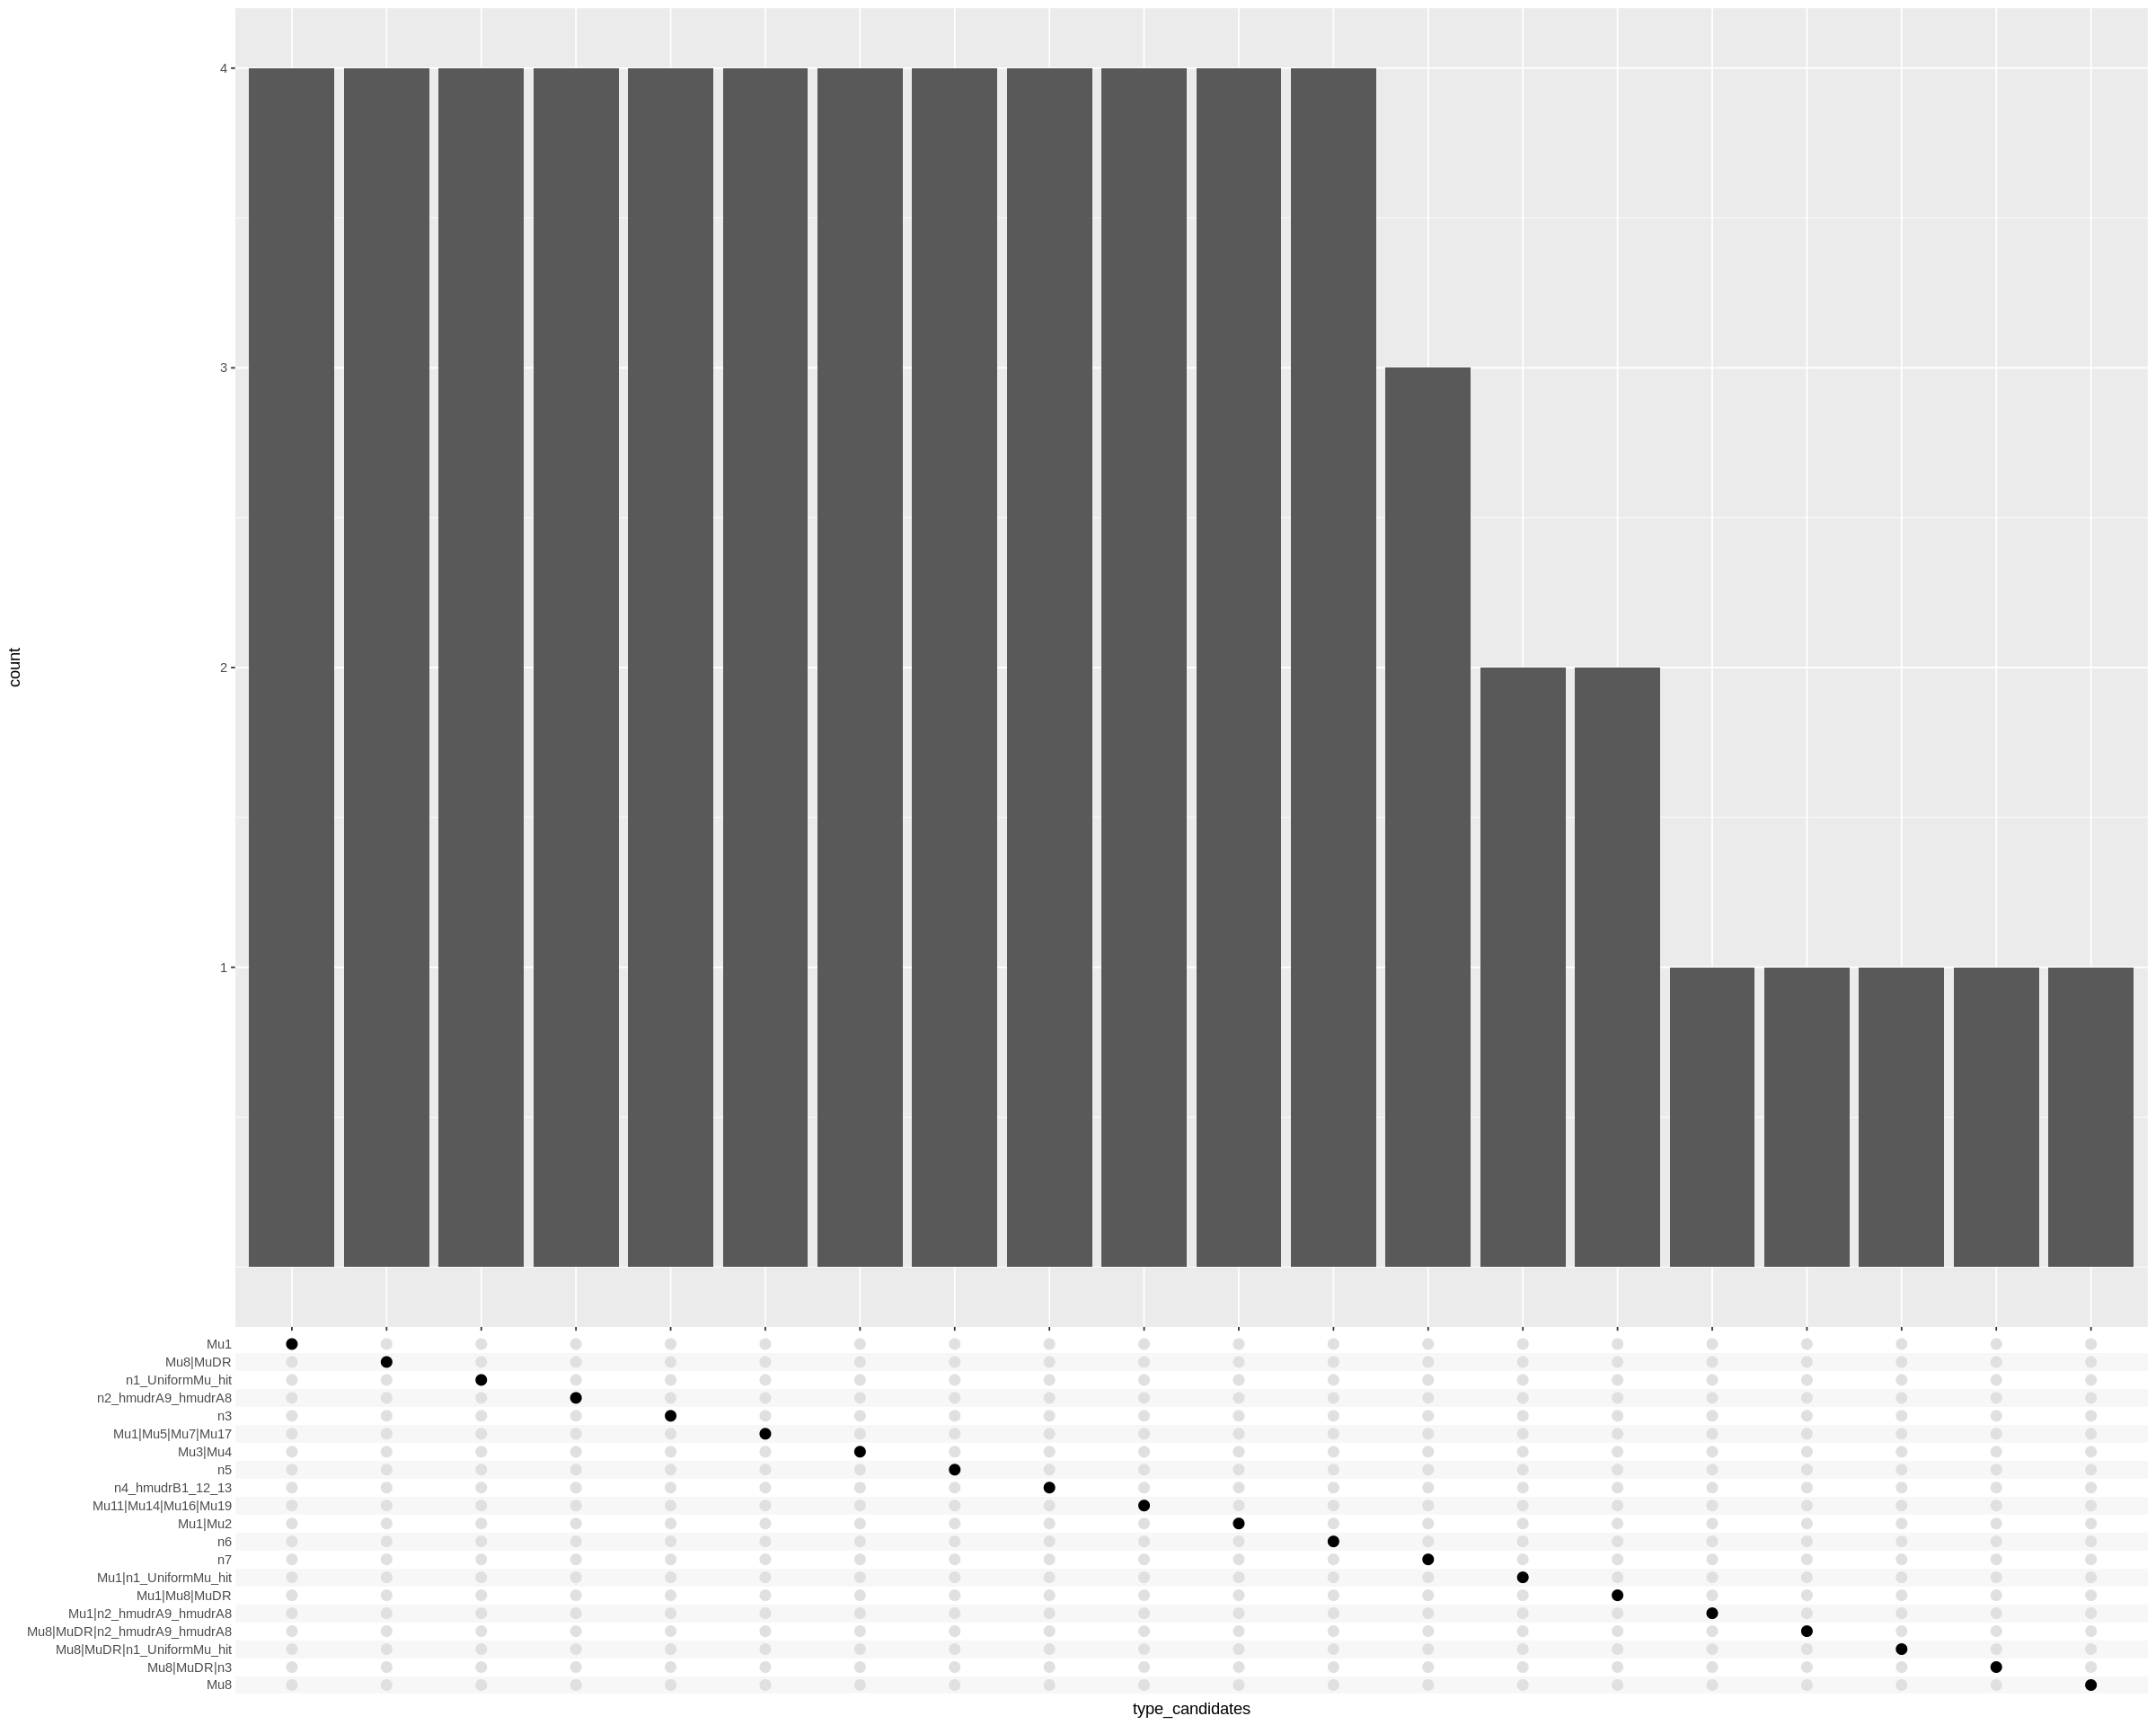

In [249]:
pd <- all_Mu_not_annotated_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(lib, desc(count)) %>%
  dplyr::slice(1:15) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) %>%
  mutate(lib = as.list(lib))


all_pd <- as.data.frame(pd)
#head(pd)

ggplot(pd, aes(x=type_candidates)) +
    geom_bar() +
    scale_y_continuous(limit = c(0, 12), breaks = c(1,2,3,4,5,6,7,8,9,10,11,12)) +
    scale_x_upset(n_intersections = Inf, order_by = "degree")



####just B73
pd <- B73_Mu_not_annotated_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(lib, desc(count)) %>%
  dplyr::slice(1:15) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) %>%
  mutate(lib = as.list(lib))


B73_pd <- as.data.frame(pd)

ggplot(B73_pd, aes(x=type_candidates)) +
    geom_bar() +
    scale_y_continuous(limit = c(0, 8), breaks = c(1,2,3,4,5,6,7,8)) +
    scale_x_upset(n_intersections = Inf, order_by = "degree")



####just F7
pd <- F7_Mu_not_annotated_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(lib, desc(count)) %>%
  dplyr::slice(1:15) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) %>%
  mutate(lib = as.list(lib))


F7_pd <- as.data.frame(pd)

ggplot(F7_pd, aes(x=type_candidates)) +
    geom_bar() +
    scale_y_continuous(limit = c(0, 4), breaks = c(1,2,3,4)) +
    scale_x_upset(n_intersections = Inf, order_by = "degree")


#code ideas - classic UpSetR
#  select(-lib) %>%

#Mu1 <- a %>% filter(lib == "Mu1") %>% pull(type_candidates)
#Mu2 <- a %>% filter(lib == "Mu2") %>% pull(type_candidates)
#Mu4 <- a %>% filter(lib == "Mu4") %>% pull(type_candidates)
#Mu5 <- a %>% filter(lib == "Mu5") %>% pull(type_candidates)
#Mu6 <- a %>% filter(lib == "Mu6") %>% pull(type_candidates)
#Mu7 <- a %>% filter(lib == "Mu7") %>% pull(type_candidates)
#Mu8 <- a %>% filter(lib == "Mu8") %>% pull(type_candidates)

#c <- list(Mu1 = Mu1, Mu2 = Mu2, Mu4 = Mu4, Mu5 = Mu5, Mu6 = Mu6, Mu7 = Mu7, Mu8 = Mu8)
#c
#upset(c, nsets = 20)

In [ ]:
#### need this for both library types next to each other

In [250]:
all_pd <- all_Mu_not_annotated_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(lib, desc(count)) %>%
  dplyr::slice(1:15) %>%
#  select(lib, type_candidates) %>%
#  dplyr::slice(1:15) %>%
  ungroup() %>%
  group_by(type_candidates) %>%
  summarize(n = n()) #%>%
#  arrange(desc(n))
#  group_by(lib, type_candidates) %>%
#  summarise(count = n()) %>%
#  arrange(lib, desc(count)) #%>%
#  dplyr::slice(1:15) #%>%
#  ungroup() %>%

head(all_pd, n=20)

#F7_pd %>%
#  group_by(type_candidates) %>%
#  summarize(n = n()) %>%
#  arrange(desc(n)) %>%
#  mutate(type_candidates = as.character(type_candidates)) %>%
#    ggplot(., aes(x=type_candidates, y=n)) +
#    geom_col() +
#    coord_flip()

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


type_candidates,n
<chr>,<int>
Mu1,12
Mu1|Mu2,12
Mu1|Mu5|Mu7|Mu17,12
Mu1|Mu5|Mu7|Mu8|MuDR|Mu17,1
Mu1|Mu8|MuDR,7
Mu1|n1_UniformMu_hit,4
Mu1|n2_hmudrA9_hmudrA8,1
Mu1|n3,1
Mu11,1


[[1]]
[1] "Mu1"

[[2]]
[1] "Mu8|MuDR"

[[3]]
[1] "n1_UniformMu_hit"

[[4]]
[1] "n2_hmudrA9_hmudrA8"

[[5]]
[1] "n3"

[[6]]
[1] "Mu1|Mu5|Mu7|Mu17"

[[1]]
[1] "Mu1"

[[2]]
[1] "Mu8|MuDR"

[[3]]
[1] "n2_hmudrA9_hmudrA8"

[[4]]
[1] "n1_UniformMu_hit"

[[5]]
[1] "n3"

[[6]]
[1] "Mu3|Mu4"

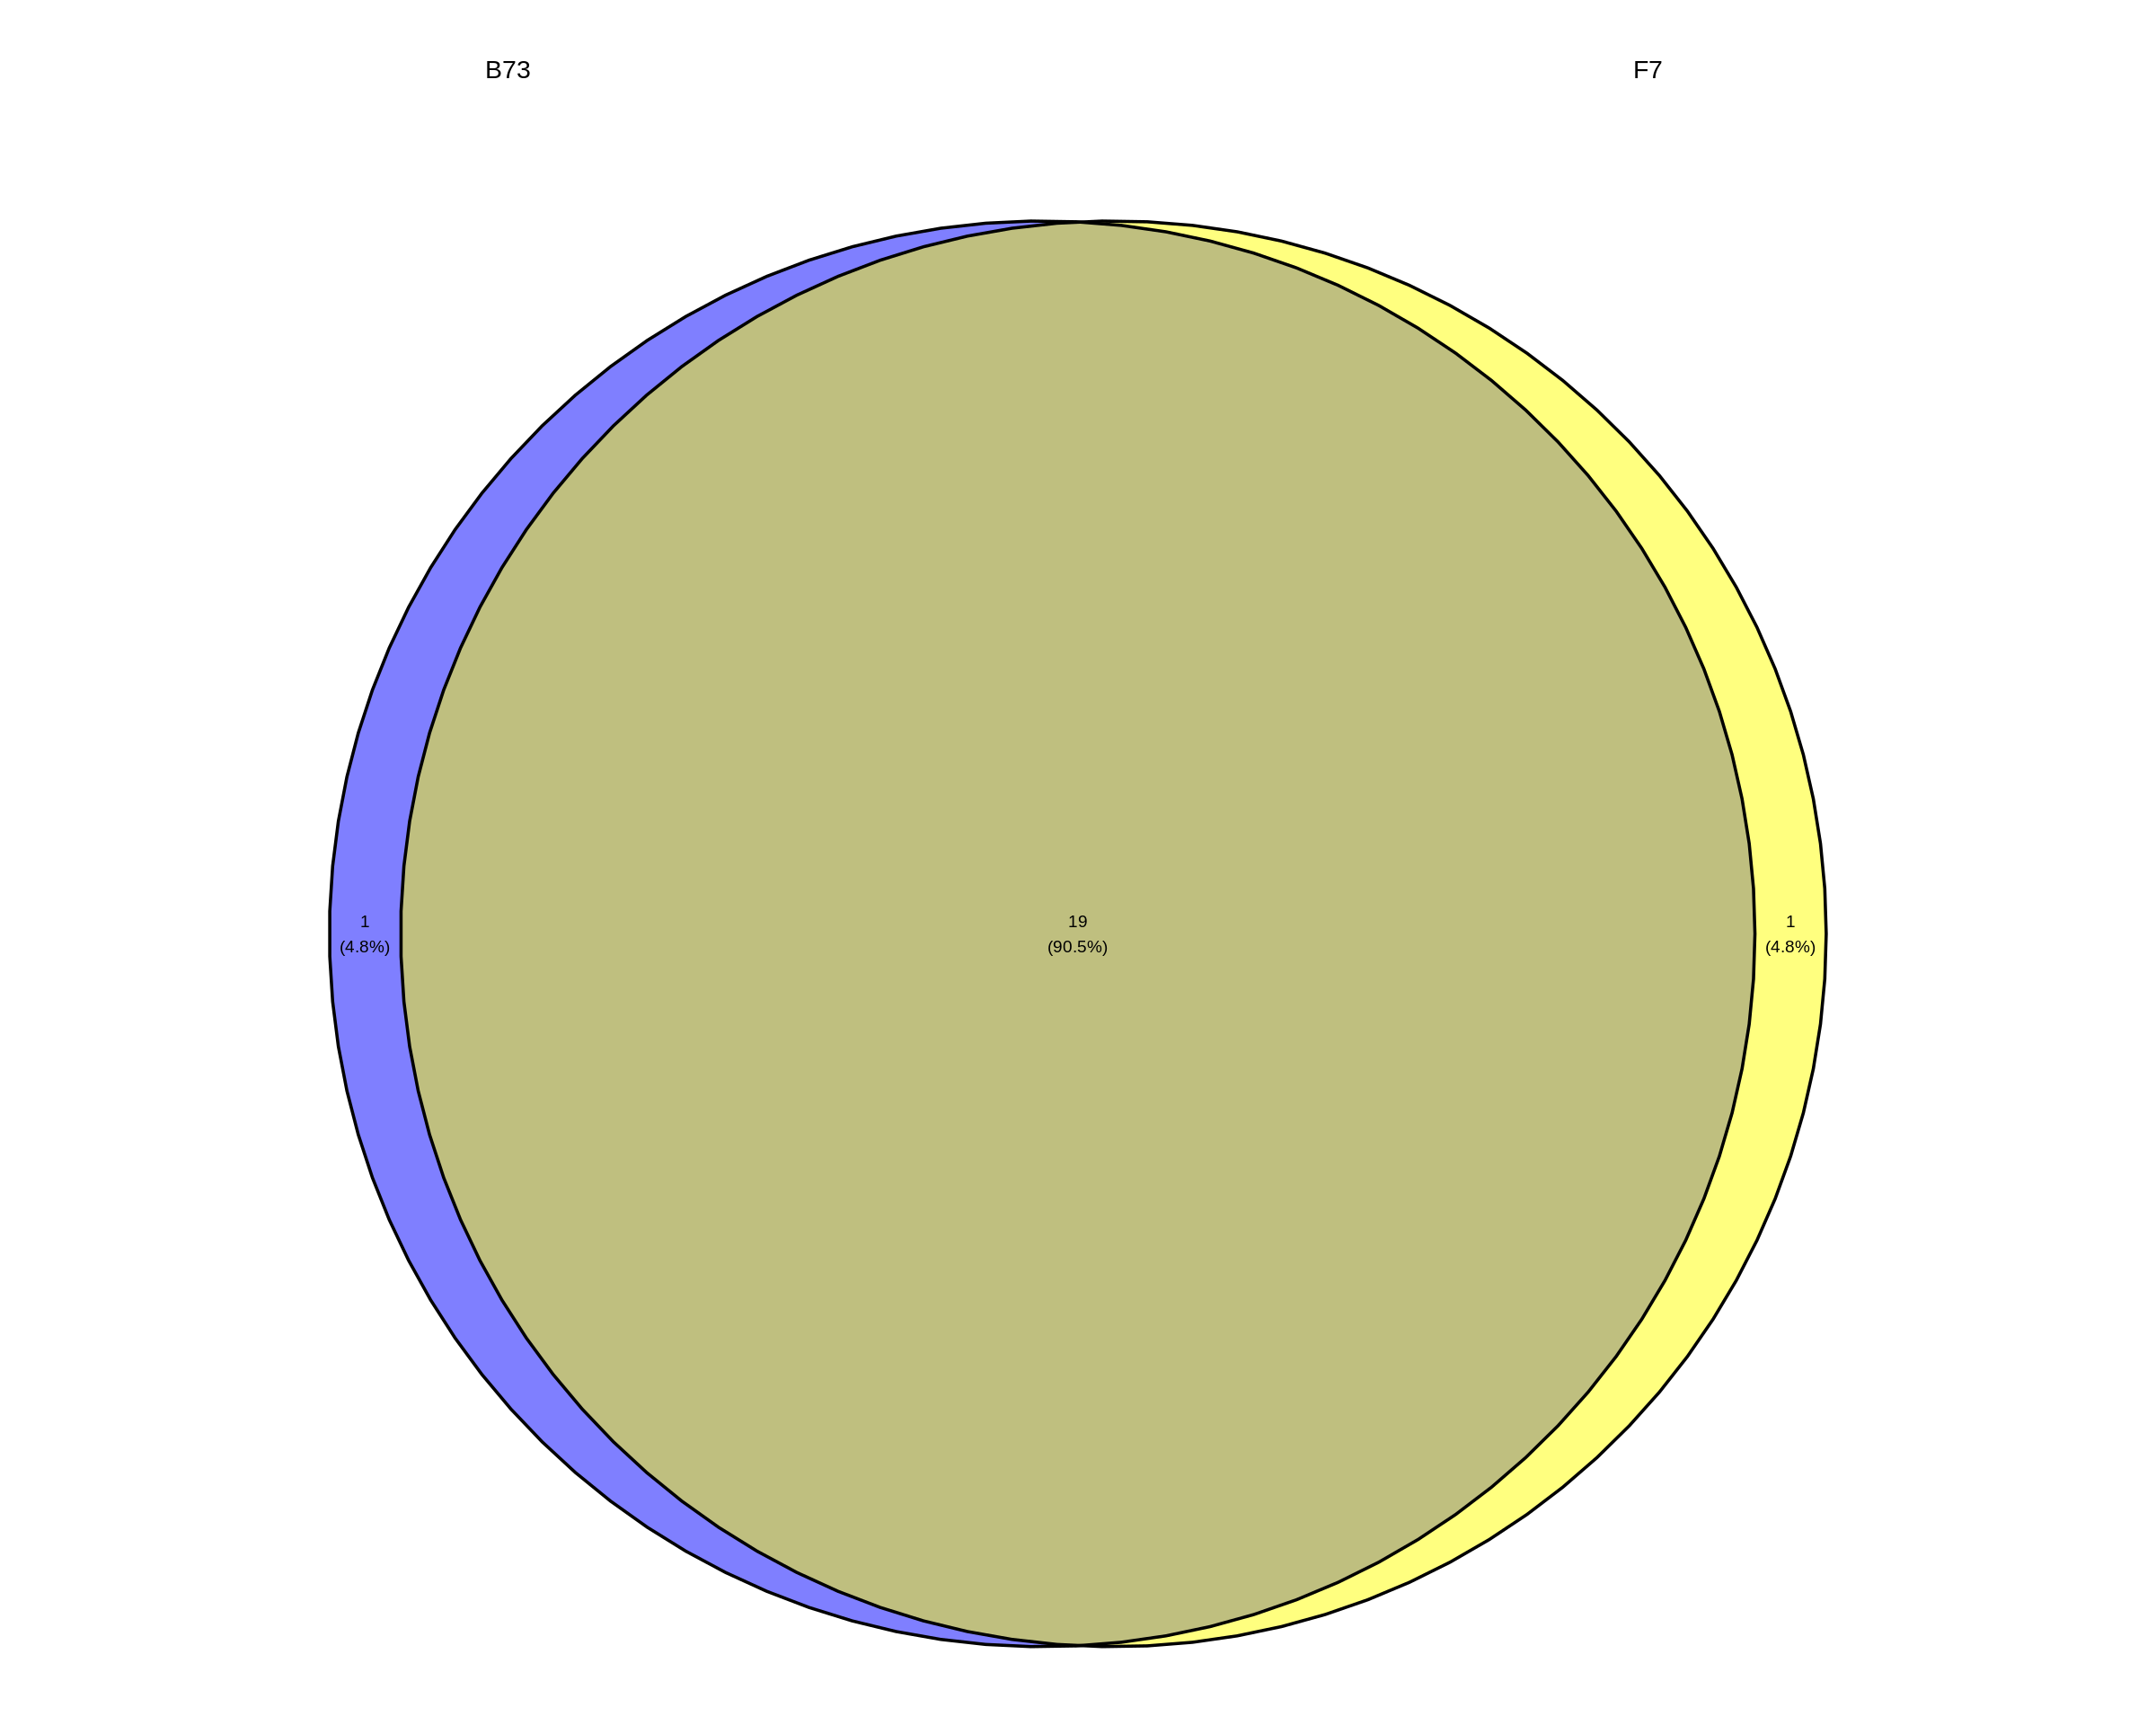

In [298]:
B73_pd <- B73_Mu_not_annotated_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  dplyr::slice(1:20) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) 

F7_pd <- F7_Mu_not_annotated_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  dplyr::slice(1:20) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) 

head(B73_pd$type_candidates)
head(F7_pd$type_candidates)

ggvenn(list(B73=B73_pd$type_candidates, F7=F7_pd$type_candidates), auto_scale=TRUE)

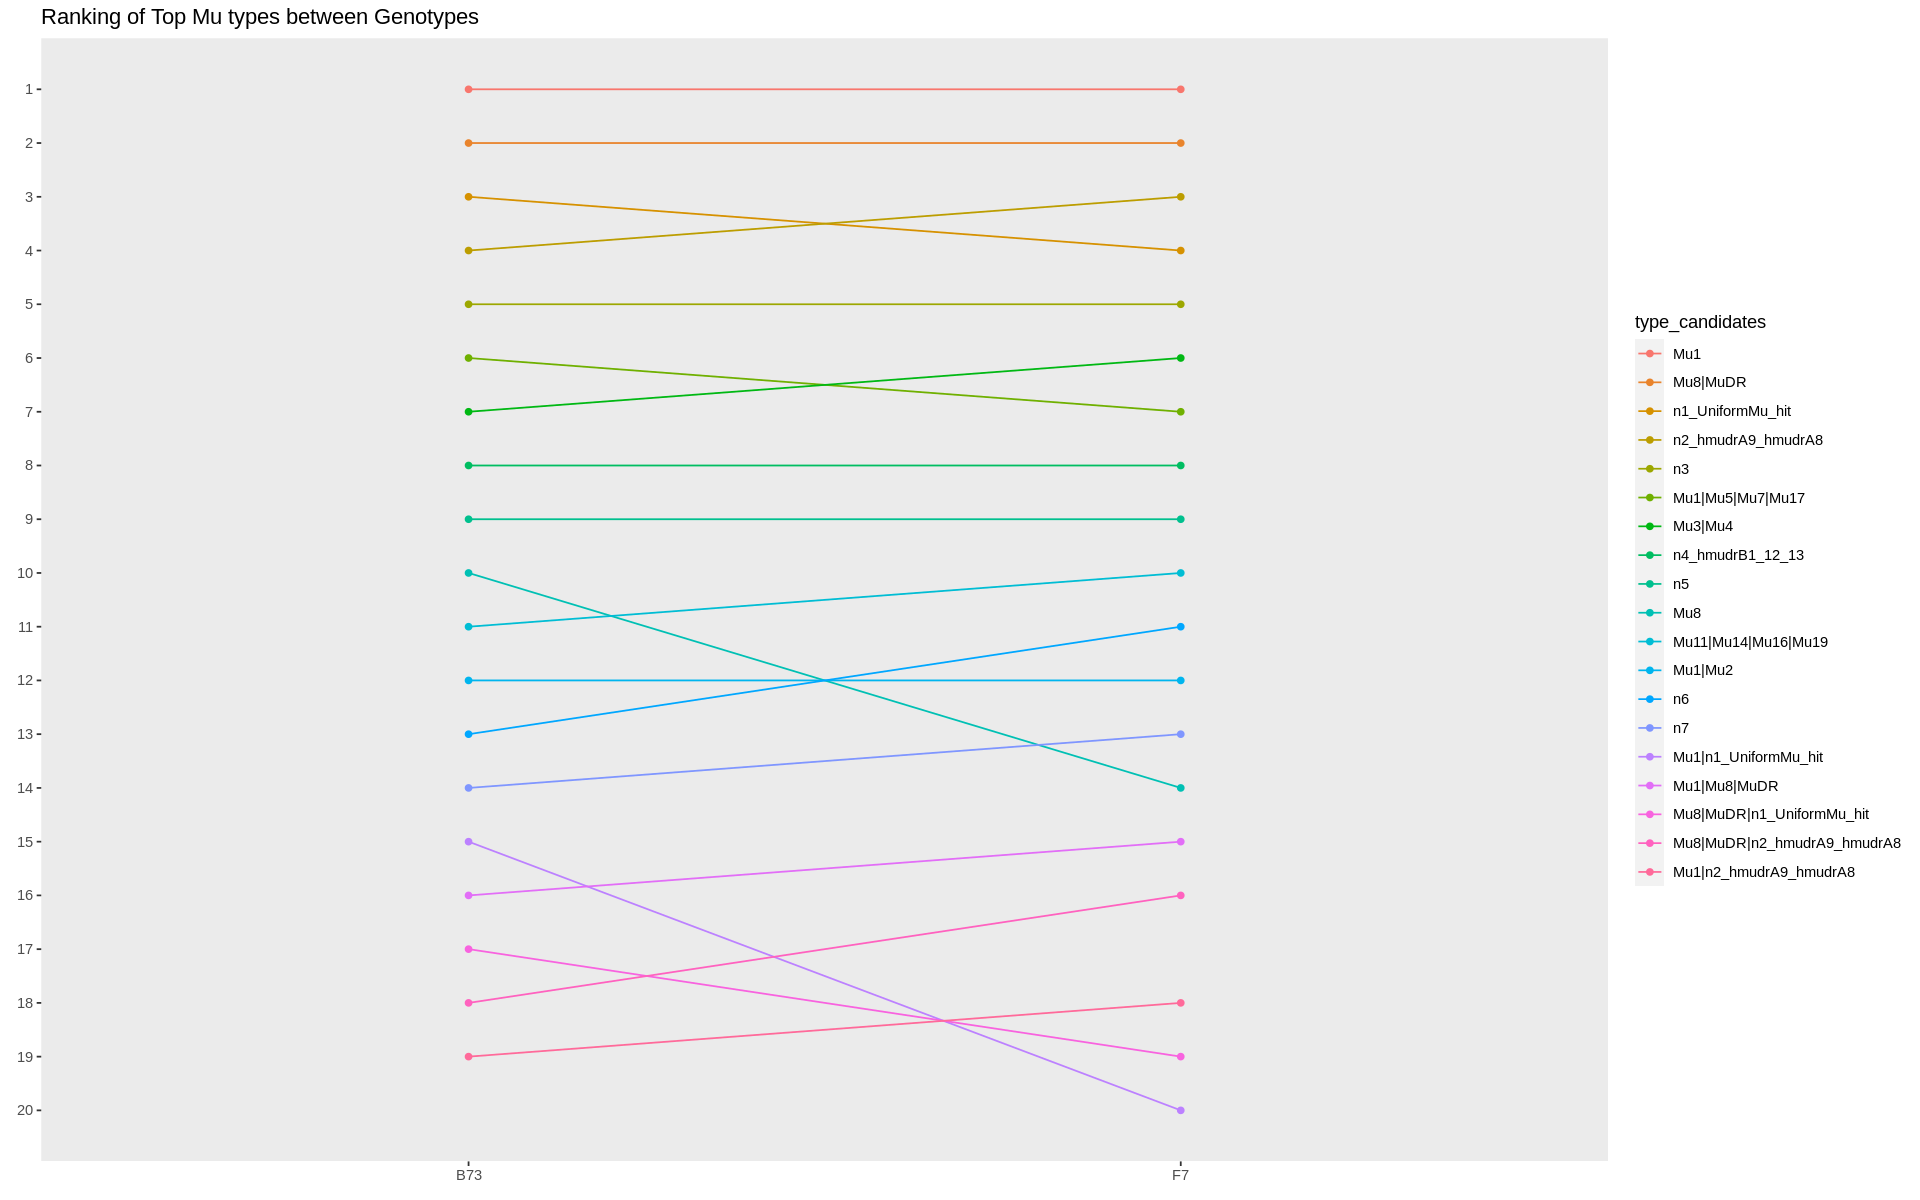

In [289]:
B73_pd <- B73_pd %>%
  mutate(rank = 1:n())

F7_pd <- F7_pd %>%
  mutate(rank = 1:n())

m <- left_join(B73_pd, F7_pd, by = "type_candidates") %>%
  select(-count.x, -count.y)

#transform to chr -> factor 
m$type_candidates <- as.character(m$type_candidates)
m$type_candidates <- as.factor(m$type_candidates)
#order factor so that legend is ordered based on B73
m$type_candidates <- factor(m$type_candidates, levels = B73_pd$type_candidates)
#rename groups
m <- m %>%
  dplyr::rename(B73 = rank.x, F7 = rank.y)


# Build plot
GGally::ggparcoord(m,
                   columns = 2:3, groupColumn = 1,  
                   scale="globalminmax", 
                   showPoints = TRUE, 
                   title = "Ranking of Top Mu types between Genotypes"
) + 
    # Reversed y axis with custom breaks to recreate 1:10 rankings
    scale_y_reverse(breaks = 1:20) +
    # Prettifies typography etc.
#    theme_void() + 
    # Removes gridlines
    theme(
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()
    ) + 
    # Removes axis labels
    labs(
        y = element_blank(), 
        x = element_blank()
    )

### Count distribution of top N Mu species between libraries

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


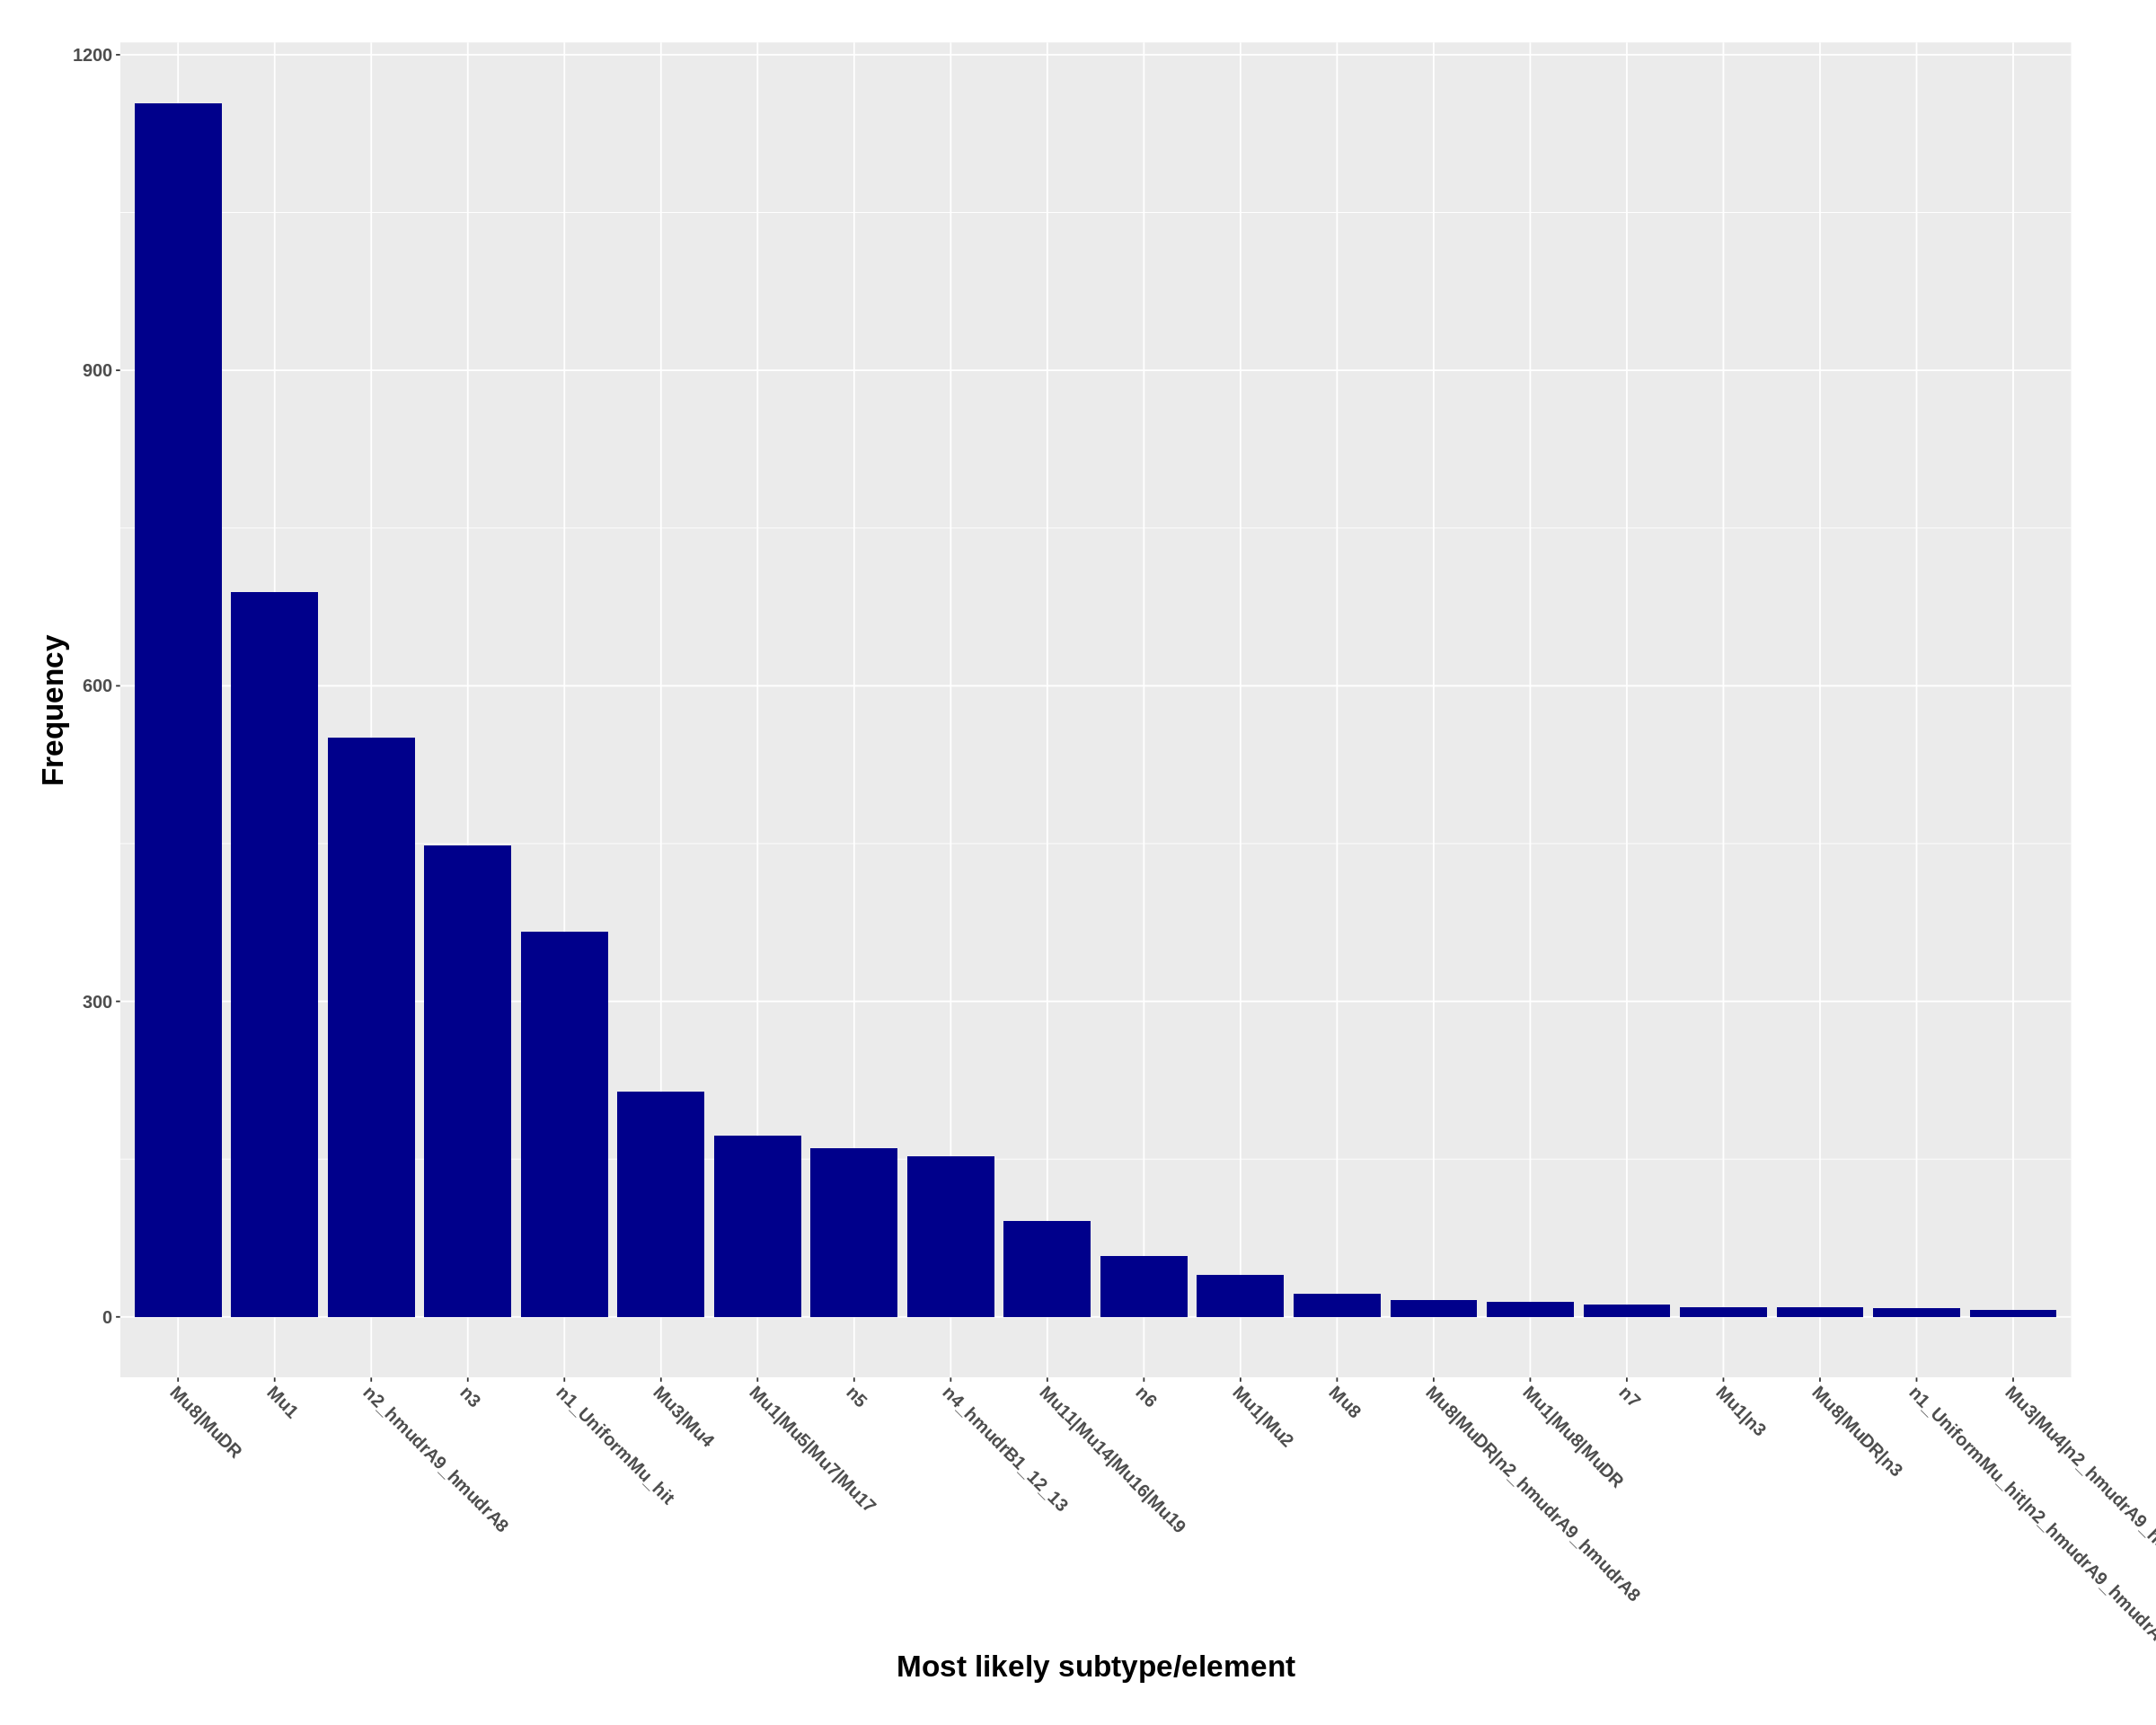

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


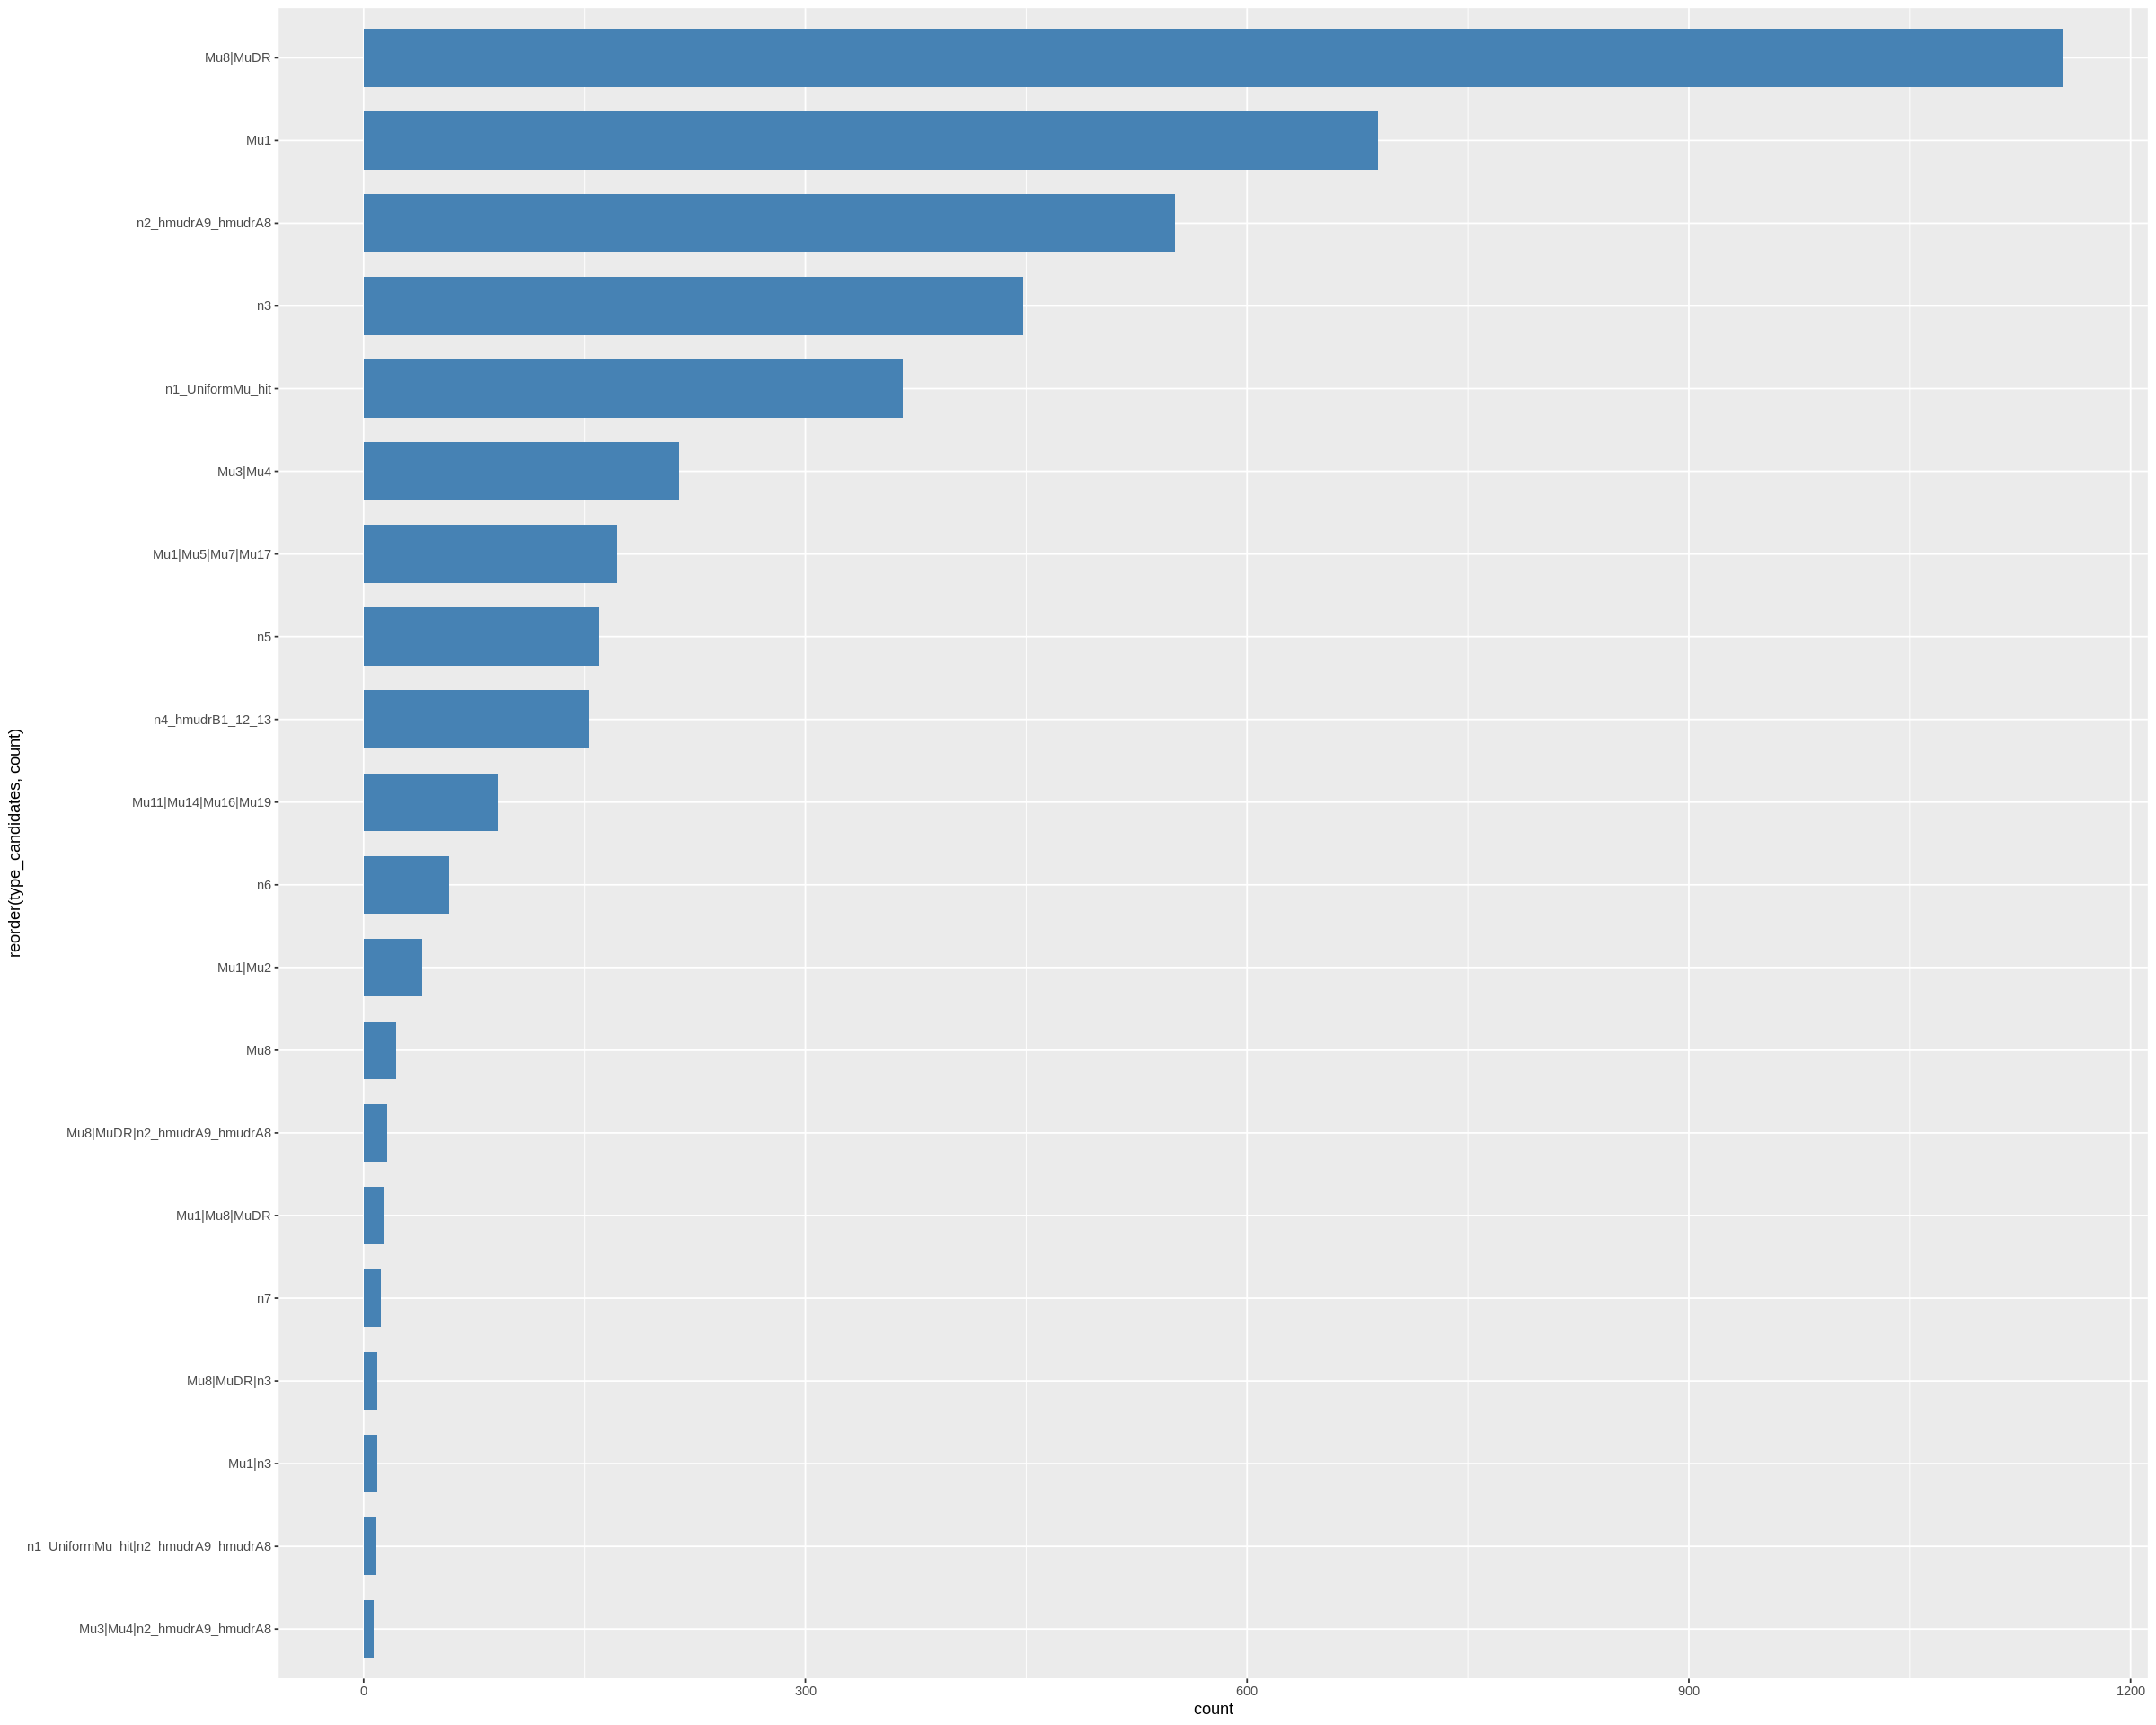

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


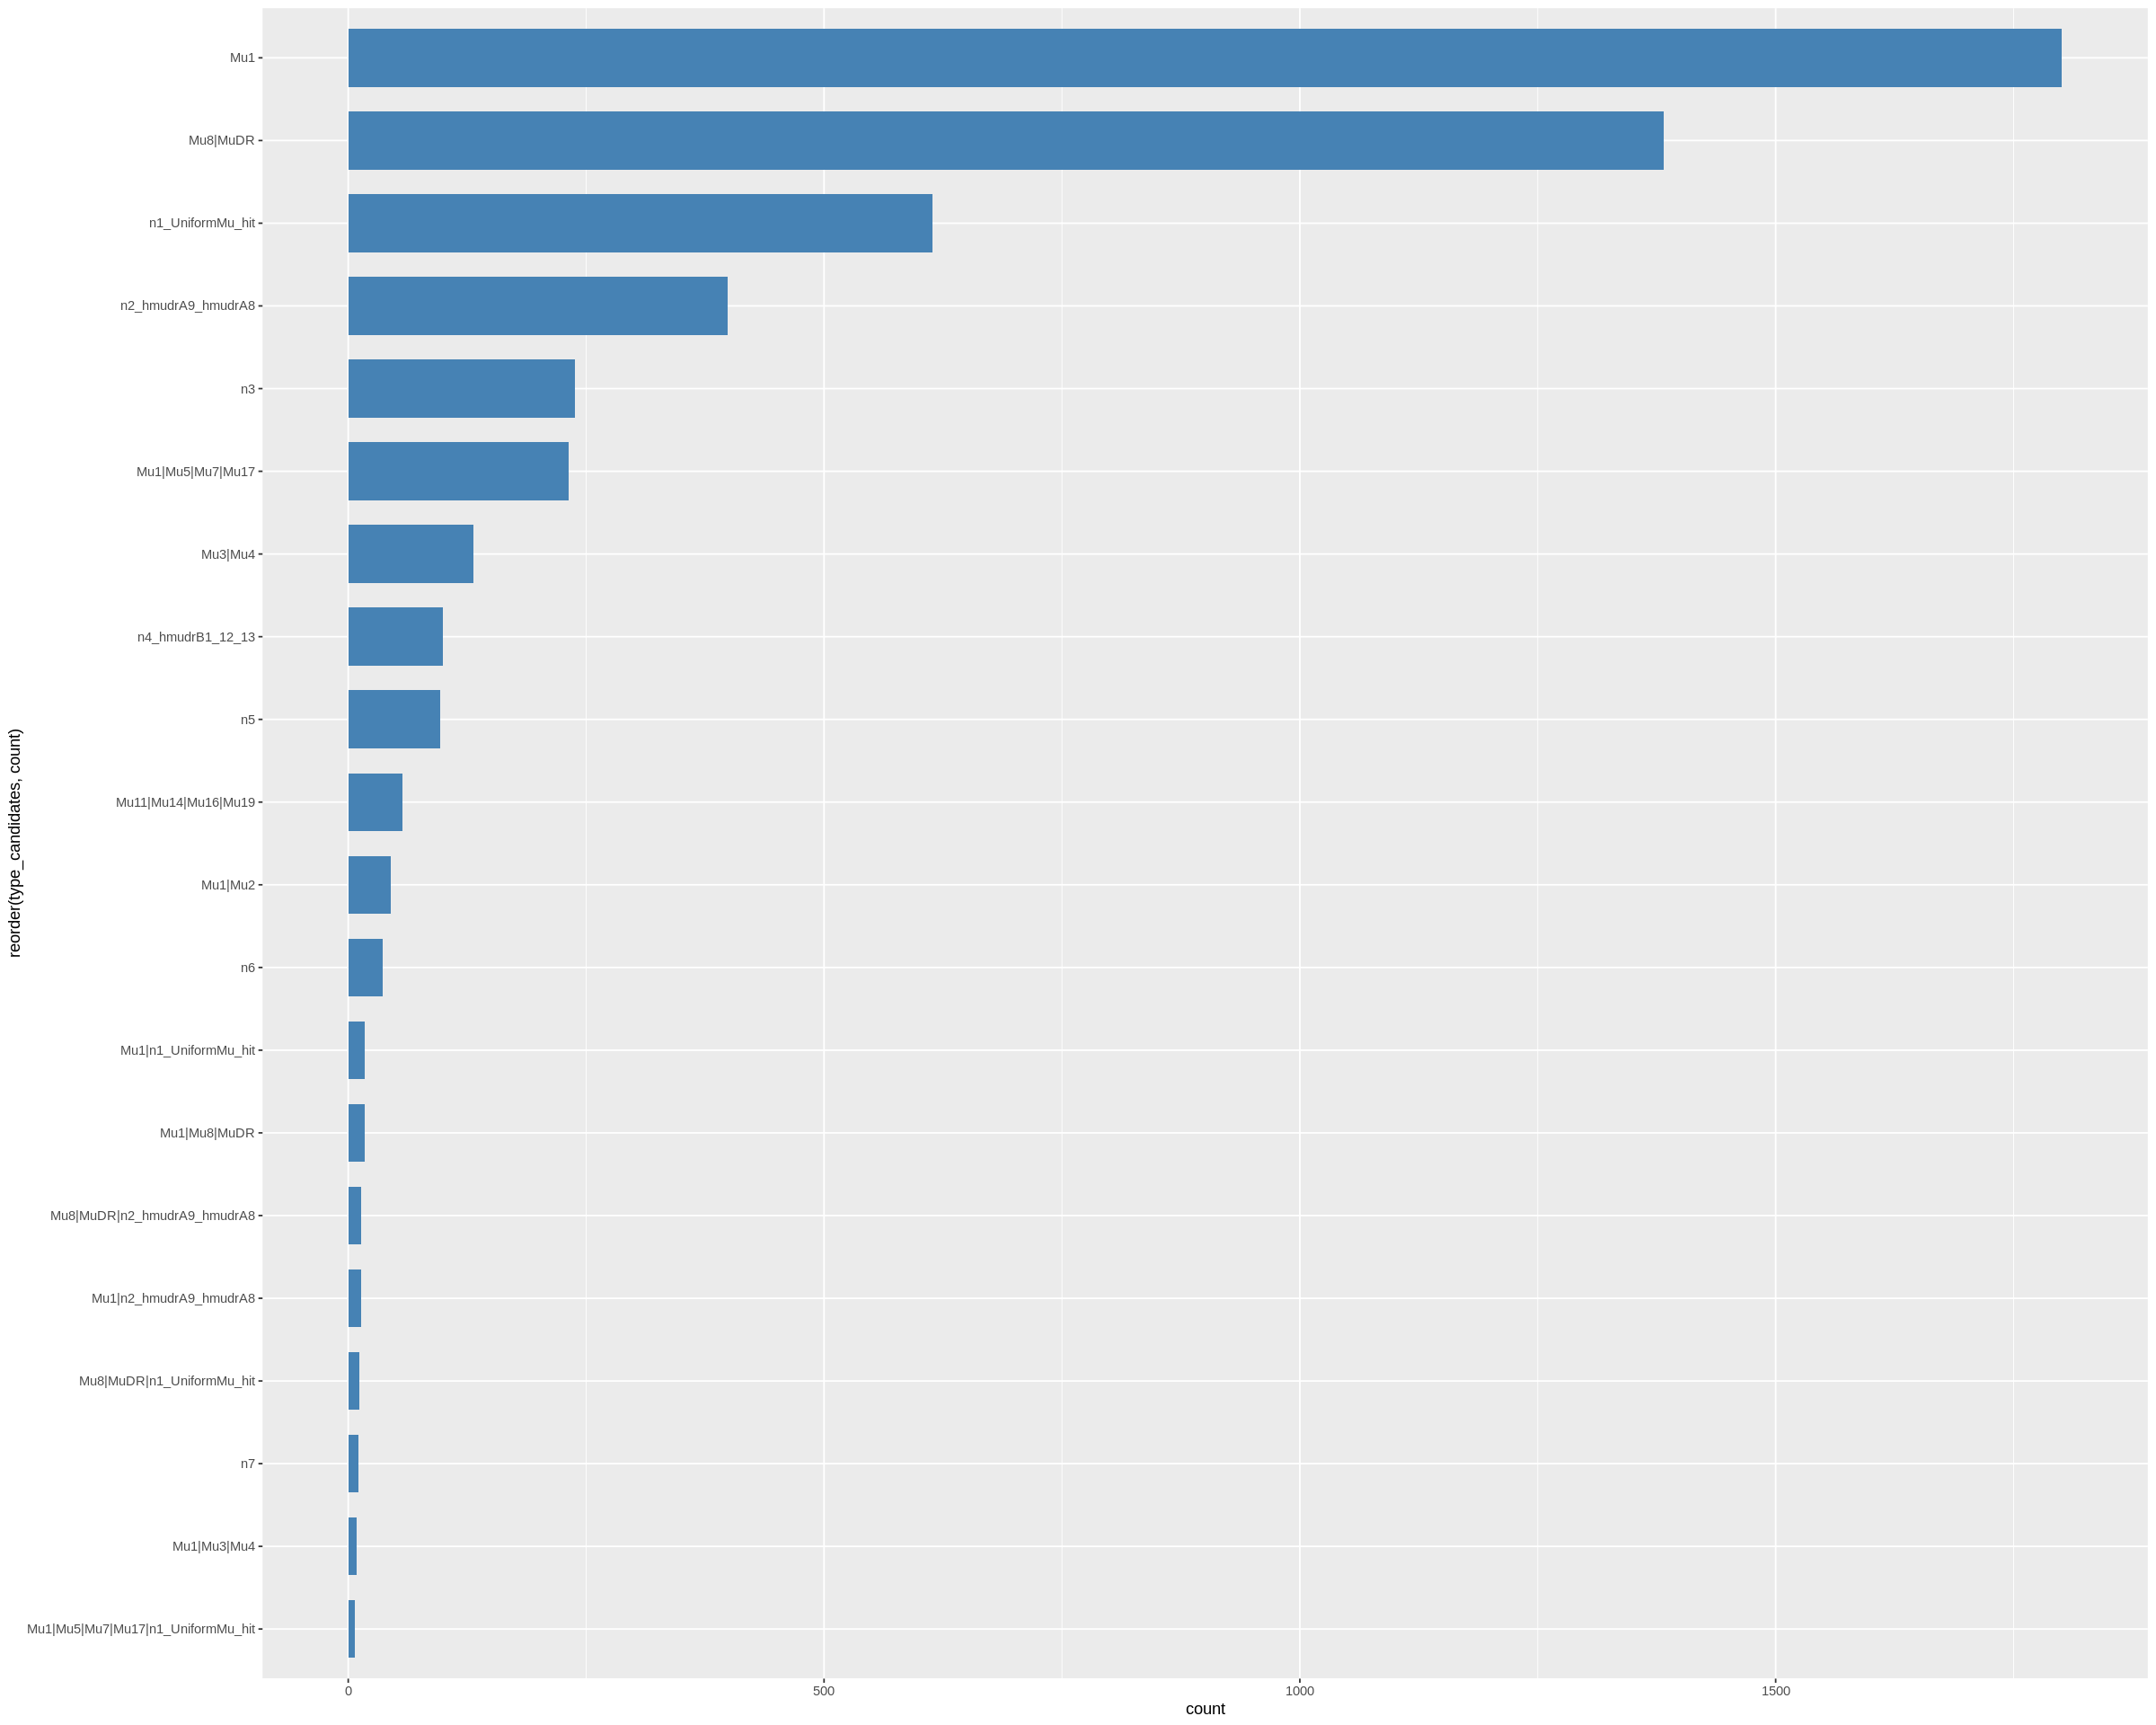

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


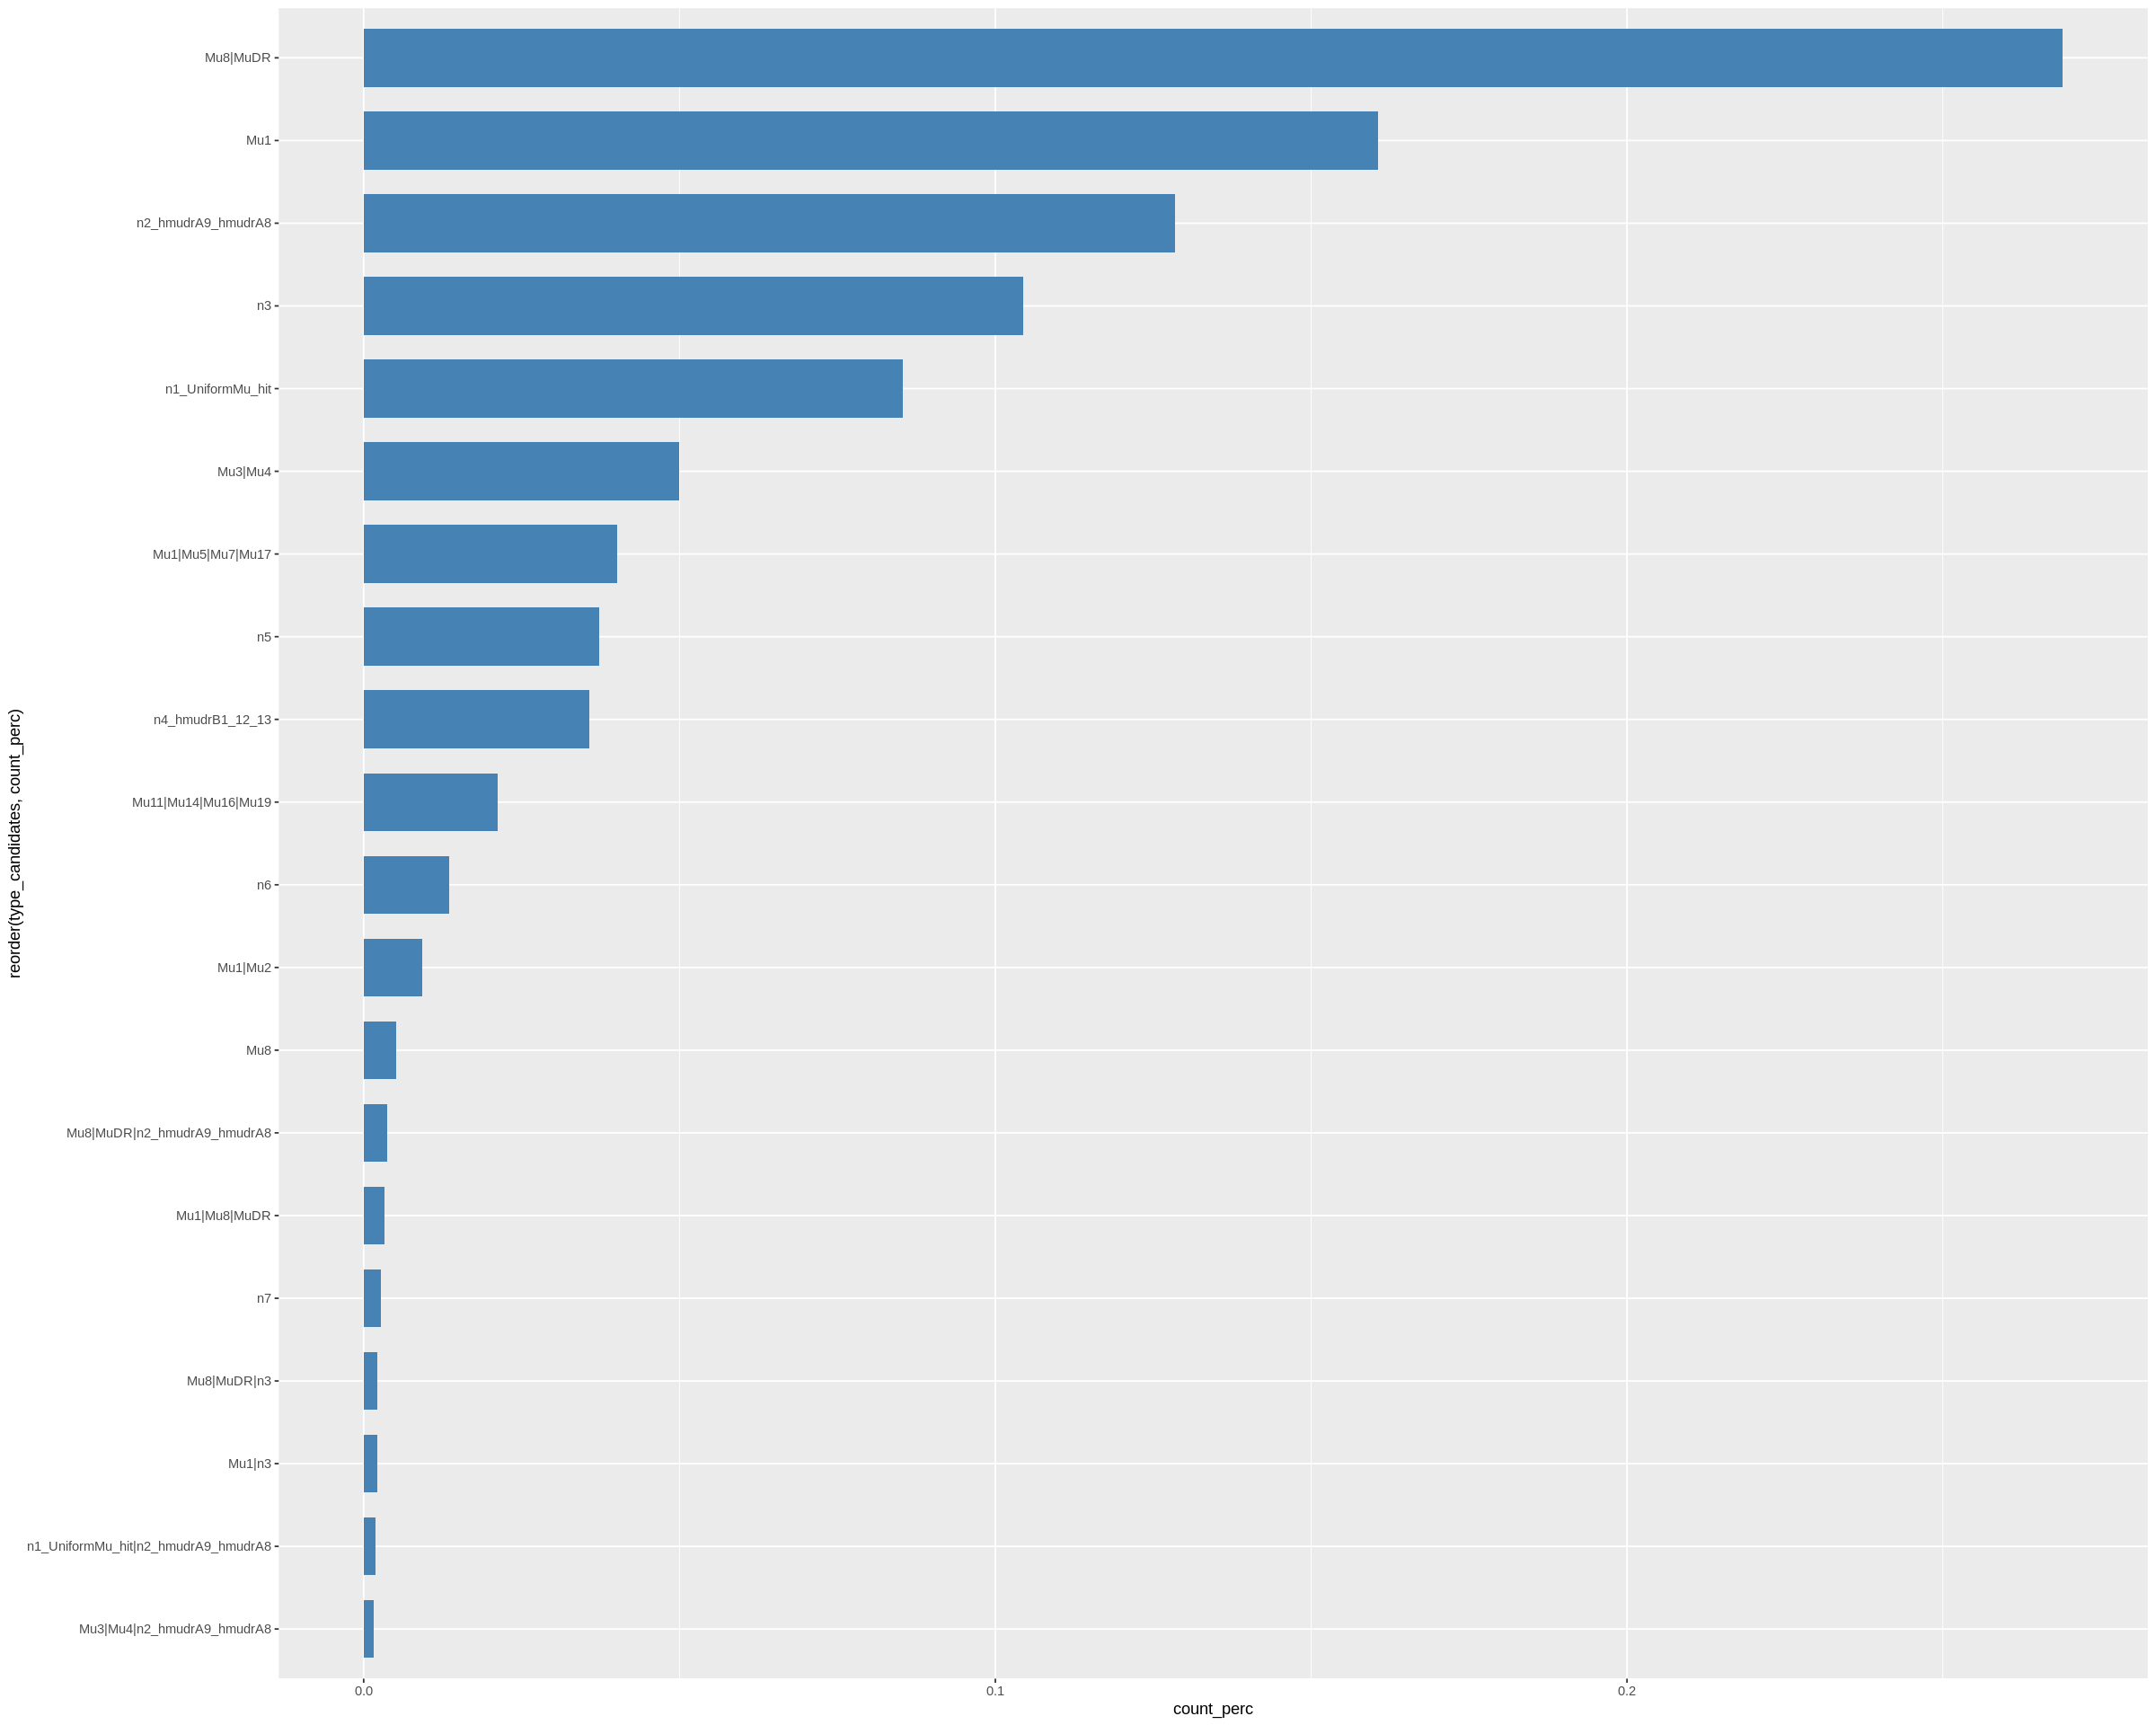

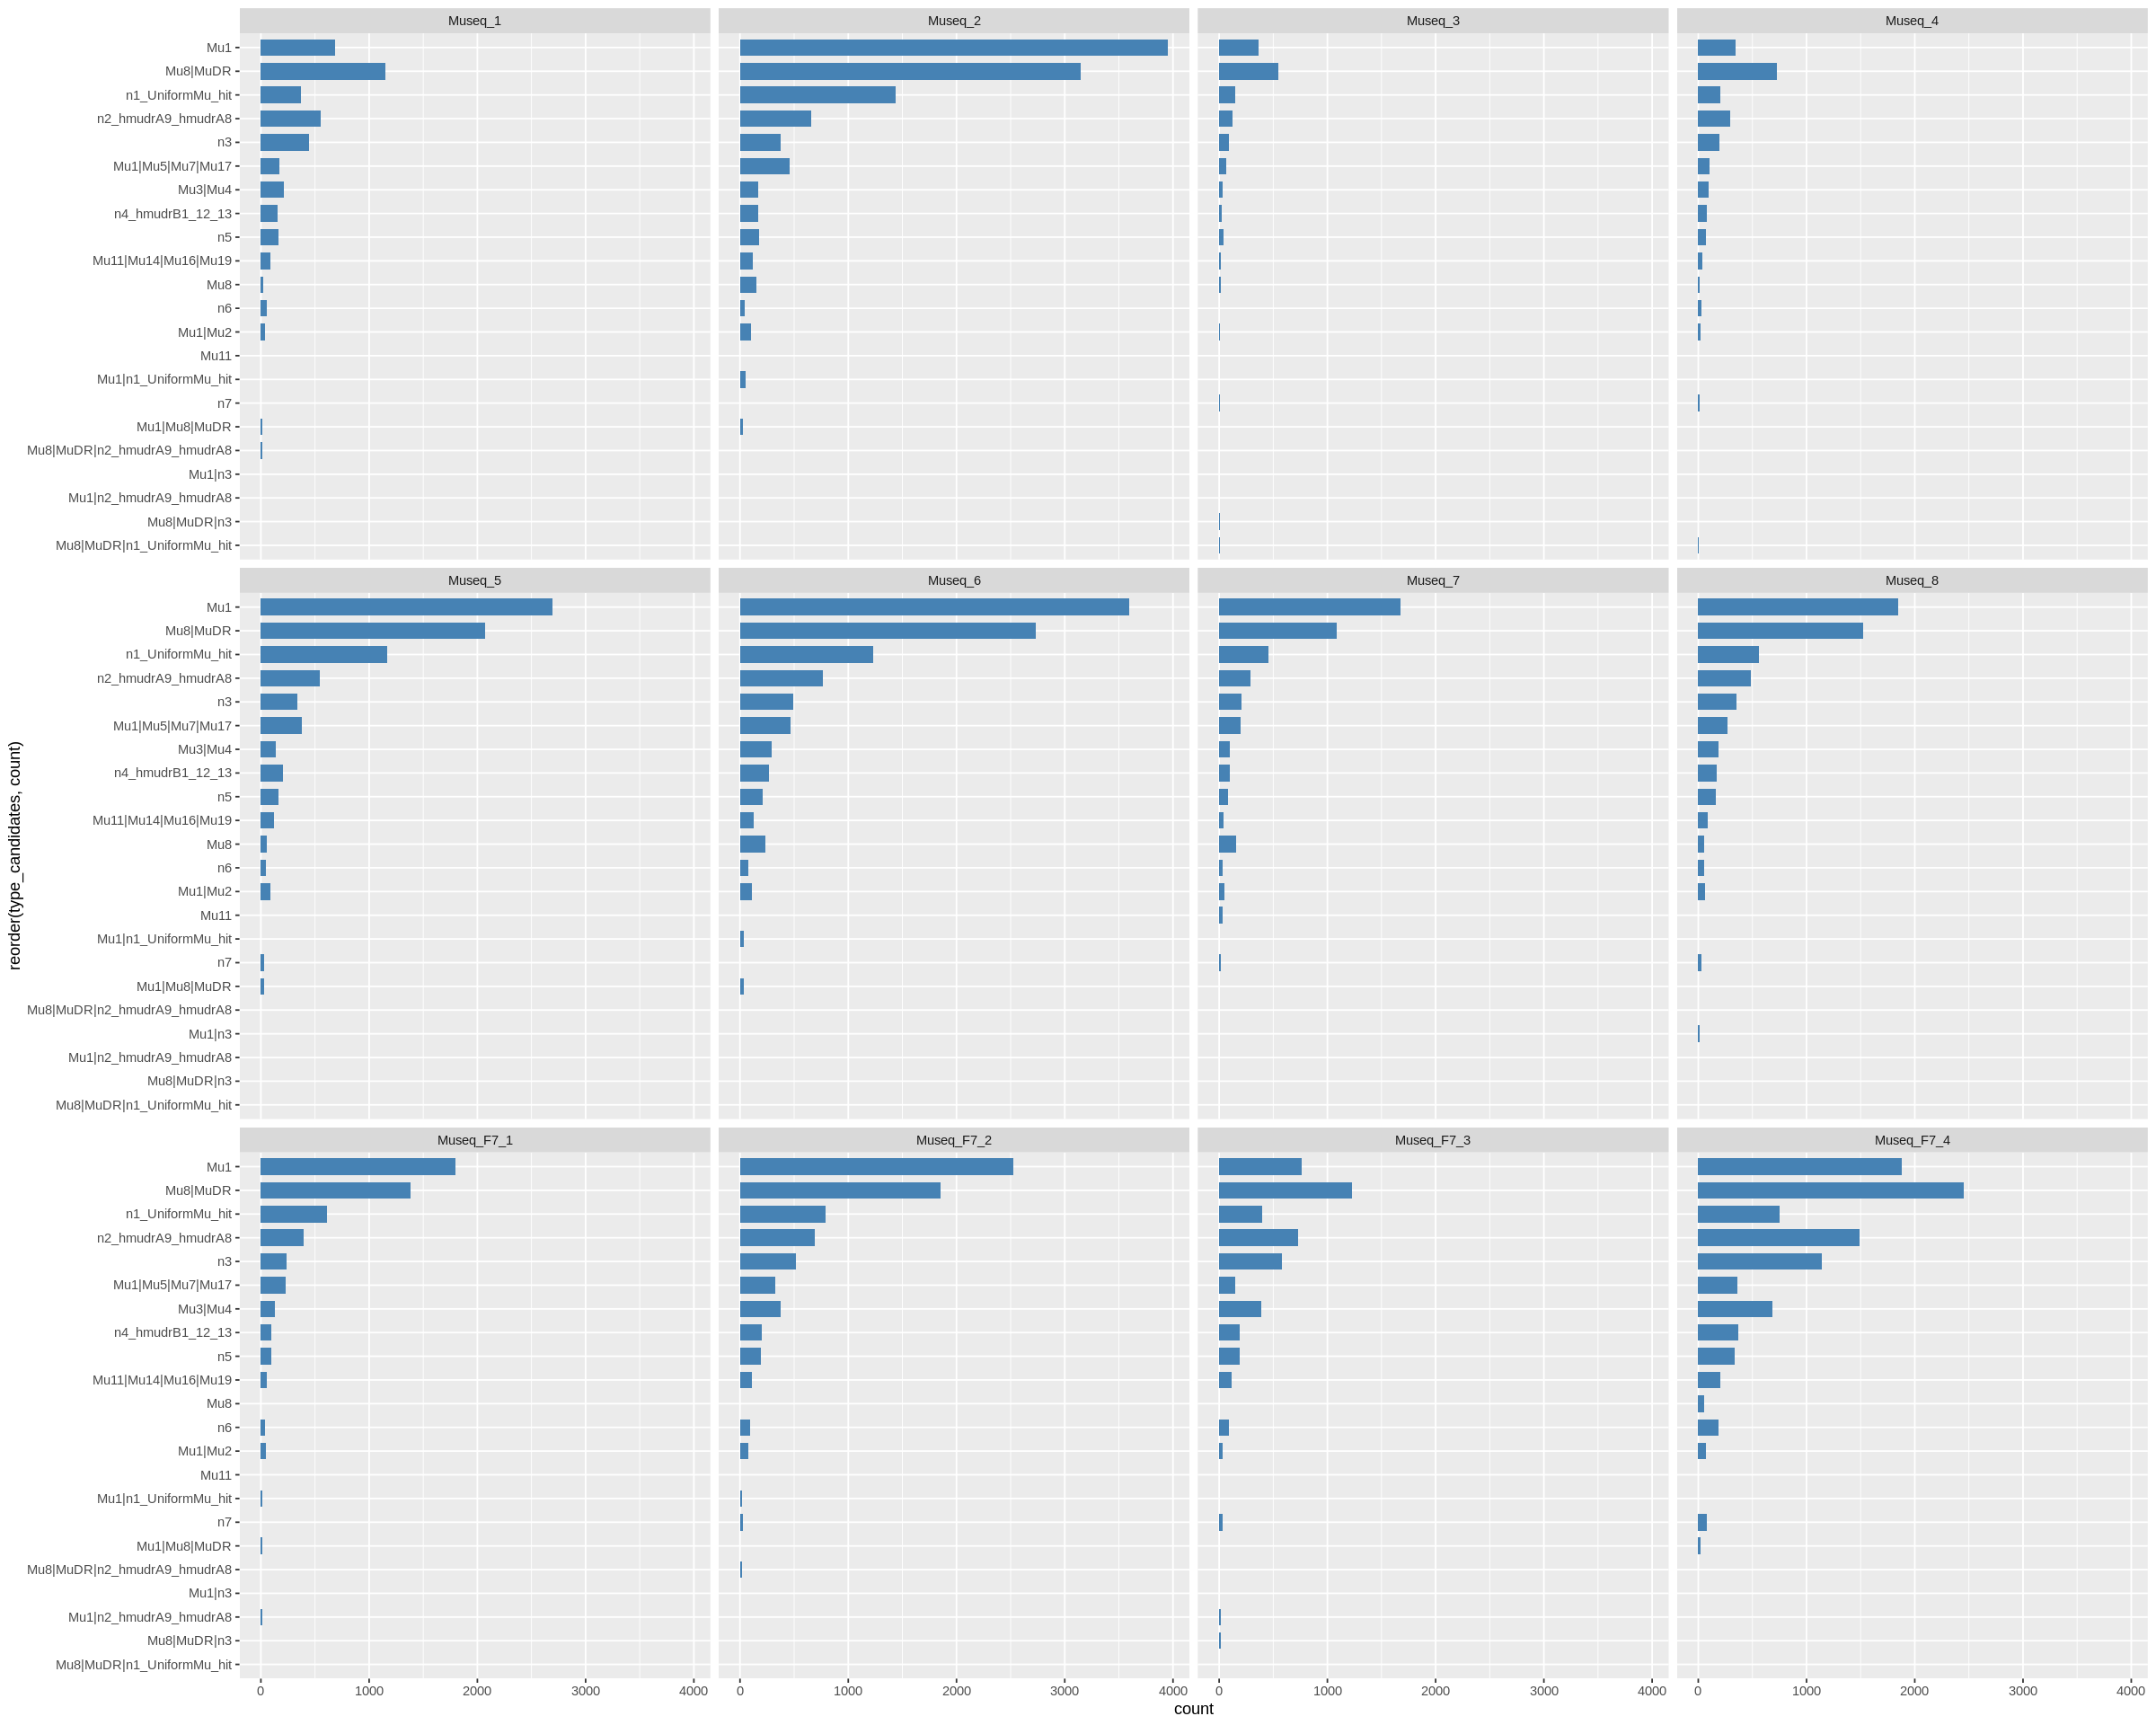

In [290]:
options(repr.plot.width=20, repr.plot.height=16)


all_Mu_not_annotated_merged %>%
  filter(lib == "Museq_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n = 20) %>%
  #plotting
  #quick tips on reordering bars; https://sebastiansauer.github.io/ordering-bars/
  ggplot(., aes(x= reorder(type_candidates, -count), y=count)) +
    geom_col(fill = "darkblue") +
    xlab("Most likely subtype/element") +
    ylab("Frequency") +
#    title("ddd") +
    theme(axis.text.y=element_text(size=12, face="bold"),
          axis.text.x=element_text(size=12, face="bold", angle = 315, hjust = 0),
          axis.title=element_text(size=20,face="bold"),
          plot.margin = unit(c(1,2,1,1), "cm"))


all_Mu_not_annotated_merged %>%
  filter(lib == "Museq_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=20) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip()

all_Mu_not_annotated_merged %>%
  filter(lib == "Museq_F7_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=20) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip()

#or percentage
all_Mu_not_annotated_merged %>%
  filter(lib == "Museq_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  mutate(count_perc = count/sum(.$count)) %>%
  head(n=20) %>%
    ggplot(., aes(x = reorder(type_candidates, count_perc), y= count_perc)) +
      geom_bar(stat = "identity", width=0.7, fill="steelblue") +
      coord_flip()


all_Mu_not_annotated_merged %>%
#  filter(lib != "Museq_3") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  dplyr::slice(1:15) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip() + 
    facet_wrap(~lib)

### Candidates determination for TE typing validation

In [254]:
all_Mu_merged %>%
#  filter(lib == "Mu1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  slice(1:15) %>%
  pull(type_candidates)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'slice': Rle of type 'list' is not supported


In [265]:
Mu_F7_4_germinal_not_annotated %>%
  arrange(Chr, InsertionStart) %>%
  head()

,Chr,InsertionStart,InsertionEnd,Sample,StartReads,EndReads,TotalReads,Mu1_L,Mu1_R,Mu2_L,⋯,type_n_max_value,all_TIES,type_TIES,all_max_name,type_max_name,perc_uncategorized,perc_best_type_of_types,all_candidates,type_candidates,lib
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1,34332,34340,Col_09,7,4,11,0,1,0,⋯,5,TIED,TIED,TIED,TIED,0.1818182,0.1818182,Mu8|MuDR|n2_hmudrA9_hmudrA8|n4_hmudrB1_12_13|uncategorized,Mu8|MuDR|n2_hmudrA9_hmudrA8|n4_hmudrB1_12_13,Museq_F7_4
2,1,34332,34340,Row_08,7,9,16,1,1,0,⋯,4,WINNER,TIED,uncategorized,TIED,0.3125000,0.1250000,Mu1|n4_hmudrB1_12_13|n7|uncategorized,Mu1|n4_hmudrB1_12_13|n7,Museq_F7_4
3,1,34640,34648,Col_16,20,20,40,1,4,0,⋯,3,WINNER,TIED,uncategorized,TIED,0.2750000,0.2250000,Mu8|MuDR|uncategorized,Mu8|MuDR,Museq_F7_4
4,1,34640,34648,Row_05,15,26,41,1,3,0,⋯,3,TIED,TIED,TIED,TIED,0.1951220,0.1951220,Mu8|MuDR|uncategorized,Mu8|MuDR,Museq_F7_4
5,1,34706,34714,Col_11,10,20,30,0,4,0,⋯,2,WINNER,WINNER,n2_hmudrA9_hmudrA8,n2_hmudrA9_hmudrA8,0.1000000,0.1666667,n2_hmudrA9_hmudrA8,n2_hmudrA9_hmudrA8,Museq_F7_4
6,1,34706,34714,Row_05,9,11,20,0,1,0,⋯,2,WINNER,WINNER,n6,n6,0.1000000,0.3500000,n6,n6,Museq_F7_4


In [267]:
# functioning the candidate determination

best_candidate_determination_not_annotated <- function(mu_species, read_support_threshold, max_output_rows) {

  best_candidates <- all_Mu_not_annotated_merged %>%
    #exclude B73 lib 3 - Col background
    filter(lib != "Museq_3") %>%
    filter(StartReads >= read_support_threshold) %>%
    filter(EndReads >= read_support_threshold) %>%
    filter(perc_best_type_of_types >= 0.2) %>%
    filter(type_candidates == mu_species) %>%
#    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates)  %>%
    group_by(lib, Chr, InsertionStart, type_candidates)  %>%
    tally() %>%
    arrange(desc(n)) %>%
    filter(n >= 2)
  nrow(best_candidates)
  
  final_best_candidates <- all_Mu_not_annotated_merged %>%
#    dplyr::right_join(., best_candidates, by = c("lib", "Chr", "GeneStart", "InsertionStart", "GeneID", "type_candidates")) %>%
    dplyr::right_join(., best_candidates, by = c("lib", "Chr", "InsertionStart", "type_candidates")) %>%
#    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates) %>%
    group_by(lib, Chr, InsertionStart, type_candidates) %>%
    #merge sample information so we have each intersection on every line
    mutate(Samples = paste0(Sample, collapse = "|")) %>%
    #also retain stock information
#    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates, Samples, stock) %>%
    group_by(lib, Chr, InsertionStart, type_candidates, Samples) %>%
    #compute total reads & percentage of best type association
    summarise(TotalReads = sum(TotalReads), perc_best_type_of_types = sum(perc_best_type_of_types)/2) %>%
    mutate(frac_proof_reads = TotalReads*perc_best_type_of_types) %>%
    arrange(desc(perc_best_type_of_types))
  
  #if more than 20 insertion candidates pass threshold, reduce total number to 20
  if (max_output_rows != "all" & nrow(final_best_candidates) > max_output_rows) {
    final_best_candidates <- head(final_best_candidates, n=max_output_rows)
  }
      
  return(final_best_candidates)

}    

In [ ]:
# functioning the candidate determination

best_candidate_determination <- function(mu_species, read_support_threshold, max_output_rows) {

  best_candidates <- all_Mu_merged %>%
    #exclude B73 lib 3 - Col background
    filter(lib != "Museq_3") %>%
    filter(StartReads >= read_support_threshold) %>%
    filter(EndReads >= read_support_threshold) %>%
    filter(perc_best_type_of_types >= 0.2) %>%
    filter(type_candidates == mu_species) %>%
    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates)  %>%
    tally() %>%
    arrange(desc(n)) %>%
    filter(n >= 2)
  nrow(best_candidates)
  
  final_best_candidates <- all_Mu_merged %>%
    dplyr::right_join(., best_candidates, by = c("lib", "Chr", "GeneStart", "InsertionStart", "GeneID", "type_candidates")) %>%
    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates) %>%
    #merge sample information so we have each intersection on every line
    mutate(Samples = paste0(Sample, collapse = "|")) %>%
    #also retain stock information
    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates, Samples, stock) %>%
    #compute total reads & percentage of best type association
    summarise(TotalReads = sum(TotalReads), perc_best_type_of_types = sum(perc_best_type_of_types)/2) %>%
    mutate(frac_proof_reads = TotalReads*perc_best_type_of_types) %>%
    arrange(desc(perc_best_type_of_types))
  
  #if more than 20 insertion candidates pass threshold, reduce total number to 20
  if (max_output_rows != "all" & nrow(final_best_candidates) > max_output_rows) {
    final_best_candidates <- head(final_best_candidates, n=max_output_rows)
  }
      
  return(final_best_candidates)

}    

In [256]:
Mu1_candidates <- best_candidate_determination(mu_species = "Mu1", read_support_threshold = 5, max_output_rows = 20)
Mu8_MuDR_candidates <- best_candidate_determination(mu_species = "Mu8|MuDR", read_support_threshold = 5, max_output_rows = 20)
n1_UniformMu_hit_candidates <- best_candidate_determination(mu_species = "n1_UniformMu_hit", read_support_threshold = 5, max_output_rows = 20)
n2_hmudrA9_hmudrA8_candidates <- best_candidate_determination(mu_species = "n2_hmudrA9_hmudrA8", read_support_threshold = 5, max_output_rows = 20)
n3_candidates <- best_candidate_determination(mu_species = "n3", read_support_threshold = 5, max_output_rows = 20)
Mu1_Mu5_Mu7_Mu17_candidates <- best_candidate_determination(mu_species = "Mu1|Mu5|Mu7|Mu17", read_support_threshold = 5, max_output_rows = 20)
Mu3_Mu4_candidates <- best_candidate_determination(mu_species = "Mu3|Mu4", read_support_threshold = 5, max_output_rows = 20)
n4_hmudrB1_12_13_candidates <- best_candidate_determination(mu_species = "n4_hmudrB1_12_13", read_support_threshold = 5, max_output_rows = 20)
n5_candidates <- best_candidate_determination(mu_species = "n5", read_support_threshold = 5, max_output_rows = 20)
Mu8_candidates <- best_candidate_determination(mu_species = "Mu8", read_support_threshold = 5, max_output_rows = 20)
Mu11_Mu14_Mu16_Mu19_candidates <- best_candidate_determination(mu_species = "Mu11|Mu14|Mu16|Mu19", read_support_threshold = 5, max_output_rows = 20)
Mu1_Mu2_candidates <- best_candidate_determination(mu_species = "Mu1|Mu2", read_support_threshold = 5, max_output_rows = 20)
n6_candidates <- best_candidate_determination(mu_species = "n6", read_support_threshold = 5, max_output_rows = 20)
#read support set to 2 since no good cases where both ROW+COL pool support
n7_candidates <- best_candidate_determination(mu_species = "n7", read_support_threshold = 2, max_output_rows = 20)

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates', 'Samples'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates', 'Samples'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates', 'Samples'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates', 'Samples'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates', 'Samples'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates', 'Samples'. You can override using the
`.groups` ar

In [259]:
head(n1_UniformMu_hit_candidates)

lib,Chr,GeneStart,InsertionStart,GeneID,type_candidates,Samples,stock,TotalReads,perc_best_type_of_types,frac_proof_reads
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
Museq_F7_1,7,165566664,165566849,Zm00001eb323810,n1_UniformMu_hit,Row_10|Col_04,F-0220,25,0.4839744,12.09936
Museq_6,9,146060796,146068069,Zm00001eb397760,n1_UniformMu_hit,Row_09|Col_02,B-844,40,0.4833333,19.33333
Museq_8,6,135679937,135681166,Zm00001eb282370,n1_UniformMu_hit,Row_02|Col_12,D-0113,27,0.4505495,12.16484
Museq_6,4,74444139,74445090,Zm00001eb178320,n1_UniformMu_hit,Row_08|Col_19,B-837,36,0.4444444,16.00000
Museq_6,7,181482735,181484116,Zm00001eb330270,n1_UniformMu_hit,Row_01|Col_10,B-660,37,0.4394410,16.25932
Museq_5,3,111759734,111759837,Zm00001eb134590,n1_UniformMu_hit,Row_20|Col_10,B-0539,30,0.4276018,12.82805


In [286]:
#list for excel sheet
candidate_list <- list(
  "Mu1_candidates" = Mu1_candidates,
  "Mu8_MuDR_candidates" = Mu8_MuDR_candidates,
  "n1_UniformMu_hit_candidates" = n1_UniformMu_hit_candidates,
  "n2_hmudrA9_hmudrA8_candidates" = n2_hmudrA9_hmudrA8_candidates,
  "n3_candidates" = n3_candidates,
  "Mu1_Mu5_Mu7_Mu17_candidates" = Mu1_Mu5_Mu7_Mu17_candidates,
  "Mu3_Mu4_candidates" = Mu3_Mu4_candidates,
  "n4_hmudrB1_12_13_candidates" = n4_hmudrB1_12_13_candidates,
  "n5_candidates" = n5_candidates,
  "Mu8_candidates" = Mu8_candidates,
  "Mu11_Mu14_Mu16_Mu19_candidates" = Mu11_Mu14_Mu16_Mu19_candidates,
  "Mu1_Mu2_candidates" = Mu1_Mu2_candidates,
  "n6_candidates" = n6_candidates,
  "n7_candidates"= n7_candidates
)

#writing to excel sheet
write.xlsx(x = candidate_list, file = "TE_typing_validation_candidates.xlsx", overwrite = TRUE)

Warning message in cor(., method = "pearson"):
“the standard deviation is zero”


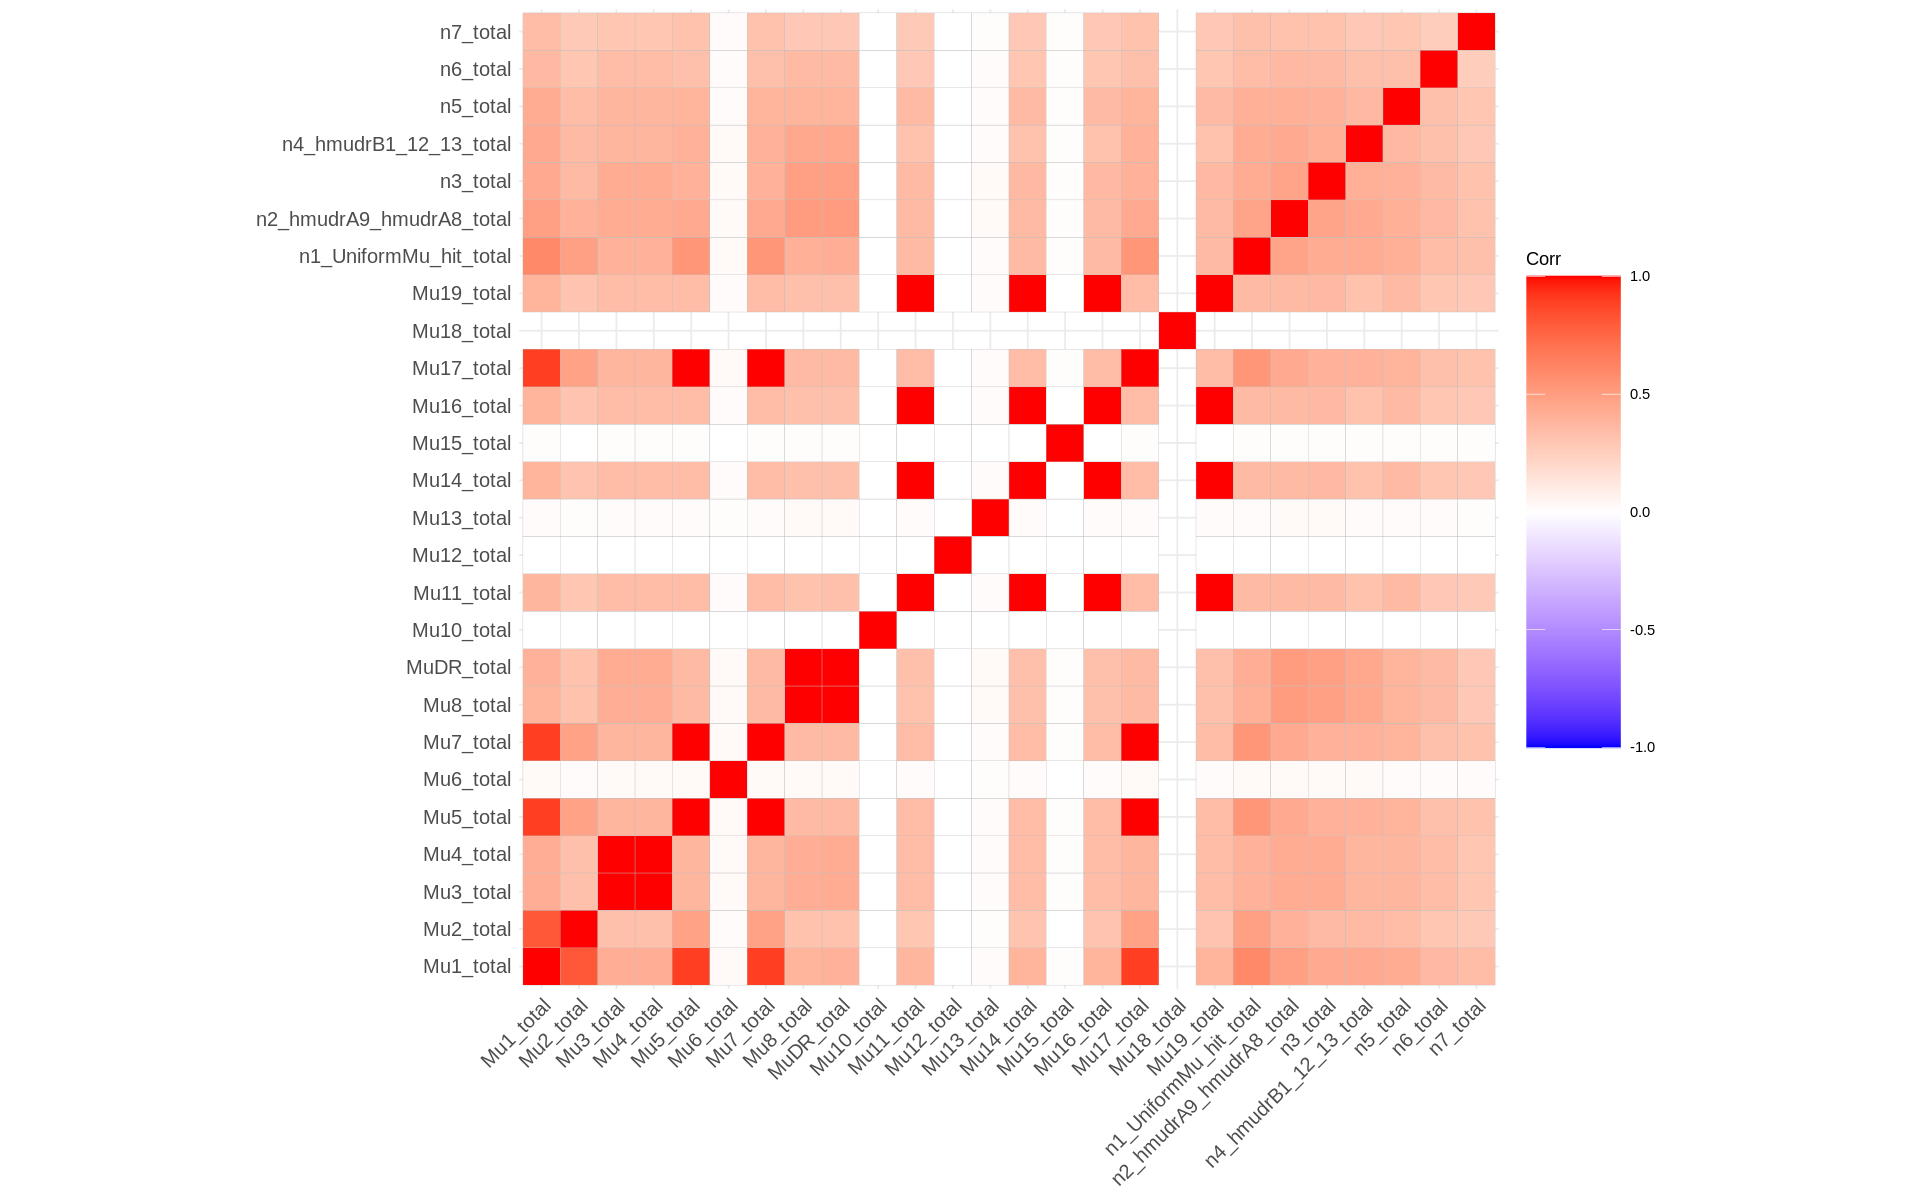

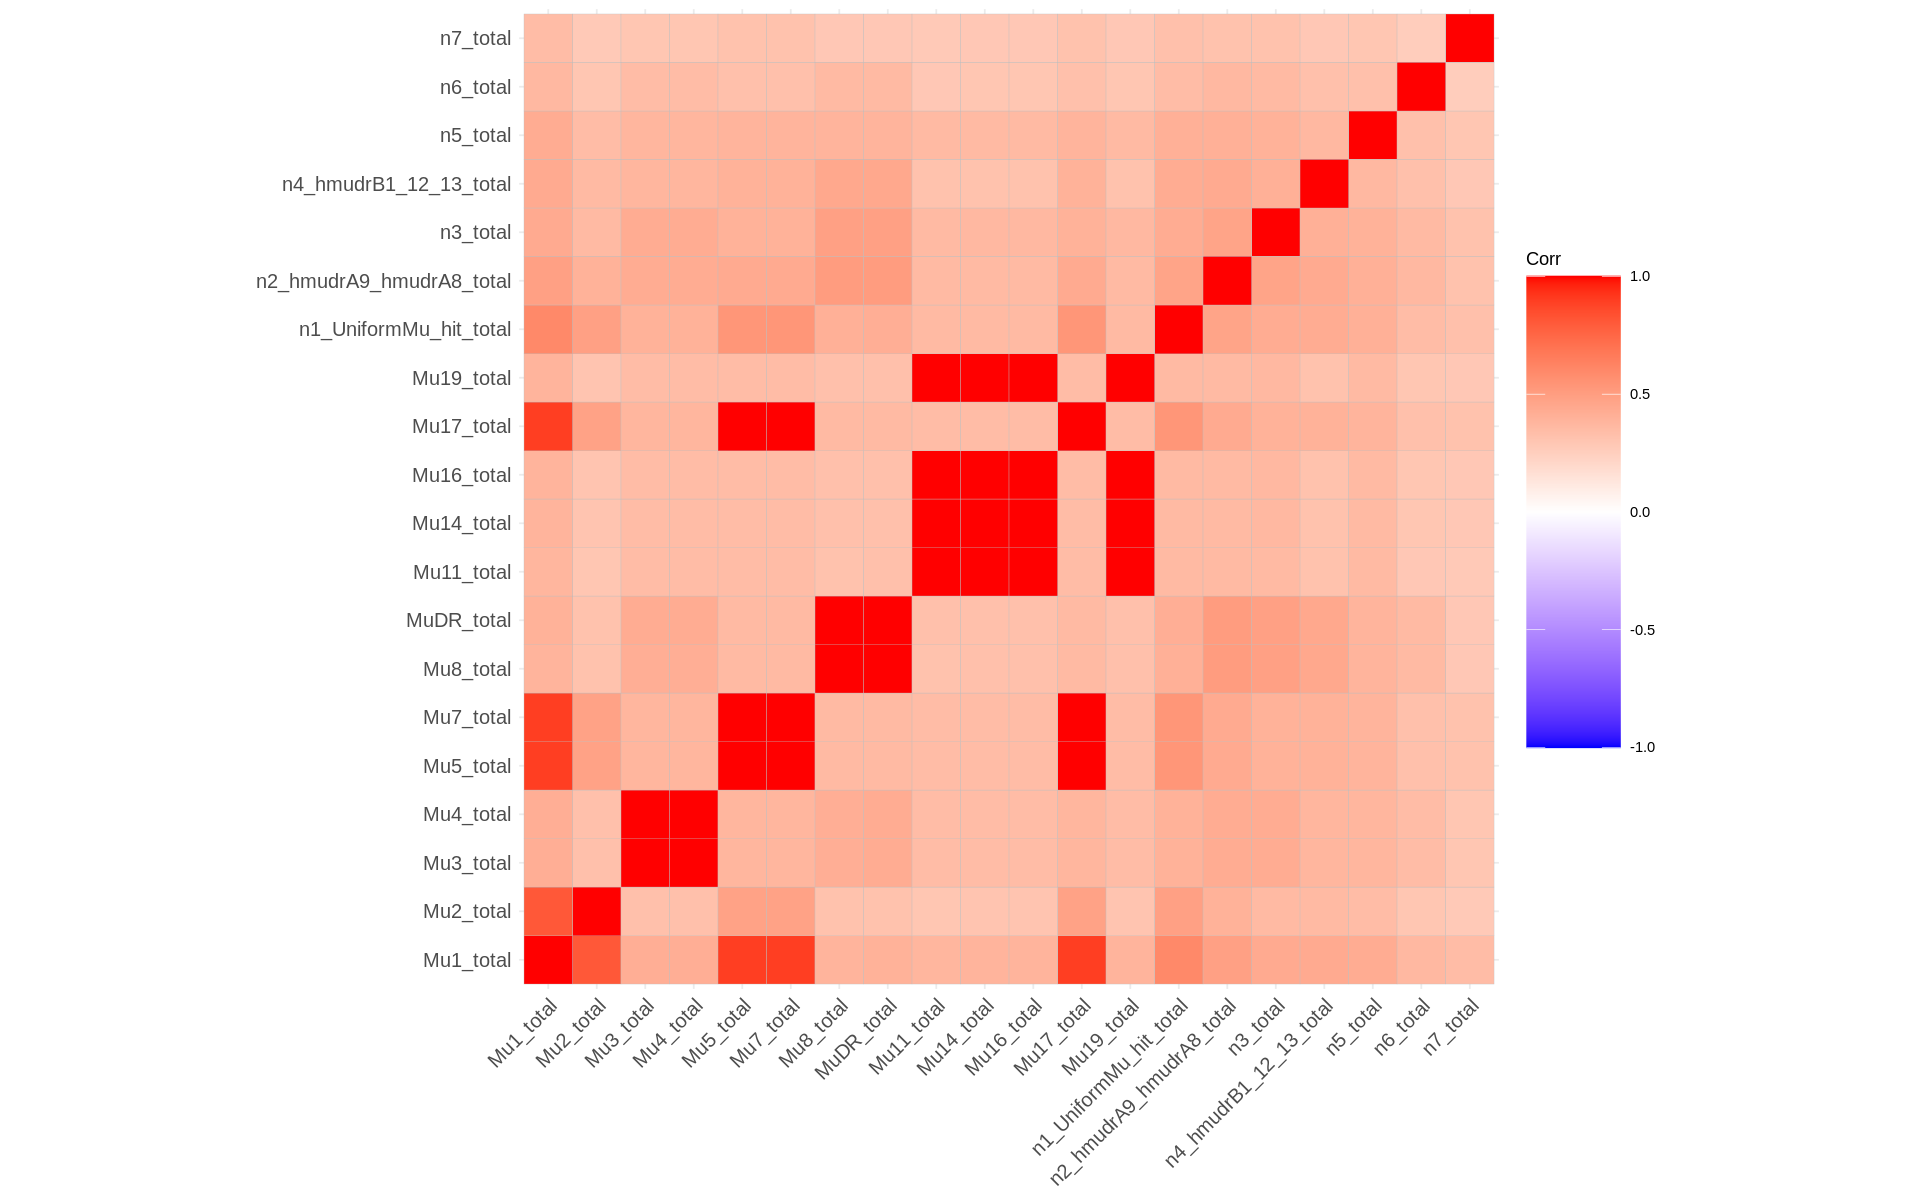

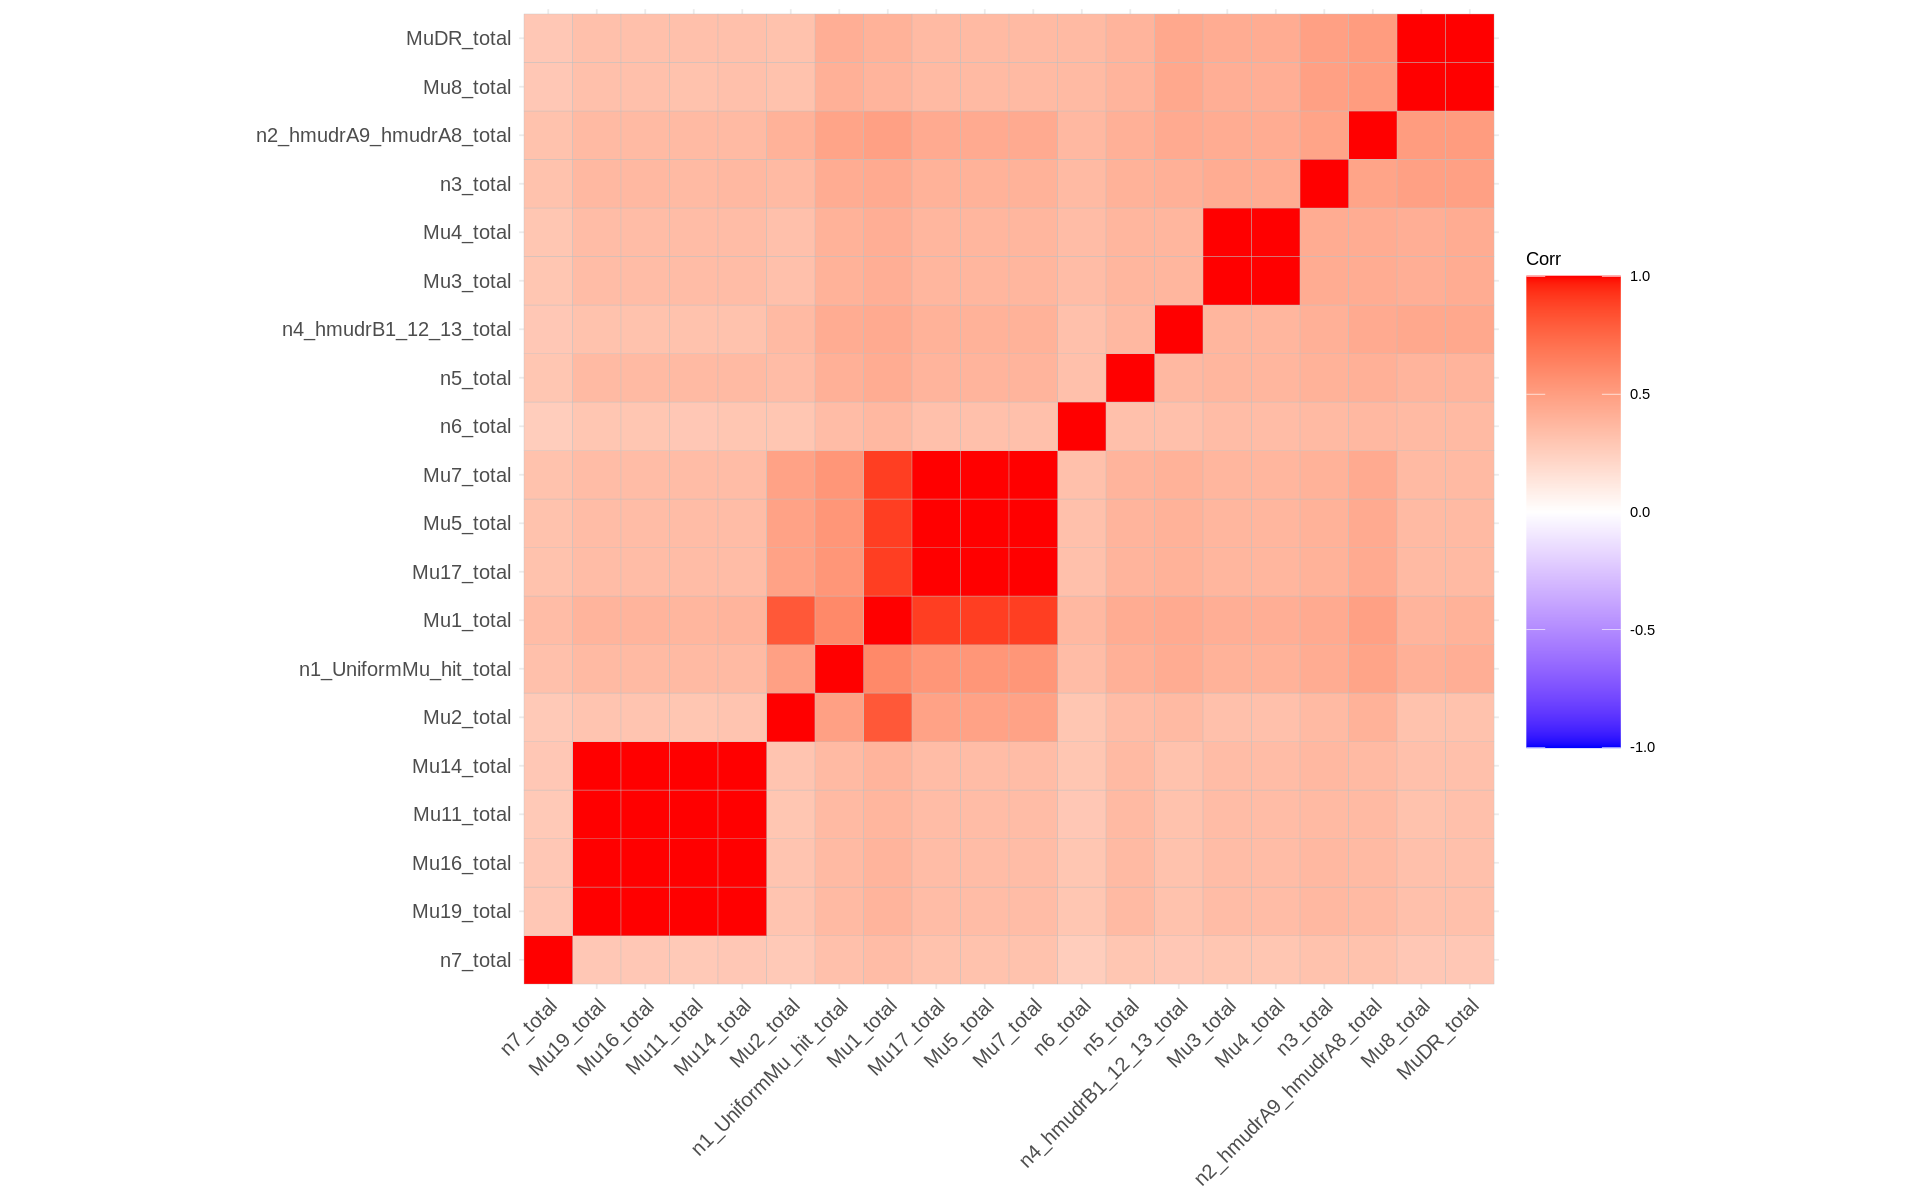

In [287]:
#why not correlation?
B73_Mu_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_total,
           Mu2_total,
           Mu3_total,
           Mu4_total,
           Mu5_total,
           Mu6_total,
           Mu7_total,
           Mu8_total,
           MuDR_total,
           Mu10_total,
           Mu11_total,
           Mu12_total,
           Mu13_total,
           Mu14_total,
           Mu15_total,
           Mu16_total,
           Mu17_total,
           Mu18_total,
           Mu19_total,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total) %>%
    cor(method = "pearson") %>% 
      ggcorrplot() +
        theme(legend.key.size = unit(2, 'cm'))


B73_Mu_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_total,
           Mu2_total,
           Mu3_total,
           Mu4_total,
           Mu5_total,
#           Mu6_total,
           Mu7_total,
           Mu8_total,
           MuDR_total,
#           Mu10_total,
           Mu11_total,
#           Mu12_total,
#           Mu13_total,
           Mu14_total,
#           Mu15_total,
           Mu16_total,
           Mu17_total,
#           Mu18_total,
           Mu19_total,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total) %>%
    cor(method = "pearson") %>% 
      ggcorrplot(hc.order = FALSE) +
        theme(legend.key.size = unit(2, 'cm'))


B73_Mu_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_total,
           Mu2_total,
           Mu3_total,
           Mu4_total,
           Mu5_total,
#           Mu6_total,
           Mu7_total,
           Mu8_total,
           MuDR_total,
#           Mu10_total,
           Mu11_total,
#           Mu12_total,
#           Mu13_total,
           Mu14_total,
#           Mu15_total,
           Mu16_total,
           Mu17_total,
#           Mu18_total,
           Mu19_total,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total) %>%
    cor(method = "pearson") %>% 
      ggcorrplot(hc.order = TRUE, hc.method = "complete") +
        theme(legend.key.size = unit(2, 'cm'))

Warning message in cor(., method = "pearson", ):
“the standard deviation is zero”


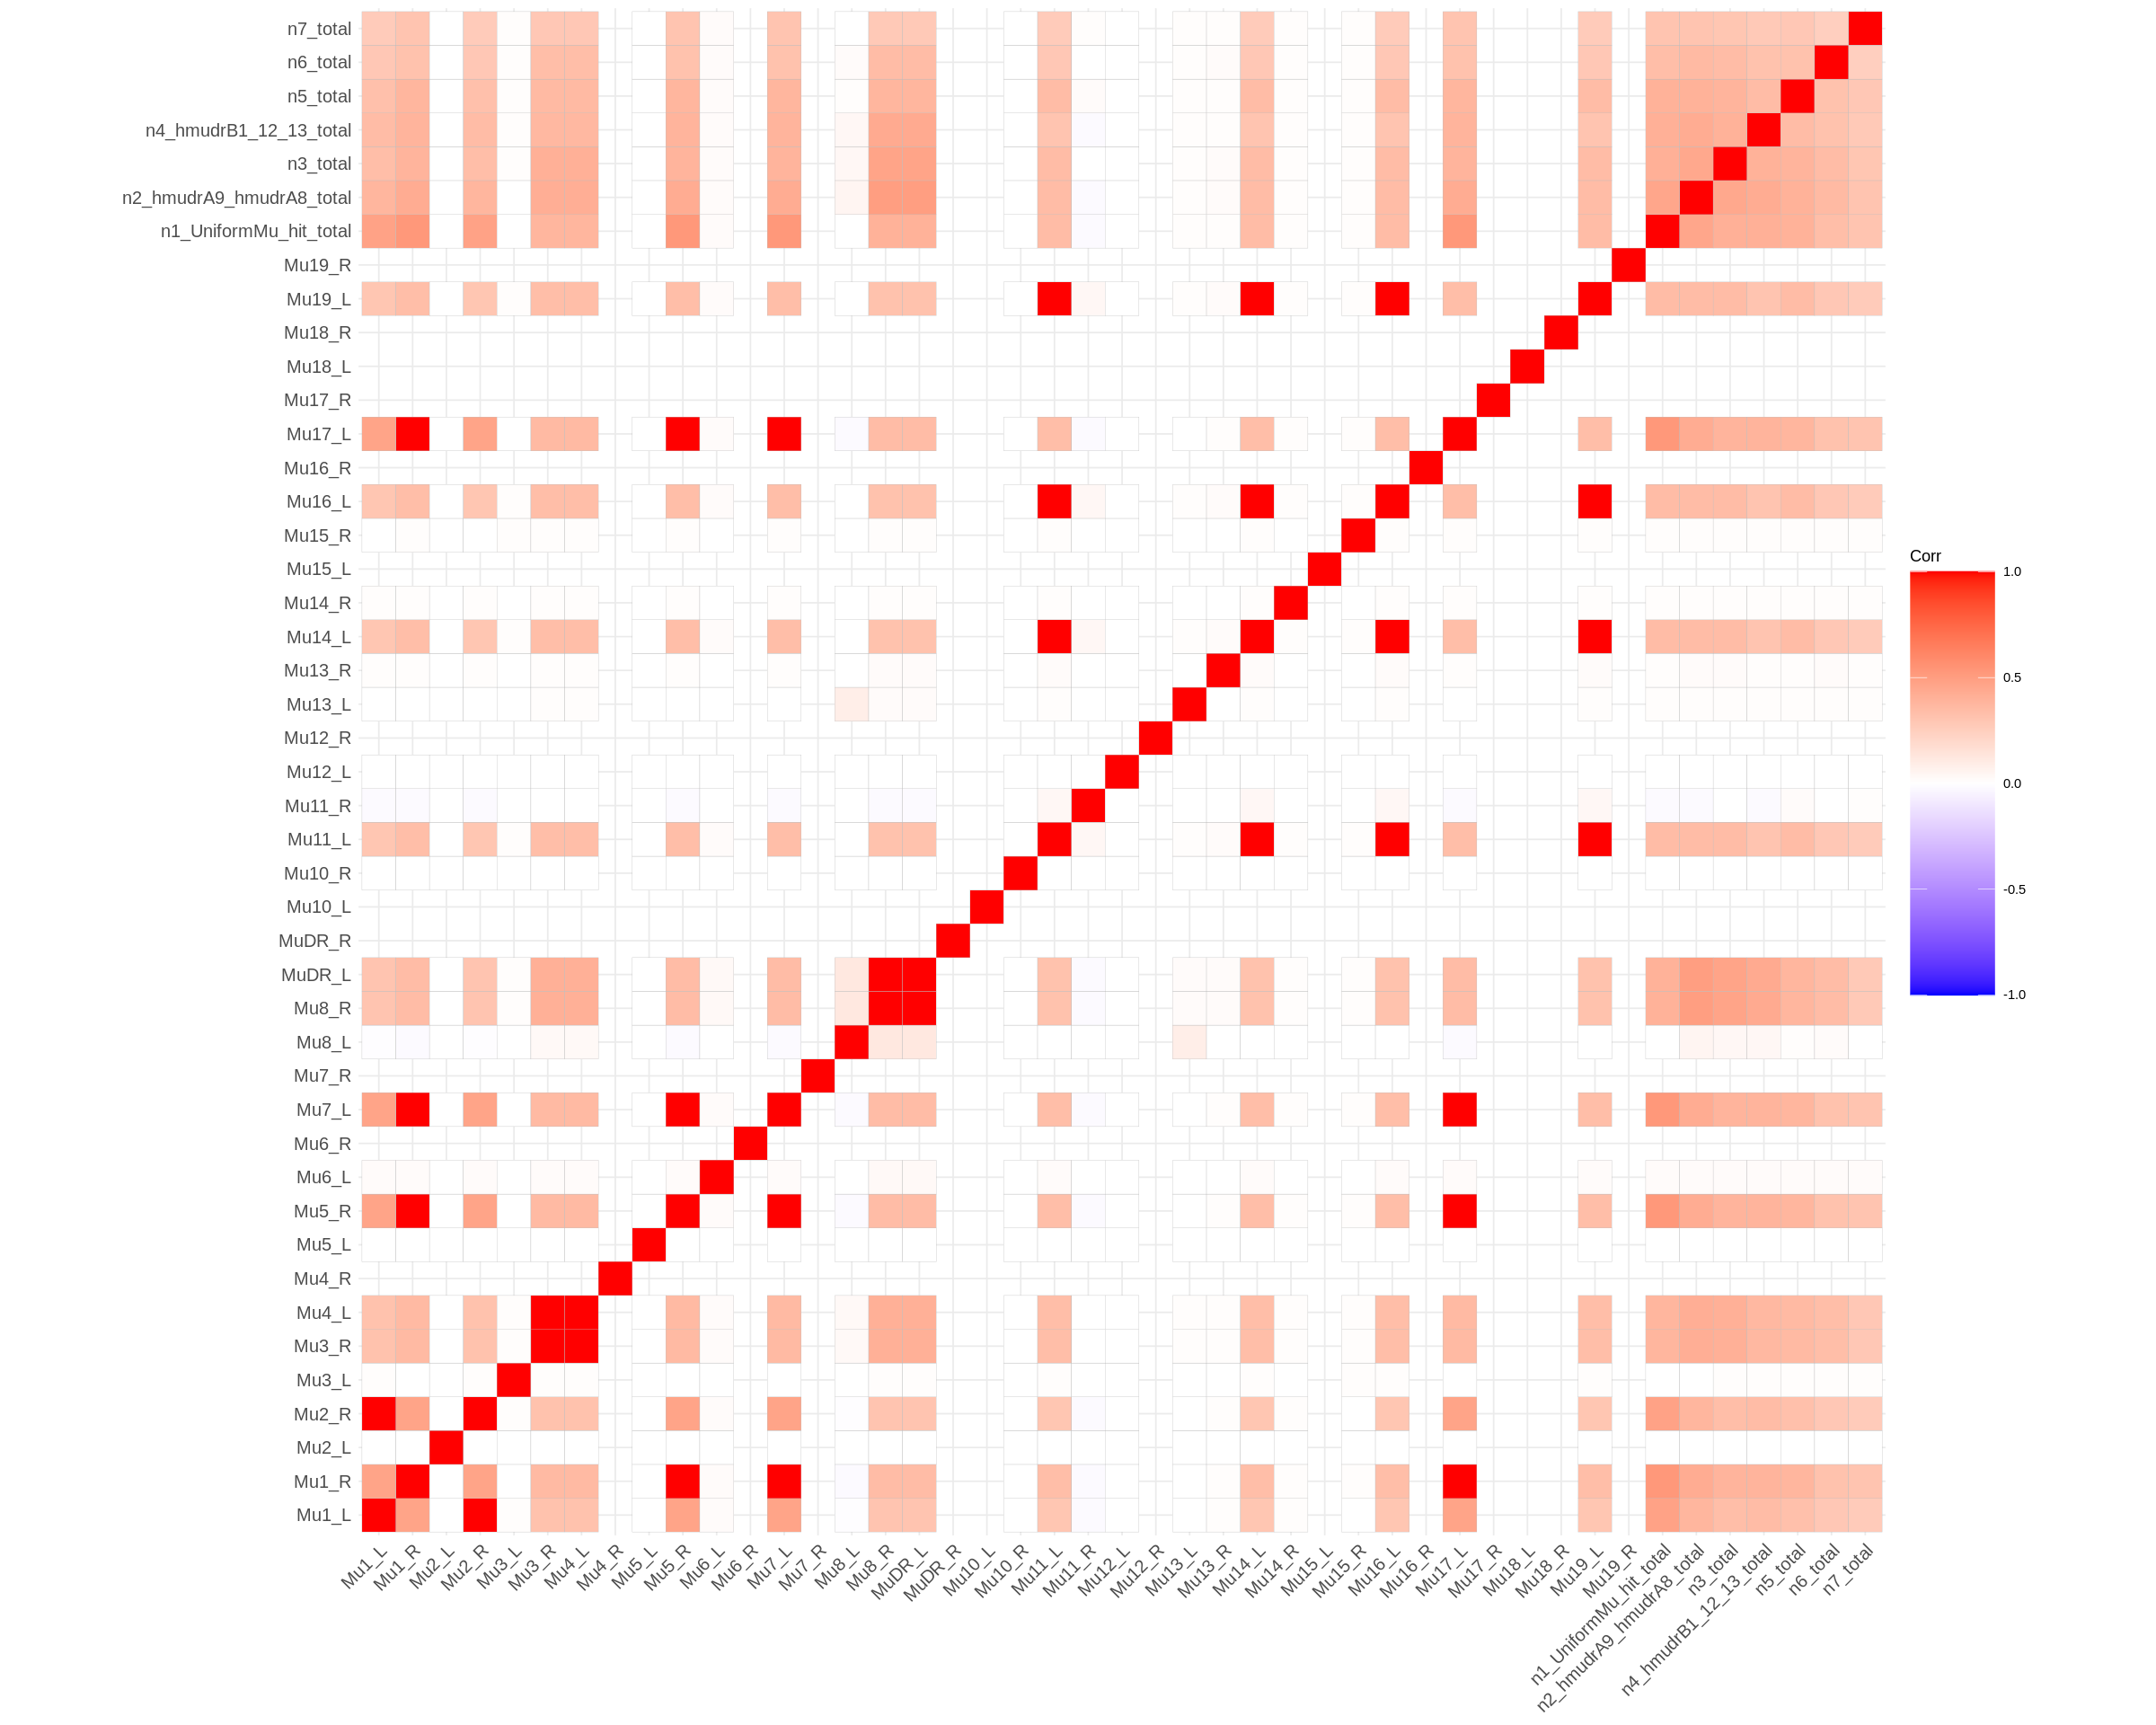

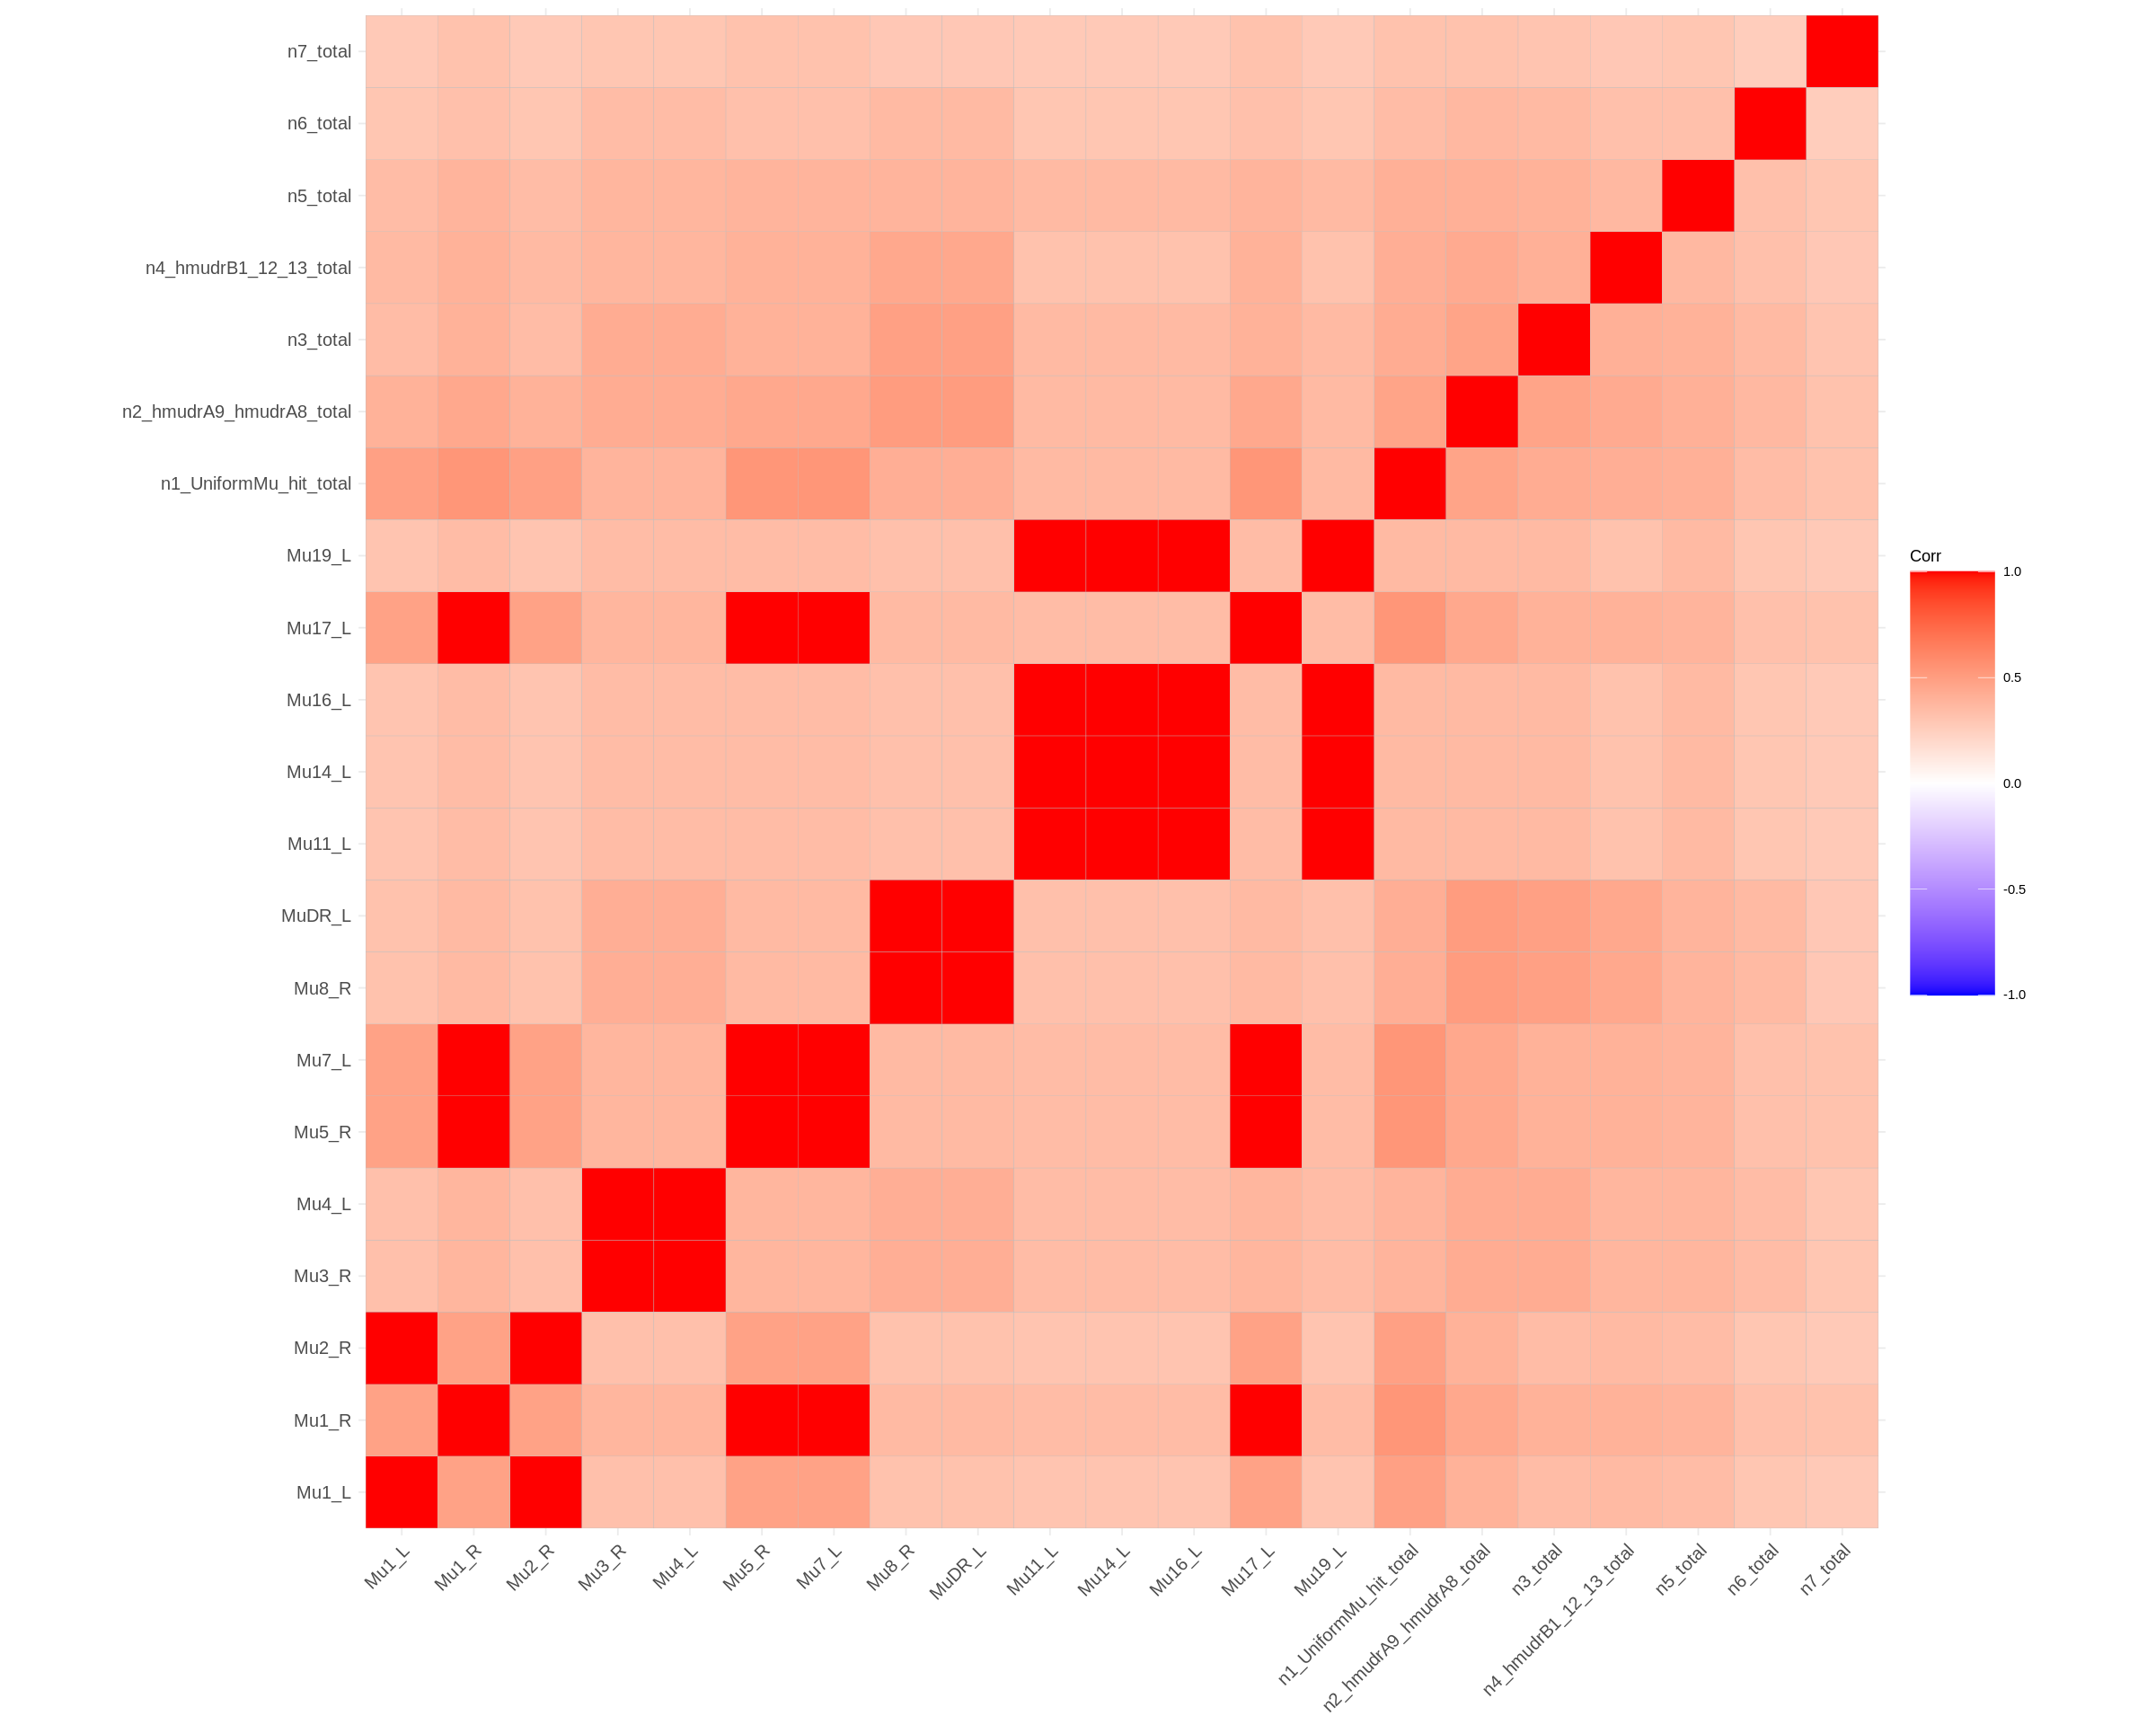

In [291]:
B73_Mu__not_annotated_merged %>%
    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_L, Mu1_R,
           Mu2_L, Mu2_R,
           Mu3_L, Mu3_R,
           Mu4_L, Mu4_R,
           Mu5_L, Mu5_R,
           Mu6_L, Mu6_R,
           Mu7_L, Mu7_R,
           Mu8_L, Mu8_R,
           MuDR_L, MuDR_R,
           Mu10_L, Mu10_R,
           Mu11_L, Mu11_R,
           Mu12_L, Mu12_R,
           Mu13_L, Mu13_R,
           Mu14_L, Mu14_R,
           Mu15_L, Mu15_R,
           Mu16_L, Mu16_R,
           Mu17_L, Mu17_R,
           Mu18_L, Mu18_R,
           Mu19_L, Mu19_R,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total
          ) %>%
    cor(method = "pearson", ) %>% 
      ggcorrplot() +
        theme(legend.key.size = unit(2, 'cm'))

B73_Mu__not_annotated_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_L, Mu1_R,
           Mu2_R,
           Mu3_R,
           Mu4_L,
           Mu5_R,
           Mu7_L,
           Mu8_R,
           MuDR_L,
           Mu11_L,
           Mu14_L,
           Mu16_L,
           Mu17_L,
           Mu19_L,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total
          ) %>%
    cor(method = "pearson", ) %>% 
      ggcorrplot() +
        theme(legend.key.size = unit(2, 'cm'))

#### Distribution of type specific Mu species in the maize genomes

In [17]:
#should download manually before - getting timeout problems when letting this be done inside "getChromSizesFromFasta()"
#fastaSource = "http://ftp.ensemblgenomes.org/pub/plants/release-51/fasta/zea_mays/dna/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.dna.toplevel.fa.gz"
#gtfSource = "http://ftp.ensemblgenomes.org/pub/plants/release-51/gtf/zea_mays/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.51.gtf.gz"

fastaSource = "/data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.dna.toplevel.fa"
gtfSource = "/data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.gtf"

##Get chromosome sizes
#Let’s first have a look, how to extract chromosome sizes:
zea_mays_ChromSizes = getChromSizesFromFasta(source=fastaSource)
zea_mays_ChromSizes <- zea_mays_ChromSizes[1:10]


##Transcription start sites (TSS)
#Now, let’s see, how to extract transcription start sites:
zea_mays_TSSs = getTssFromGTF(source=gtfSource, convertEnsemblUCSC=FALSE)
head(zea_mays_TSSs)

##Gene models
#What about gene models for partition plots?
features = c("gene", "exon", "three_prime_utr", "five_prime_utr")
zea_mays_GeneModels = getGeneModelsFromGTF(source=gtfSource, features=features, convertEnsemblUCSC=FALSE)

#You can now pass the CEelegansGeneModels object to genomePartitionList function, which created list of genomic partitions that are then passed to calcPartitions function as partitionList argument.
partitionList = genomePartitionList(zea_mays_GeneModels$gene,
                                    zea_mays_GeneModels$exon,
                                    zea_mays_GeneModels$three_prime_utr, 
                                    zea_mays_GeneModels$five_prime_utr)

Got local file: /data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.dna.toplevel.fa

Got local file: /data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.gtf



GRanges object with 6 ranges and 13 metadata columns:
      seqnames              ranges strand |   source     type     score
         <Rle>           <IRanges>  <Rle> | <factor> <factor> <numeric>
  [1]        1 121469876-121469877      - |  ensembl     gene        NA
  [2]        1 278982201-278982202      + |  ensembl     gene        NA
  [3]        1 262069826-262069827      - |  ensembl     gene        NA
  [4]        1 275838514-275838515      - |  ensembl     gene        NA
  [5]        1 269155555-269155556      + |  ensembl     gene        NA
  [6]        1   13037018-13037019      + |  ensembl     gene        NA
          phase         gene_id gene_source   gene_biotype transcript_id
      <integer>     <character> <character>    <character>   <character>
  [1]      <NA> Zm00001eb026490     ensembl protein_coding          <NA>
  [2]      <NA> Zm00001eb056070     ensembl protein_coding          <NA>
  [3]      <NA> Zm00001eb051700     ensembl protein_coding          <NA>
  [4]

Got local file: /data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.gtf

Extracting features: gene, exon, three_prime_utr, five_prime_utr



In [109]:
head(Mu1_candidates)

lib,Chr,GeneStart,InsertionStart,GeneID,type_candidates,Samples,stock,TotalReads,perc_best_type_of_types,frac_proof_reads
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
Museq_6,3,158081035,158082624,Zm00001eb142390,Mu1,Row_06|Col_15,B-785,24,0.5419580,13.00699
Museq_6,10,143196860,143202521,Zm00001eb430350,Mu1,Row_18|Col_01,C-137,21,0.5272727,11.07273
Museq_F7_1,1,16122256,16122536,Zm00001eb005710,Mu1,Row_02|Col_23,F-0047,43,0.5268817,22.65591
Museq_5,7,142050974,142052450,Zm00001eb317510,Mu1,Row_19|Col_22,B-0527,44,0.5205882,22.90588
Museq_5,7,142051798,142052450,Zm00001eb317520,Mu1,Row_19|Col_22,B-0527,44,0.5205882,22.90588
Museq_5,1,28542661,28542655,Zm00001eb009240,Mu1,Row_20|Col_24,B-0553,34,0.5073260,17.24908


In [269]:
#get complete sets of candidates

Mu1_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu1", read_support_threshold = 2, max_output_rows = "all")
Mu8_MuDR_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu8|MuDR", read_support_threshold = 2, max_output_rows = "all")
n1_UniformMu_hit_candidates <- best_candidate_determination_not_annotated(mu_species = "n1_UniformMu_hit", read_support_threshold = 2, max_output_rows = "all")
n2_hmudrA9_hmudrA8_candidates <- best_candidate_determination_not_annotated(mu_species = "n2_hmudrA9_hmudrA8", read_support_threshold = 2, max_output_rows = "all")
n3_candidates <- best_candidate_determination_not_annotated(mu_species = "n3", read_support_threshold = 2, max_output_rows = "all")
Mu1_Mu5_Mu7_Mu17_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu1|Mu5|Mu7|Mu17", read_support_threshold = 2, max_output_rows = "all")
Mu3_Mu4_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu3|Mu4", read_support_threshold = 2, max_output_rows = "all")
n4_hmudrB1_12_13_candidates <- best_candidate_determination_not_annotated(mu_species = "n4_hmudrB1_12_13", read_support_threshold = 2, max_output_rows = "all")
n5_candidates <- best_candidate_determination_not_annotated(mu_species = "n5", read_support_threshold = 2, max_output_rows = "all")
Mu8_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu8", read_support_threshold = 2, max_output_rows = "all")
Mu11_Mu14_Mu16_Mu19_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu11|Mu14|Mu16|Mu19", read_support_threshold = 2, max_output_rows = "all")
Mu1_Mu2_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu1|Mu2", read_support_threshold = 2, max_output_rows = "all")
n6_candidates <- best_candidate_determination_not_annotated(mu_species = "n6", read_support_threshold = 2, max_output_rows = "all")
#read support set to 2 since no good cases where both ROW+COL pool support
n7_candidates <- best_candidate_determination_not_annotated(mu_species = "n7", read_support_threshold = 2, max_output_rows = "all")

`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionSt

In [270]:
Mu1_candidates_gr <- GRanges(seqnames = Mu1_candidates$Chr, ranges = IRanges(start = Mu1_candidates$InsertionStart, end = Mu1_candidates$InsertionStart+8))
Mu8_MuDR_candidates_gr <- GRanges(seqnames = Mu8_MuDR_candidates$Chr, ranges = IRanges(start = Mu8_MuDR_candidates$InsertionStart, end = Mu8_MuDR_candidates$InsertionStart+8)) 
n1_UniformMu_hit_candidates_gr <- GRanges(seqnames = n1_UniformMu_hit_candidates$Chr, ranges = IRanges(start = n1_UniformMu_hit_candidates$InsertionStart, end = n1_UniformMu_hit_candidates$InsertionStart+8)) 
n2_hmudrA9_hmudrA8_candidates_gr <- GRanges(seqnames = n2_hmudrA9_hmudrA8_candidates$Chr, ranges = IRanges(start = n2_hmudrA9_hmudrA8_candidates$InsertionStart, end = n2_hmudrA9_hmudrA8_candidates$InsertionStart+8)) 
n3_candidates_gr <- GRanges(seqnames = n3_candidates$Chr, ranges = IRanges(start = n3_candidates$InsertionStart, end = n3_candidates$InsertionStart+8)) 
Mu1_Mu5_Mu7_Mu17_candidates_gr <- GRanges(seqnames = Mu1_Mu5_Mu7_Mu17_candidates$Chr, ranges = IRanges(start = Mu1_Mu5_Mu7_Mu17_candidates$InsertionStart, end = Mu1_Mu5_Mu7_Mu17_candidates$InsertionStart+8)) 
Mu3_Mu4_candidates_gr <- GRanges(seqnames = Mu3_Mu4_candidates$Chr, ranges = IRanges(start = Mu3_Mu4_candidates$InsertionStart, end = Mu3_Mu4_candidates$InsertionStart+8)) 
n4_hmudrB1_12_13_candidates_gr <- GRanges(seqnames = n4_hmudrB1_12_13_candidates$Chr, ranges = IRanges(start = n4_hmudrB1_12_13_candidates$InsertionStart, end = n4_hmudrB1_12_13_candidates$InsertionStart+8)) 
n5_candidates_gr <- GRanges(seqnames = n5_candidates$Chr, ranges = IRanges(start = n5_candidates$InsertionStart, end = n5_candidates$InsertionStart+8)) 
Mu8_candidates_gr <- GRanges(seqnames = Mu8_candidates$Chr, ranges = IRanges(start = Mu8_candidates$InsertionStart, end = Mu8_candidates$InsertionStart+8)) 
Mu11_Mu14_Mu16_Mu19_candidates_gr <- GRanges(seqnames = Mu11_Mu14_Mu16_Mu19_candidates$Chr, ranges = IRanges(start = Mu11_Mu14_Mu16_Mu19_candidates$InsertionStart, end = Mu11_Mu14_Mu16_Mu19_candidates$InsertionStart+8)) 
Mu1_Mu2_candidates_gr <- GRanges(seqnames = Mu1_Mu2_candidates$Chr, ranges = IRanges(start = Mu1_Mu2_candidates$InsertionStart, end = Mu1_Mu2_candidates$InsertionStart+8)) 
n6_candidates_gr <- GRanges(seqnames = n6_candidates$Chr, ranges = IRanges(start = n6_candidates$InsertionStart, end = n6_candidates$InsertionStart+8)) 
n7_candidates_gr <- GRanges(seqnames = n7_candidates$Chr, ranges = IRanges(start = n7_candidates$InsertionStart, end = n7_candidates$InsertionStart+8)) 

[1] 218207.6

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Warning message:
“Removed 11 rows containing missing values (geom_bar).”


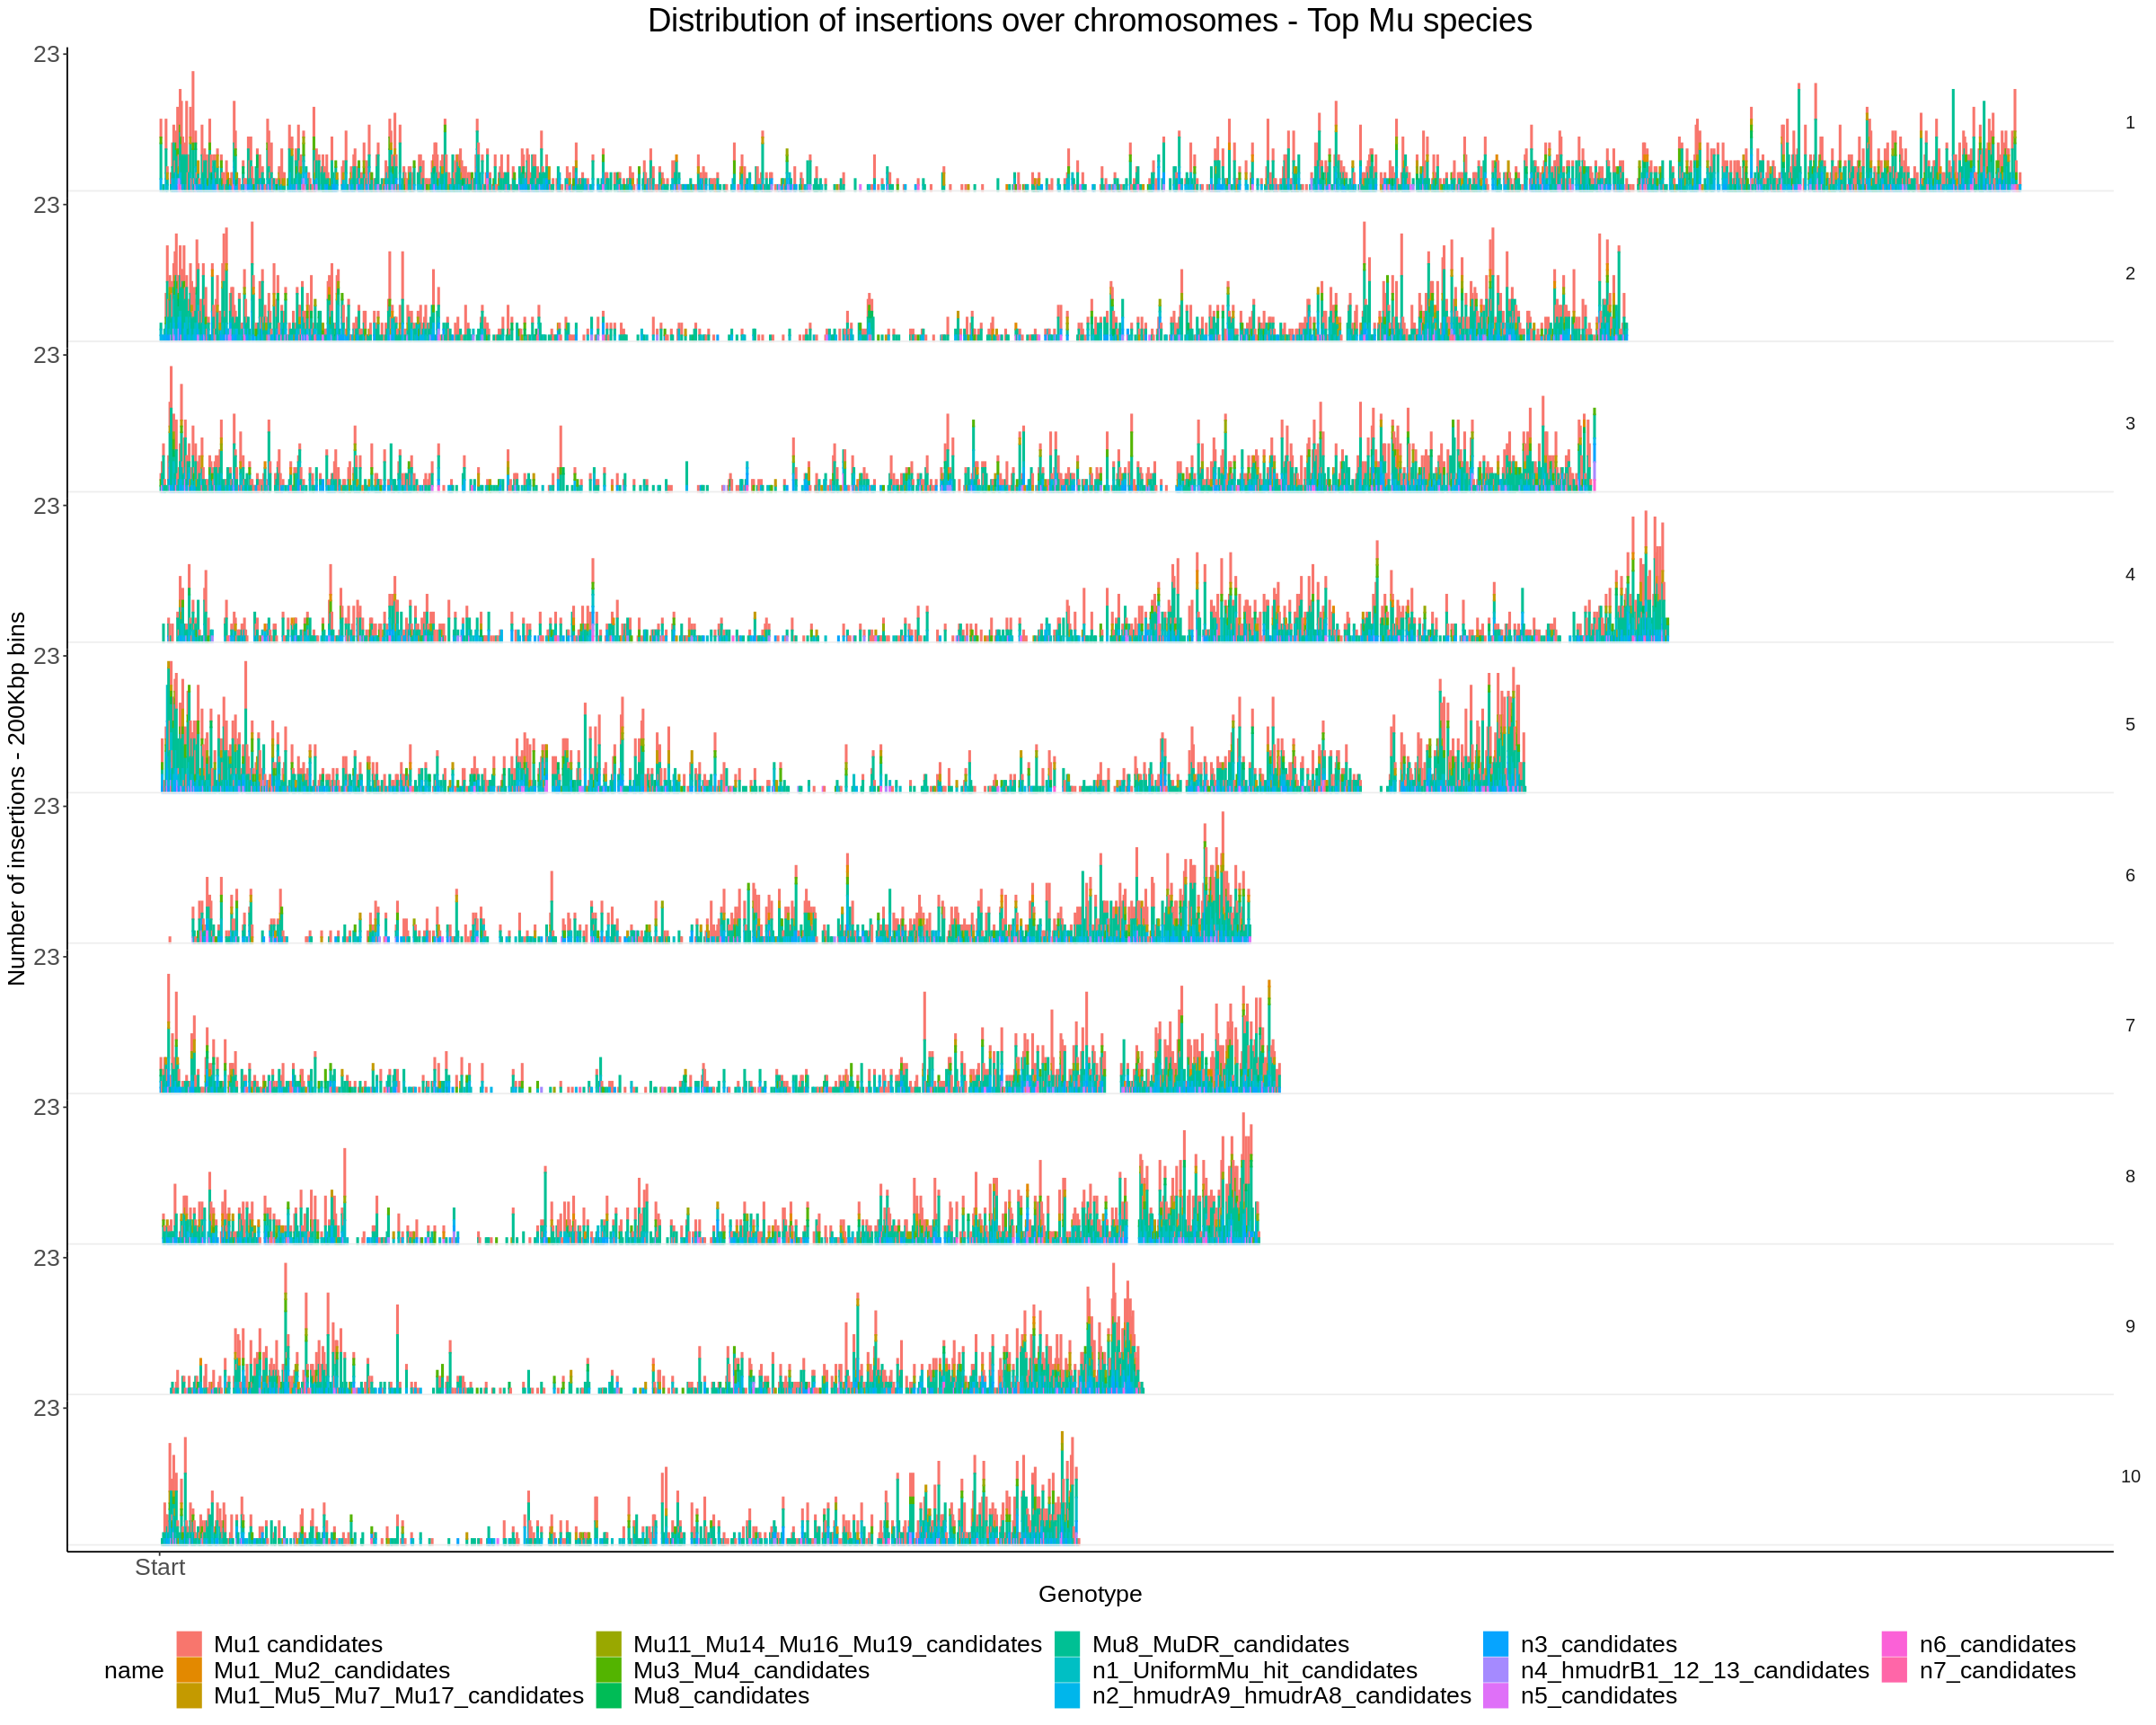

In [276]:
bins  = getGenomeBins(zea_mays_ChromSizes, binCount = 10000)

#we can remove all additional contiqs with this handy command
#?keepStandardChromosomes
bins = keepStandardChromosomes(bins, pruning.mode="coarse")


2182075994/10000

queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr, n1_UniformMu_hit_candidates_gr, n2_hmudrA9_hmudrA8_candidates_gr,
                        n3_candidates_gr, Mu1_Mu5_Mu7_Mu17_candidates_gr, Mu3_Mu4_candidates_gr, n4_hmudrB1_12_13_candidates_gr,
                        n5_candidates_gr, Mu8_candidates_gr, Mu11_Mu14_Mu16_Mu19_candidates_gr, Mu1_Mu2_candidates_gr, 
                        n6_candidates_gr, n7_candidates_gr)

names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates", "n1_UniformMu_hit_candidates", "n2_hmudrA9_hmudrA8_candidates", 
                      "n3_candidates", "Mu1_Mu5_Mu7_Mu17_candidates", "Mu3_Mu4_candidates", "n4_hmudrB1_12_13_candidates",
                      "n5_candidates", "Mu8_candidates", "Mu11_Mu14_Mu16_Mu19_candidates", "Mu1_Mu2_candidates", 
                      "n6_candidates", "n7_candidates")

#queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr)
#names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates")

x = calcChromBins(queryList, bins)
plotChromBins(x) +
  labs(x = "Genotype", 
       y = "Number of insertions - 200Kbp bins", 
       title = "Distribution of insertions over chromosomes - Top Mu species") +
  theme(plot.title = element_text(size=22), 
        legend.title = element_text(size=16),
        legend.text = element_text(size=16),
        axis.text.x = element_text(size=16),
        axis.text.y = element_text(size=16),
        text = element_text(size=16)
       )

##### Known species - big bins

[1] 2182076

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Warning message:
“Removed 42 rows containing missing values (geom_bar).”


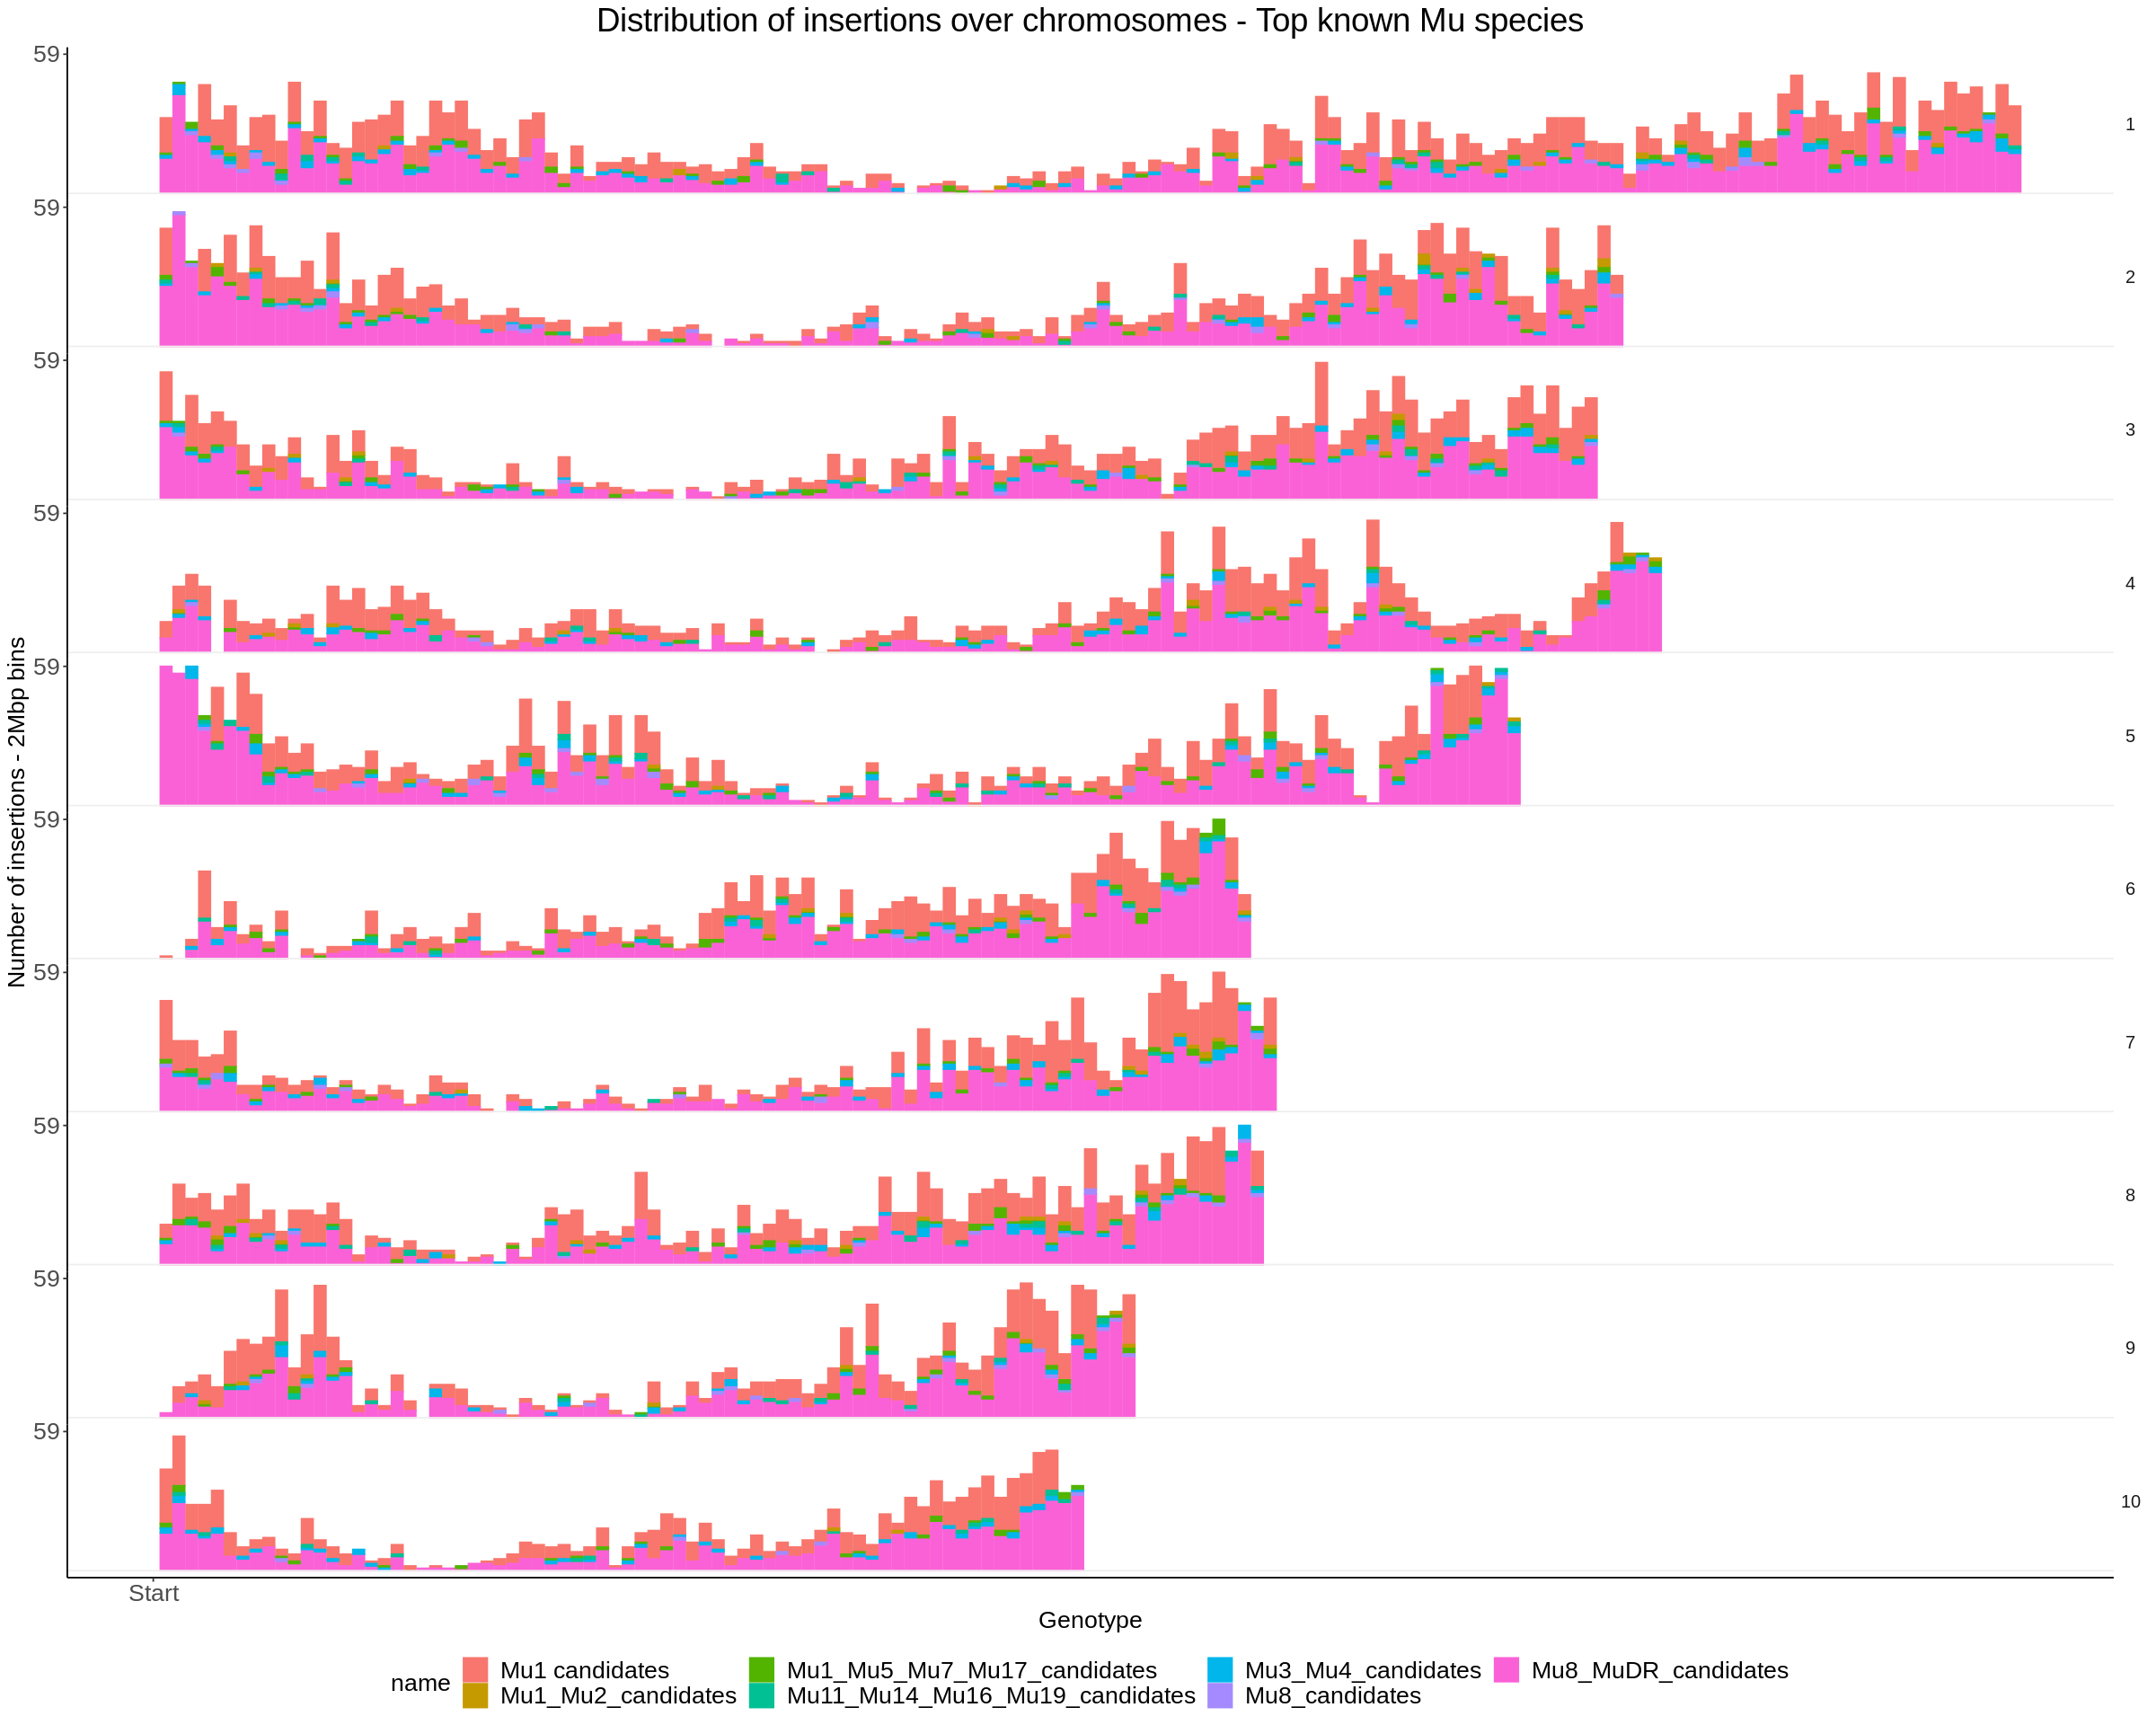

In [292]:
bins  = getGenomeBins(zea_mays_ChromSizes, binCount = 1000)

#we can remove all additional contiqs with this handy command
#?keepStandardChromosomes
bins = keepStandardChromosomes(bins, pruning.mode="coarse")


2182075994/1000

queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr, Mu1_Mu5_Mu7_Mu17_candidates_gr, Mu3_Mu4_candidates_gr,
                        Mu8_candidates_gr, Mu11_Mu14_Mu16_Mu19_candidates_gr, Mu1_Mu2_candidates_gr)

names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates", "Mu1_Mu5_Mu7_Mu17_candidates", "Mu3_Mu4_candidates",
                      "Mu8_candidates", "Mu11_Mu14_Mu16_Mu19_candidates", "Mu1_Mu2_candidates")

#queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr)
#names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates")

x = calcChromBins(queryList, bins)
plotChromBins(x) +
  labs(x = "Genotype", 
       y = "Number of insertions - 2Mbp bins", 
       title = "Distribution of insertions over chromosomes - Top known Mu species") +
  theme(plot.title = element_text(size=22), 
        legend.title = element_text(size=16),
        legend.text = element_text(size=16),
        axis.text.x = element_text(size=16),
        axis.text.y = element_text(size=16),
        text = element_text(size=16)
       )

##### Put. novel species - big bins

[1] 2182076

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Warning message:
“Removed 60 rows containing missing values (geom_bar).”


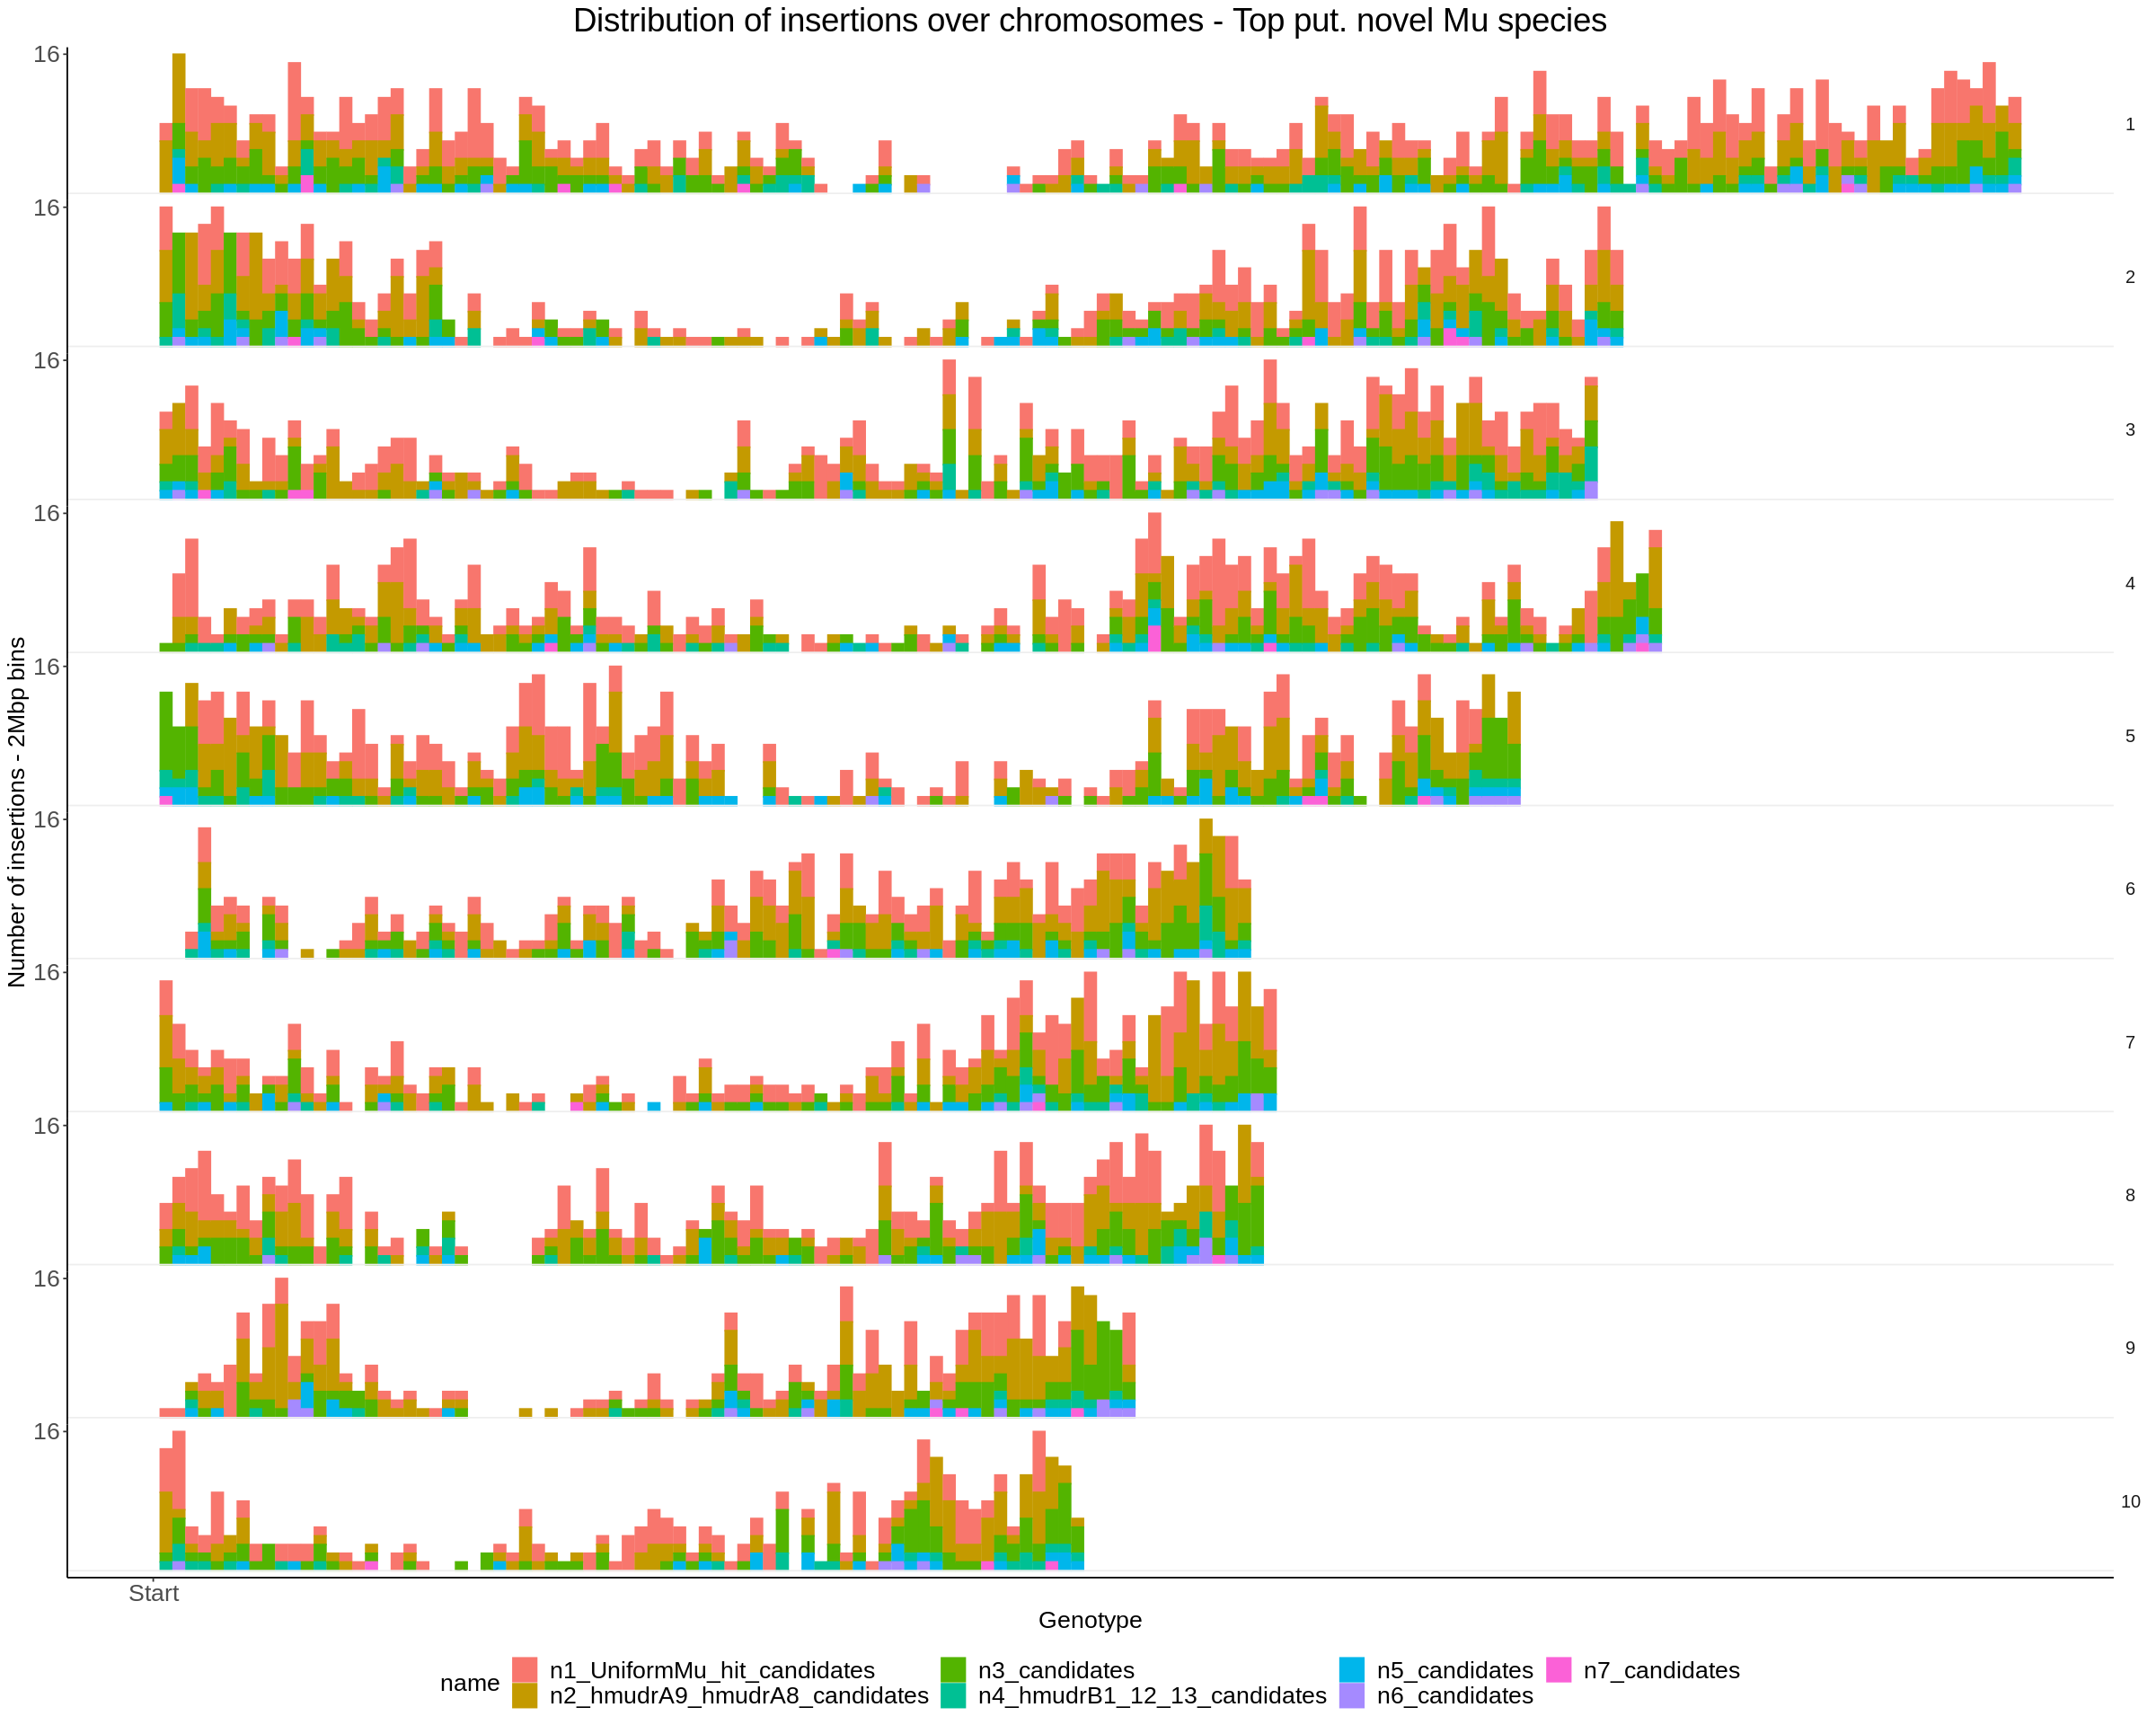

In [293]:
bins  = getGenomeBins(zea_mays_ChromSizes, binCount = 1000)

#we can remove all additional contiqs with this handy command
#?keepStandardChromosomes
bins = keepStandardChromosomes(bins, pruning.mode="coarse")


2182075994/1000

queryList = GRangesList(n1_UniformMu_hit_candidates_gr, n2_hmudrA9_hmudrA8_candidates_gr,
                        n3_candidates_gr, n4_hmudrB1_12_13_candidates_gr,
                        n5_candidates_gr, n6_candidates_gr, n7_candidates_gr)

names(queryList) <- c("n1_UniformMu_hit_candidates", "n2_hmudrA9_hmudrA8_candidates", 
                      "n3_candidates", "n4_hmudrB1_12_13_candidates",
                      "n5_candidates", "n6_candidates", "n7_candidates")

#queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr)
#names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates")

x = calcChromBins(queryList, bins)
plotChromBins(x) +
  labs(x = "Genotype", 
       y = "Number of insertions - 2Mbp bins", 
       title = "Distribution of insertions over chromosomes - Top put. novel Mu species") +
  theme(plot.title = element_text(size=22), 
        legend.title = element_text(size=16),
        legend.text = element_text(size=16),
        axis.text.x = element_text(size=16),
        axis.text.y = element_text(size=16),
        text = element_text(size=16)
       )

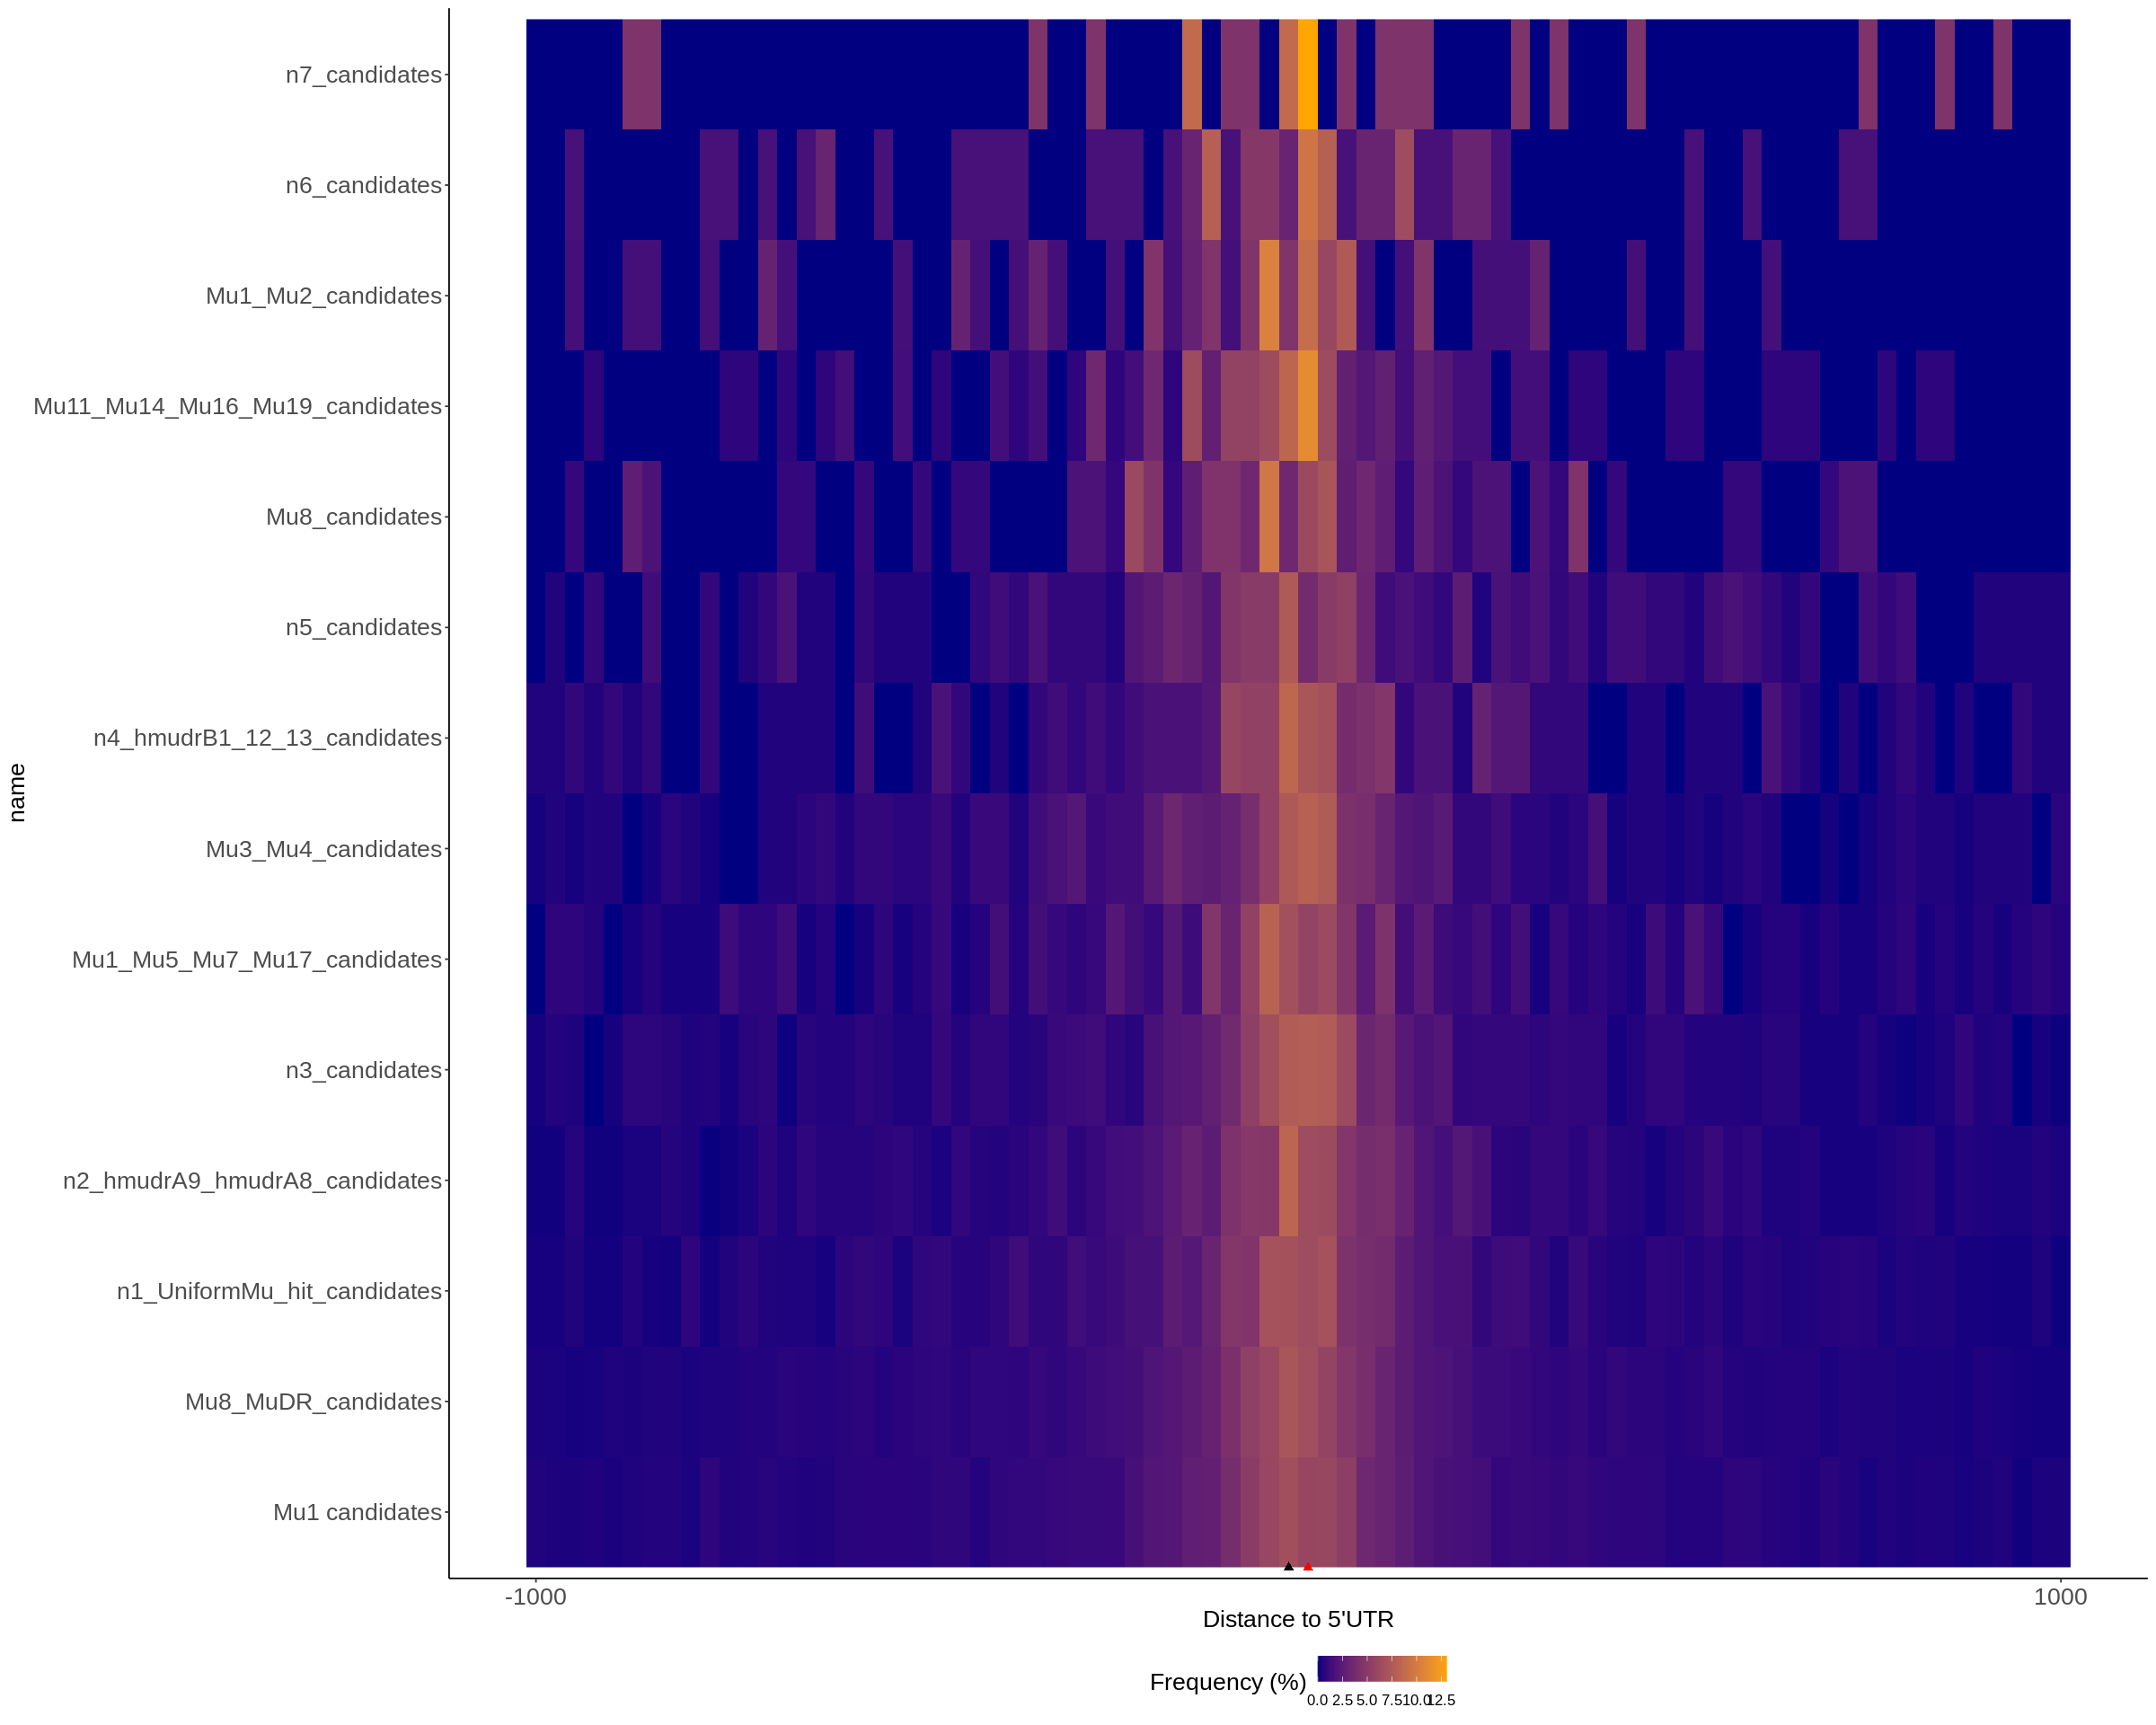

In [297]:
#run helper function (bottom of notebook) for inversion first!

queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr, n1_UniformMu_hit_candidates_gr, n2_hmudrA9_hmudrA8_candidates_gr,
                        n3_candidates_gr, Mu1_Mu5_Mu7_Mu17_candidates_gr, Mu3_Mu4_candidates_gr, n4_hmudrB1_12_13_candidates_gr,
                        n5_candidates_gr, Mu8_candidates_gr, Mu11_Mu14_Mu16_Mu19_candidates_gr, Mu1_Mu2_candidates_gr, 
                        n6_candidates_gr, n7_candidates_gr)

names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates", "n1_UniformMu_hit_candidates", "n2_hmudrA9_hmudrA8_candidates", 
                      "n3_candidates", "Mu1_Mu5_Mu7_Mu17_candidates", "Mu3_Mu4_candidates", "n4_hmudrB1_12_13_candidates",
                      "n5_candidates", "Mu8_candidates", "Mu11_Mu14_Mu16_Mu19_candidates", "Mu1_Mu2_candidates", 
                      "n6_candidates", "n7_candidates")

#featureDist
nbins=40

GeneDist = calcFeatureDist(query = queryList, features = partitionList$fiveUTR)
GeneDist <- lapply(GeneDist, FUN = quick_invert)
# Then plot the result:
plotFeatureDist(GeneDist, featureName="5'UTR", size = 1e3, nbins = nbins, tile = TRUE, labelOrder = "default") +
  geom_point(aes(x=nbins+1, y=0.5), color="red", 
                   size=2, shape=17, alpha=0.8) +
  theme(plot.title = element_text(size=22), 
        legend.title = element_text(size=16),
        legend.text = element_text(size=10),
        axis.text.x = element_text(size=16),
        axis.text.y = element_text(size=16),
        text = element_text(size=16)
       )

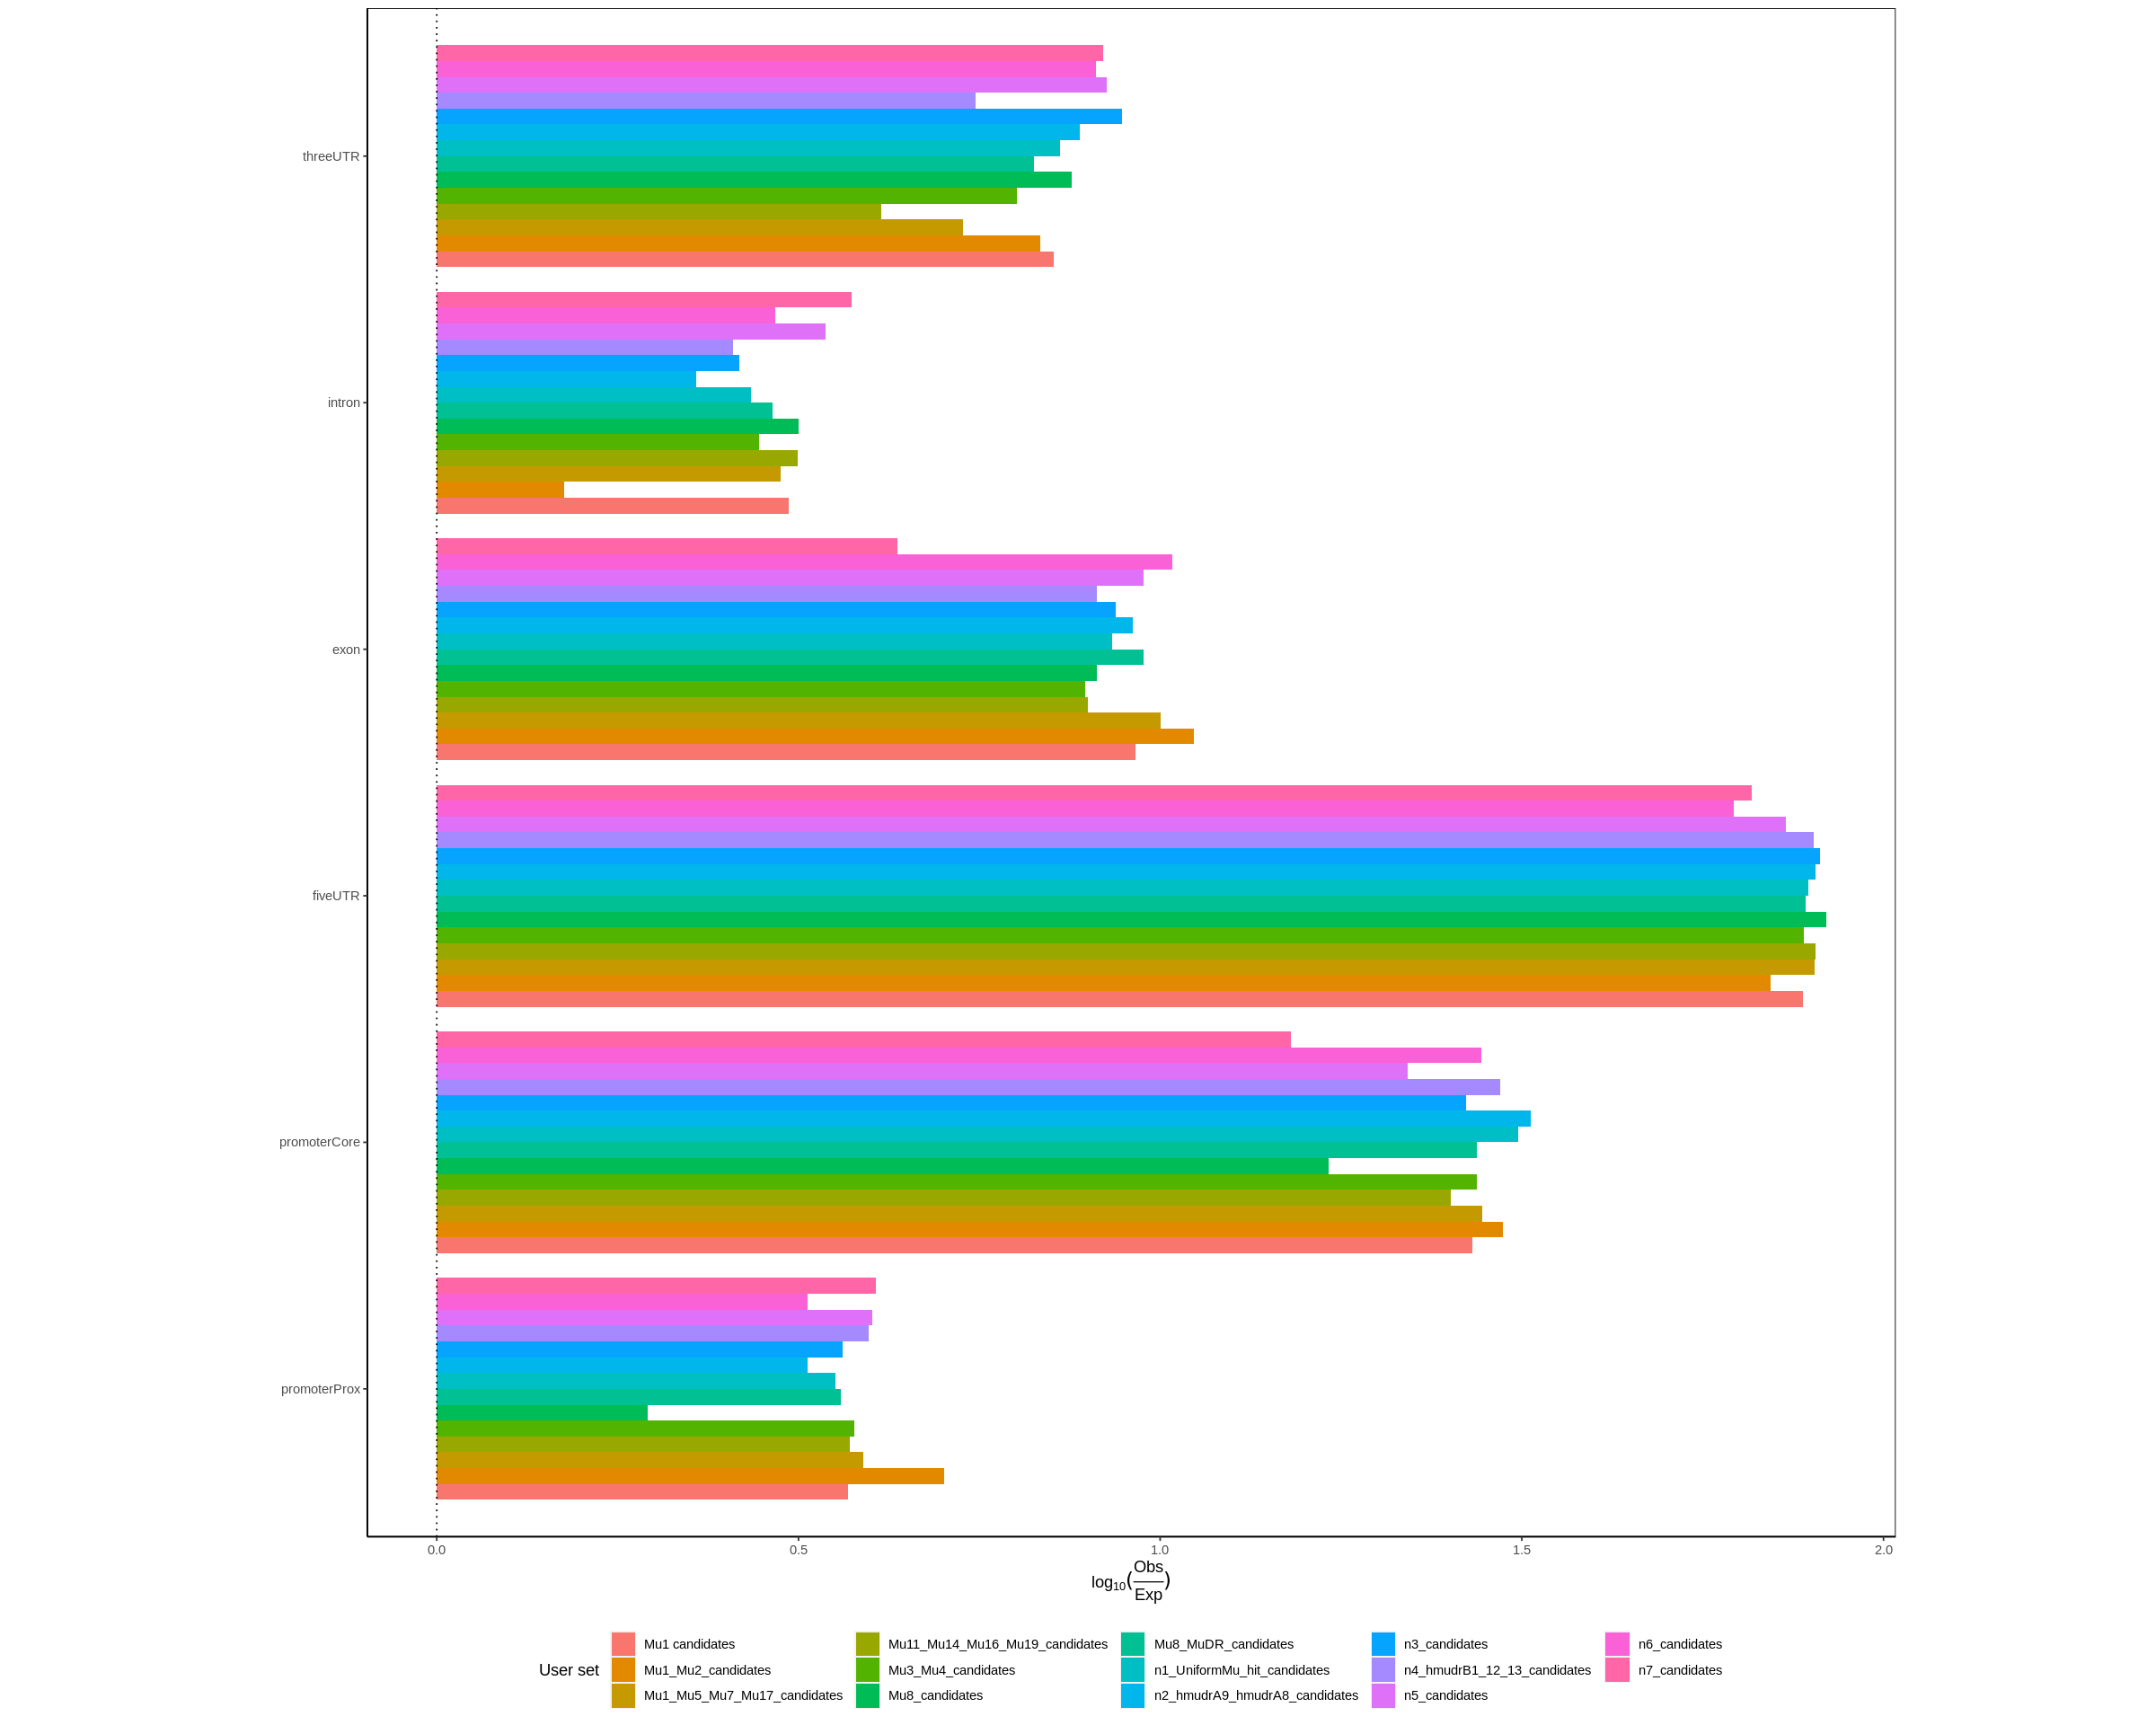

In [278]:
#make a queryList with all somatic vs. all germinal

gp = calcPartitions(queryList, partitionList)
#plotPartitions(gp, stacked = TRUE)

gp = calcExpectedPartitions(queryList, partitionList, genomeSize = 2182075994, remainder = FALSE, bpProportion = TRUE)

my_order <- c("promoterProx", "promoterCore", "fiveUTR", "exon", "intron", "threeUTR", "intergenic")
gp$partition <- factor(gp$partition, levels = my_order)

plotExpectedPartitions(gp)

In [279]:
gp %>%
  filter(name == "n7_candidates")

partition,observed,expected,log10OE,name
<fct>,<dbl>,<dbl>,<dbl>,<chr>
promoterCore,9,0.5930459,1.1811542,n7_candidates
promoterProx,45,11.1324999,0.6066198,n7_candidates
threeUTR,18,2.1577099,0.9212794,n7_candidates
fiveUTR,108,1.6438197,1.8175696,n7_candidates
exon,27,6.2287260,0.6369645,n7_candidates
intron,63,16.8247605,0.5733917,n7_candidates
NA,63,294.4194381,-0.6696259,n7_candidates


In [235]:
queryList

GRangesList object of length 14:
$`Mu1 candidates`
GRanges object with 7038 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]        1 169896445-169896453      *
     [2]        6 175308412-175308420      *
     [3]        6 172219092-172219100      *
     [4]       10     6826379-6826387      *
     [5]        3   66472682-66472690      *
     ...      ...                 ...    ...
  [7034]        4 175093230-175093238      *
  [7035]       10 138435388-138435396      *
  [7036]        1 205874844-205874852      *
  [7037]        5 204155201-204155209      *
  [7038]        6   12095583-12095591      *
  -------
  seqinfo: 30 sequences from an unspecified genome; no seqlengths

...
<13 more elements>

### Playing around with the clustering results

In [280]:
#B73
final_clstr_Museq_B73_1 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_1/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_2 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_2/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_3 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_3/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_4 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_4/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_5 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_5/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_6 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_6/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_7 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_7/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_8 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_8/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
#F7 (B73 mapped
final_clstr_Museq_F7_1 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-1//MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_F7_2 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-2//MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_F7_3 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-3//MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_F7_4 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-4//MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")



final_cluster_list <- list(
 "final_clstr_Museq_B73_1" = final_clstr_Museq_B73_1,
 "final_clstr_Museq_B73_2" = final_clstr_Museq_B73_2,
 "final_clstr_Museq_B73_3" = final_clstr_Museq_B73_3,
 "final_clstr_Museq_B73_4" = final_clstr_Museq_B73_4,
 "final_clstr_Museq_B73_5" = final_clstr_Museq_B73_5,
 "final_clstr_Museq_B73_6" = final_clstr_Museq_B73_6,
 "final_clstr_Museq_B73_7" = final_clstr_Museq_B73_7,
 "final_clstr_Museq_B73_8" = final_clstr_Museq_B73_8,
 "final_clstr_Museq_F7_1" = final_clstr_Museq_F7_1,
 "final_clstr_Museq_F7_2" = final_clstr_Museq_F7_2,
 "final_clstr_Museq_F7_3" = final_clstr_Museq_F7_3,
 "final_clstr_Museq_F7_4" = final_clstr_Museq_F7_4
)


final_clusters_reheadering <- function(my_list) {
  names(my_list) <- c("rep_read", "freq", "motif")
  my_list
}

#invisible(
final_cluster_list <- lapply(final_cluster_list, FUN = final_clusters_reheadering)
#)

In [281]:
#B73
all_B73_final_clstrs <- bind_rows(
  final_cluster_list[[1]][, c("freq", "motif")],
  final_cluster_list[[2]][, c("freq", "motif")],
  #no [[3]] 
  final_cluster_list[[4]][, c("freq", "motif")],
  final_cluster_list[[5]][, c("freq", "motif")],
  final_cluster_list[[6]][, c("freq", "motif")],
  final_cluster_list[[7]][, c("freq", "motif")],
  final_cluster_list[[8]][, c("freq", "motif")]
) %>%
  group_by(motif) %>%
  summarize(freq=sum(freq)) %>%
  arrange(desc(freq))

head(all_B73_final_clstrs, n=10)

#F7
all_F7_final_clstrs <- bind_rows(
  final_cluster_list[[9]][, c("freq", "motif")],
  final_cluster_list[[10]][, c("freq", "motif")],
  final_cluster_list[[11]][, c("freq", "motif")],
  final_cluster_list[[12]][, c("freq", "motif")]
) %>%
  group_by(motif) %>%
  summarize(freq=sum(freq)) %>%
  arrange(desc(freq))

head(all_F7_final_clstrs, n=10)

motif,freq
<chr>,<int>
CTCTCTTCGTCTATAATGGCAATTATCTC,17169
CGCTCTTCTTCTATAATGGCAATTATCTC,16847
CCCTCTTCGTCTATAATGGCAATTATCTC,15730
CGCTCTTCTTCCATAATGGCAATTATCTC,14826
CCCTCTTCTTCTATAATGGCAATTATCTC,9750
CGCTCTTCGTCCATAATGGCAATTATCTC,9409
CCCTCTTCTTCCATAATGGCAATTATCTC,7850
CGCTCTTCGTCTATAATGGCAATTGTCTC,363
CTCTCTTCGTCTATAATGGCAATTGTCTC,335


motif,freq
<chr>,<int>
CGCTCTTCTTCTATAATGGCAATTATCTC,14914
CGCTCTTCGTCCATAATGGCAATTATCTC,12482
CCCTCTTCGTCTATAATGGCAATTATCTC,11168
CGCTCTTCTTCCATAATGGCAATTATCTC,10529
CCCTCTTCTTCTATAATGGCAATTATCTC,8587
CCCTCTTCTTCCATAATGGCAATTATCTC,5990
CTCTCTTCGTCTATAATGGCAATTATCTC,2585
CGCTCTTCGTCTATAATGGCAATTATCTT,563
CGCTCTTCGTCTATAATGGCAATTATCTG,511


In [282]:
#B73
total_uncategorized_reads <- sum(all_B73_final_clstrs$freq)
#total_uncategorized_reads
#mil_perc <- total_uncategorized_reads/100

set <- all_B73_final_clstrs %>%
  filter(freq > 100)

total_uncategorized_reads <- sum(set$freq)

top_7_motifs <- sum(set$freq[1:7])

total_uncategorized_reads
top_7_motifs

round(
  (top_7_motifs/total_uncategorized_reads)*100,
  digits = 2
)

[1] 97520

[1] 91581

[1] 93.91

In [27]:
#F7
total_uncategorized_reads <- sum(all_F7_final_clstrs$freq)
#total_uncategorized_reads
#mil_perc <- total_uncategorized_reads/1000

set <- all_F7_final_clstrs %>%
  filter(freq > 100)

total_uncategorized_reads <- sum(set$freq)

top_7_motifs <- sum(all_F7_final_clstrs$freq[1:7])

total_uncategorized_reads
top_7_motifs

round(
  (top_7_motifs/total_uncategorized_reads)*100,
  digits = 2  
)

[1] 56655

[1] 46887

[1] 82.76

In [283]:
all_B73_final_clstrs <- all_B73_final_clstrs %>% mutate(lib = "B73")
all_F7_final_clstrs <- all_F7_final_clstrs %>% mutate(lib = "F7")


#manual ordering of factors so we can have the plot be ordered by B73 freqs only 
merged_final_clstrs <- bind_rows(all_B73_final_clstrs, all_F7_final_clstrs)
merged_final_clstrs$lib <- as.factor(merged_final_clstrs$lib)
merged_final_clstrs$motif <- factor(merged_final_clstrs$motif, levels = rev(all_B73_final_clstrs$motif))

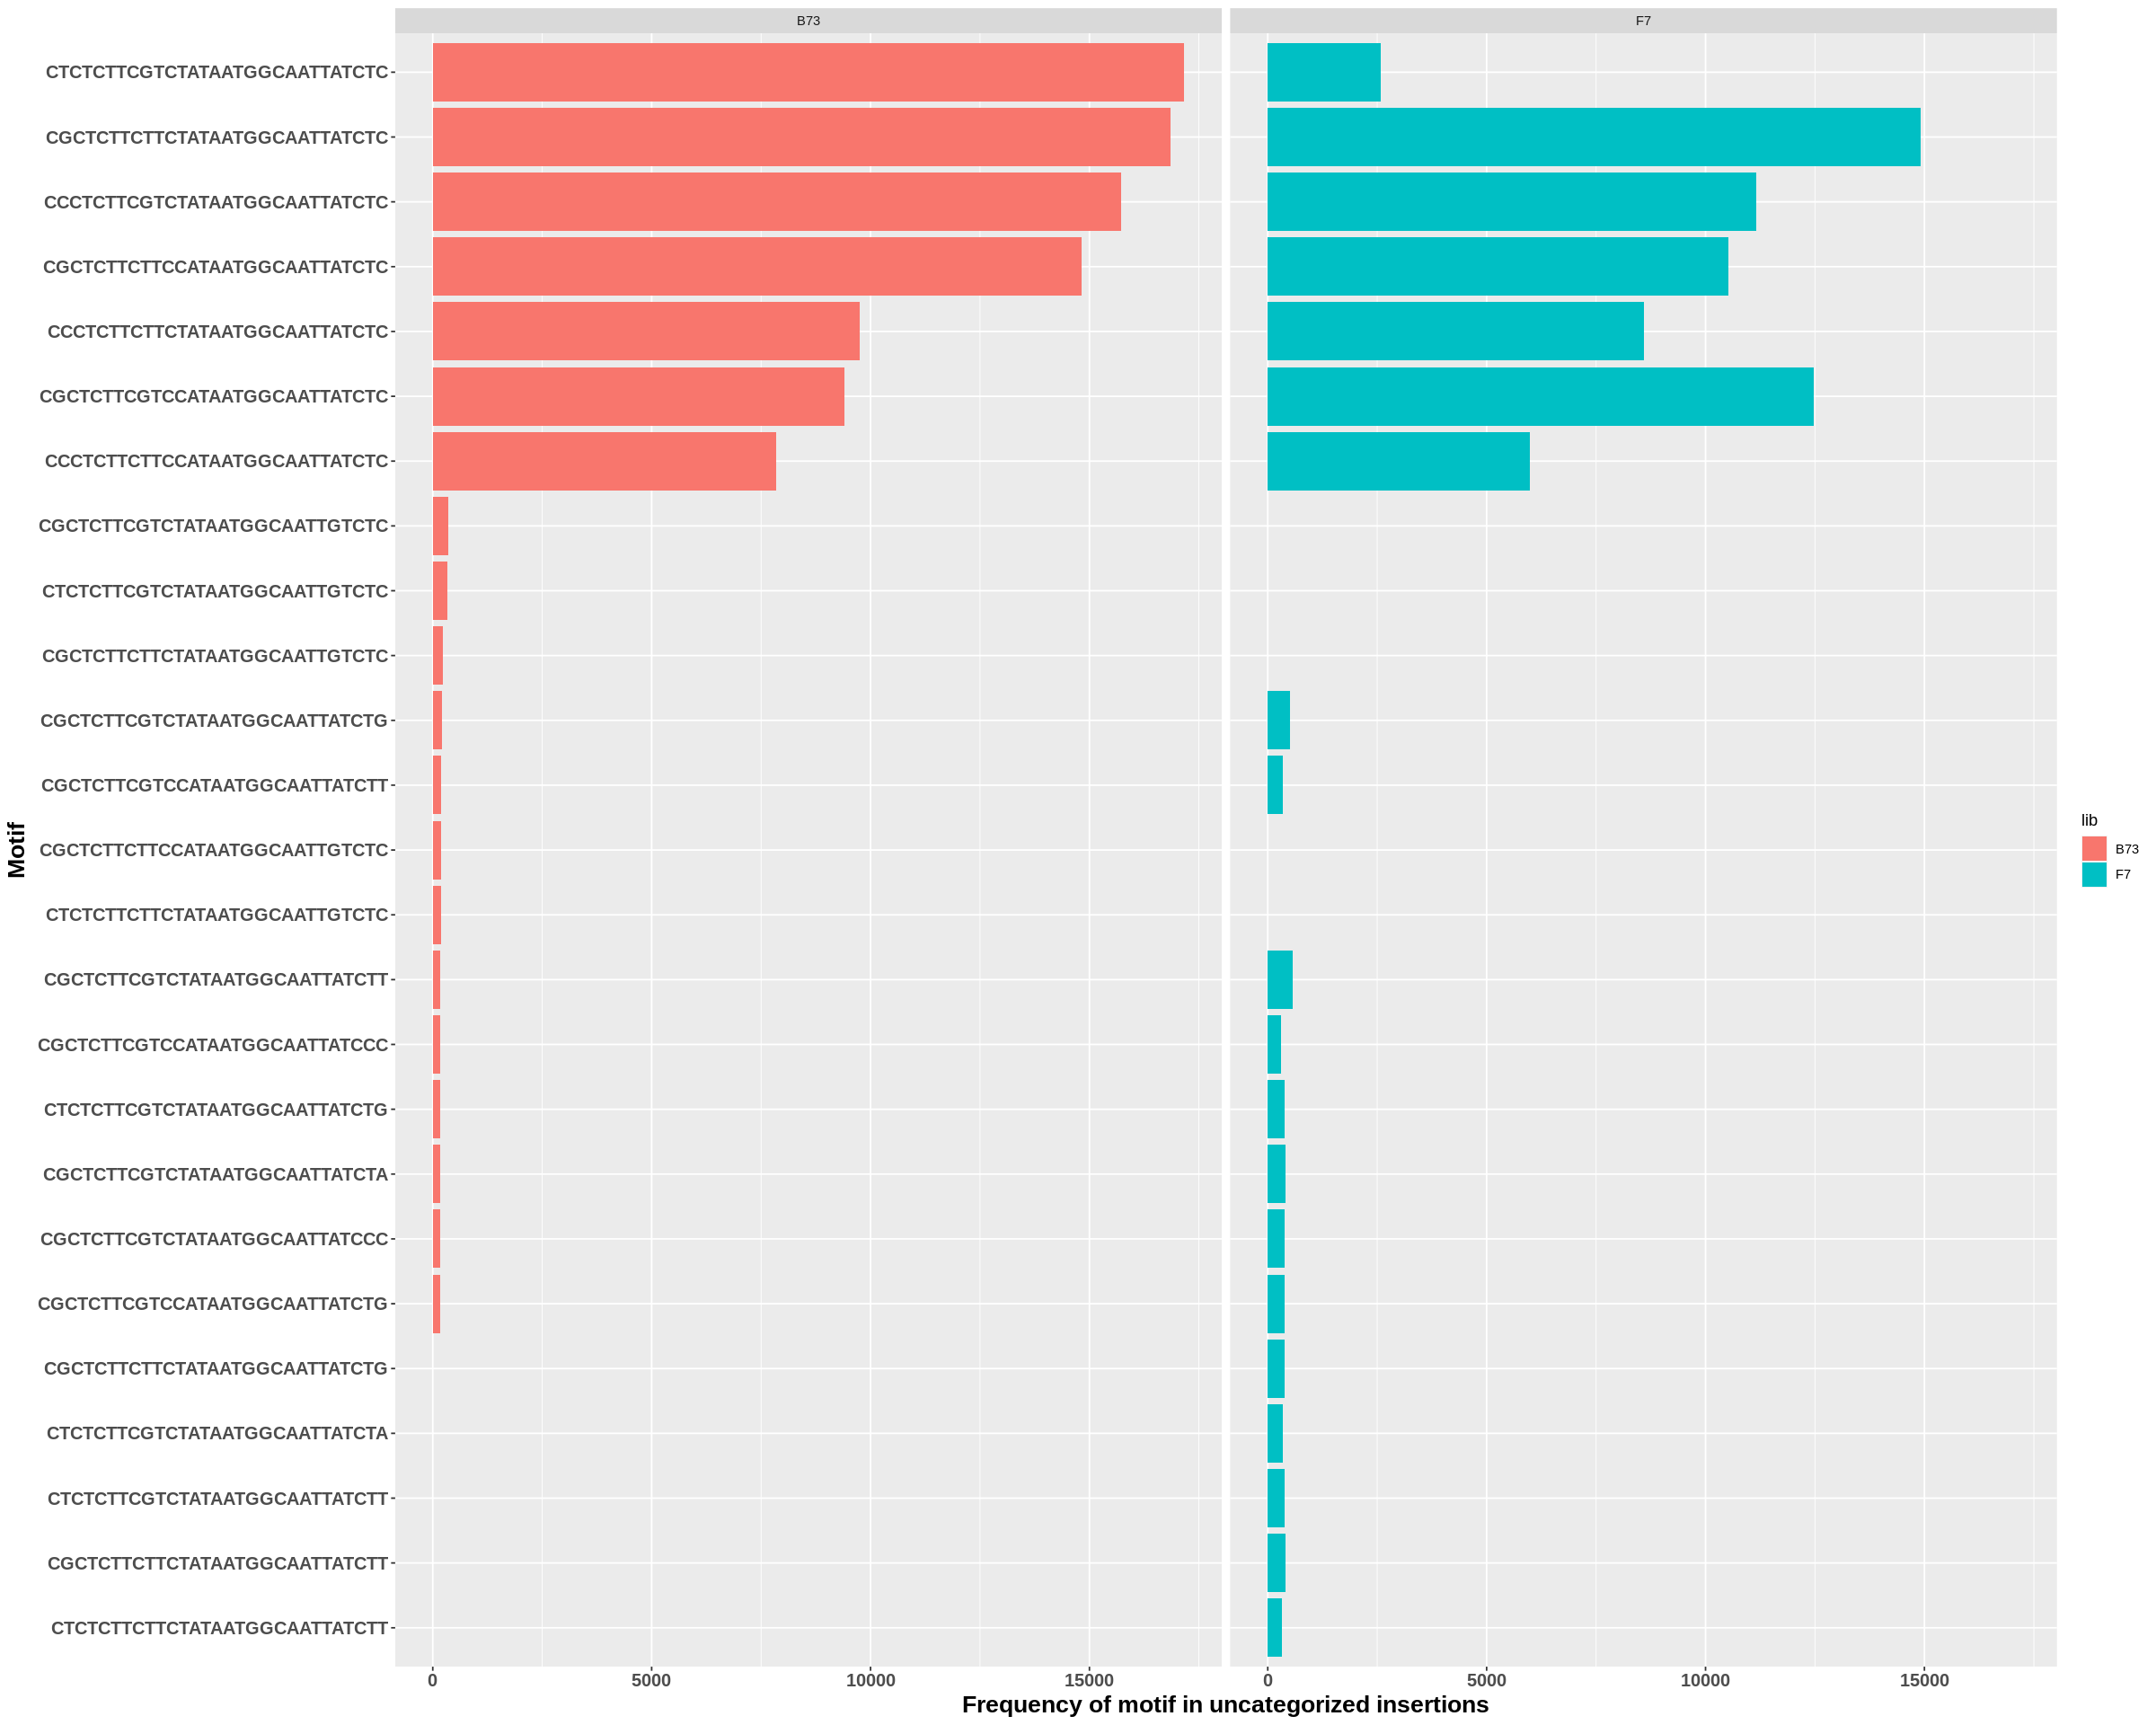

In [284]:
merged_final_clstrs %>%
  group_by(lib) %>%
  dplyr::slice(1:20) %>%
#  head(n=20) %>%
#  ungroup() %>%
#  arrange(desc(freq)) %>%
  #plotting
  #quick tips on reordering bars; https://sebastiansauer.github.io/ordering-bars/
#  ggplot(., aes(y= reorder(motif, freq), x=freq, fill = lib)) +
  ggplot(., aes(y= motif, x=freq, fill = lib)) +
#    geom_col(fill = "darkblue") +
    geom_col() +
    xlab("Frequency of motif in uncategorized insertions") +
    ylab("Motif") +
    theme(axis.text=element_text(size=12, face="bold"),
          axis.title=element_text(size=16,face="bold")) +
    facet_wrap(~lib)

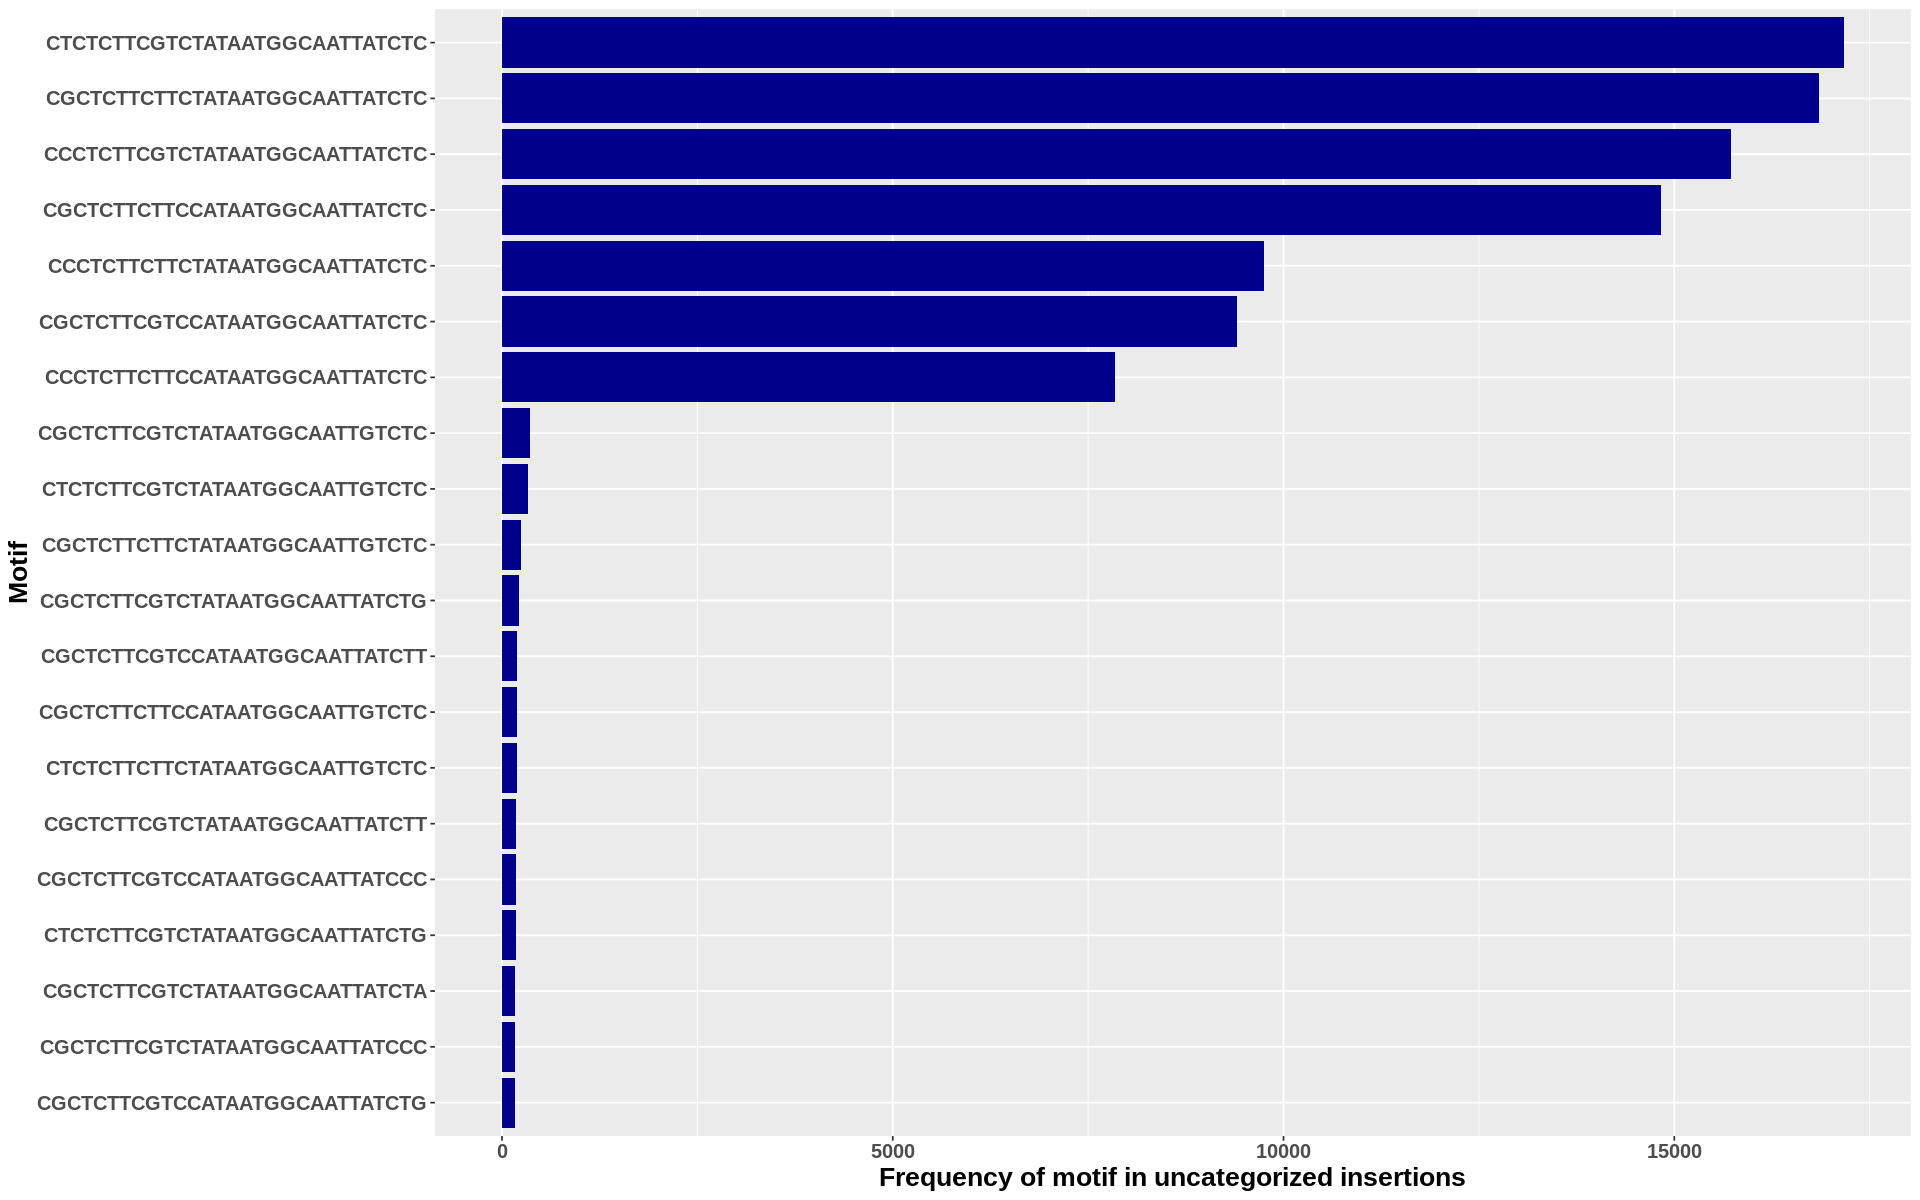

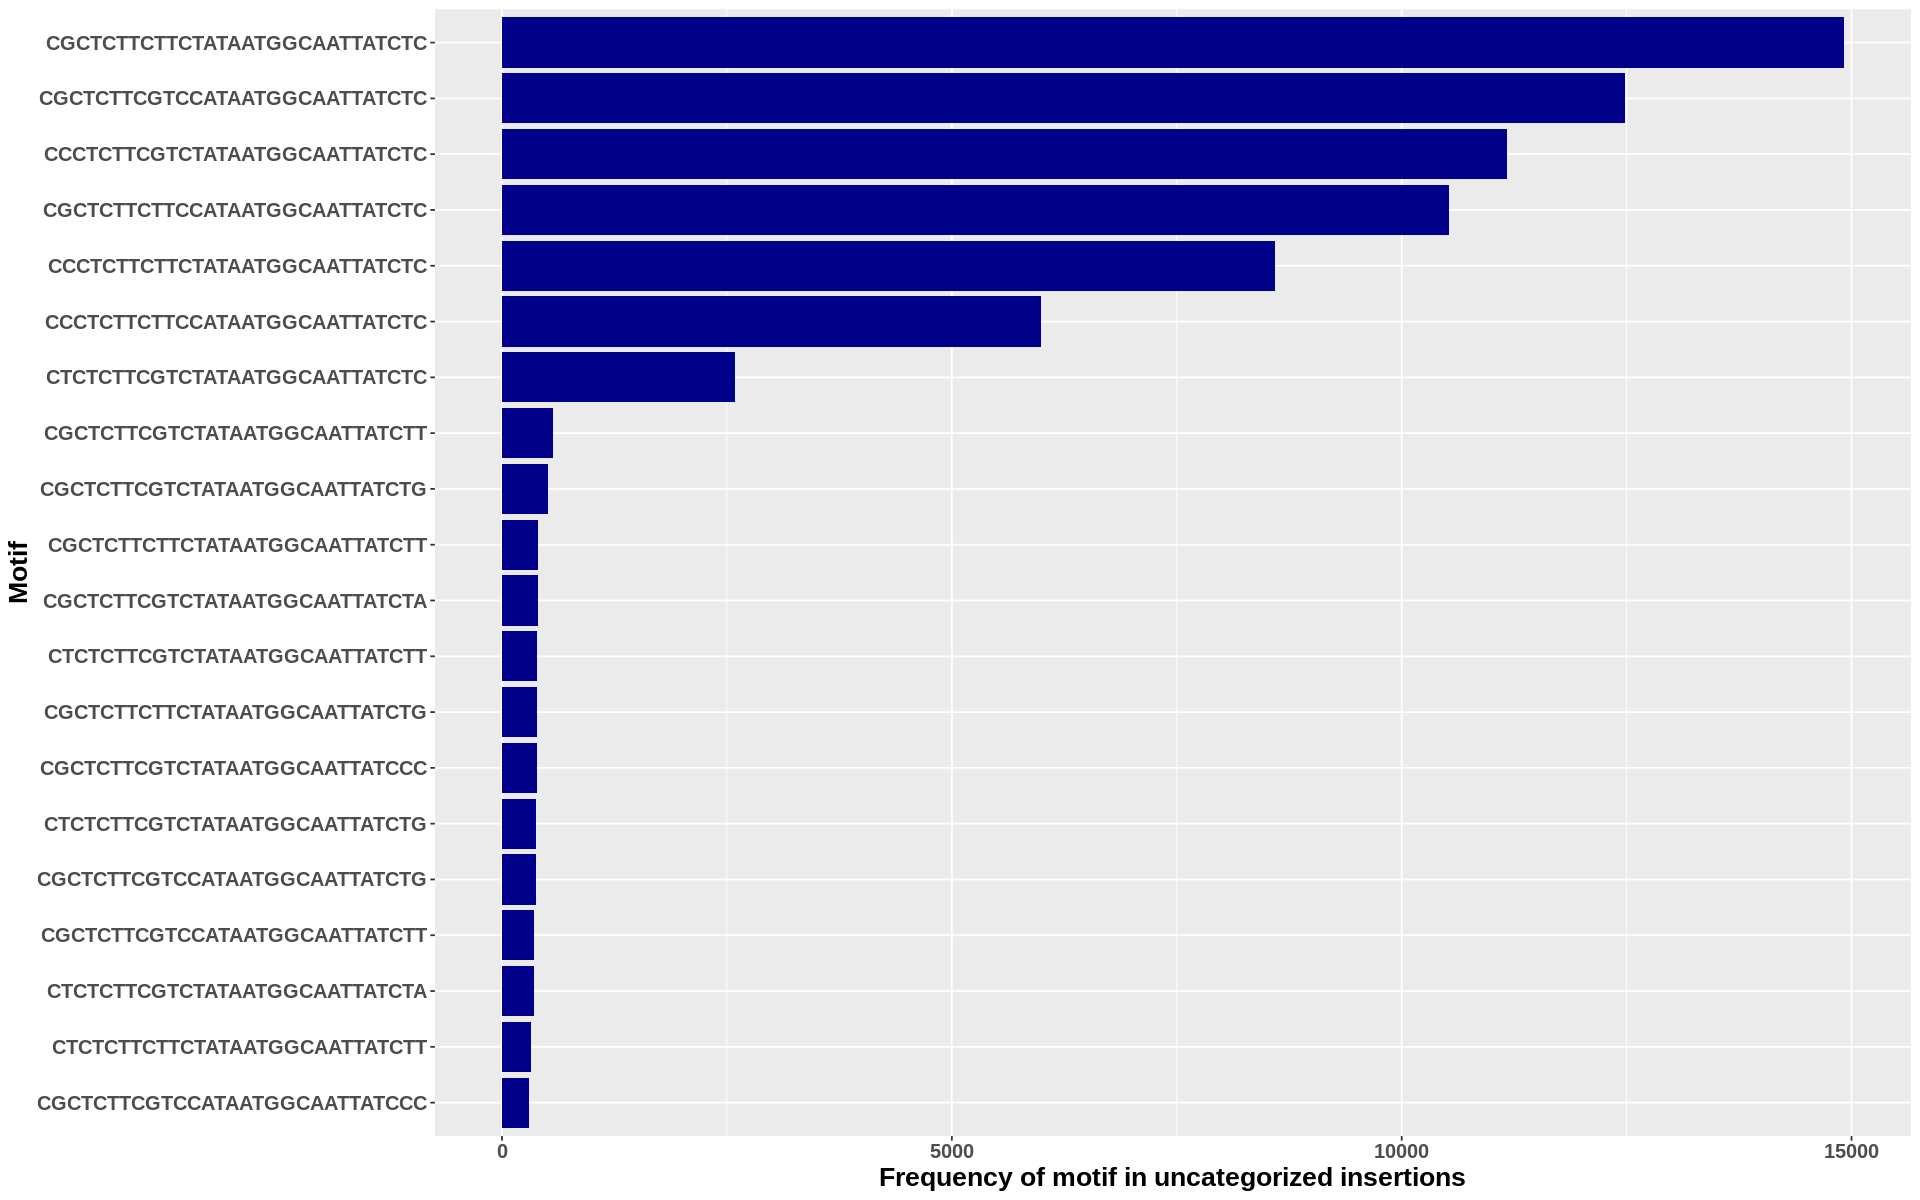

In [285]:
#or plotting seperately
options(repr.plot.width=16, repr.plot.height=10)

all_B73_final_clstrs %>%
  head(n = 20) %>%
  #plotting
  #quick tips on reordering bars; https://sebastiansauer.github.io/ordering-bars/
  ggplot(., aes(y= reorder(motif, freq), x=freq)) +
    geom_col(fill = "darkblue") +
    xlab("Frequency of motif in uncategorized insertions") +
    ylab("Motif") +
    theme(axis.text=element_text(size=12, face="bold"),
          axis.title=element_text(size=16,face="bold"))

all_F7_final_clstrs %>%
  head(n = 20) %>%
  #plotting
  #quick tips on reordering bars; https://sebastiansauer.github.io/ordering-bars/
  ggplot(., aes(y= reorder(motif, freq), x=freq)) +
    geom_col(fill = "darkblue") +
    xlab("Frequency of motif in uncategorized insertions") +
    ylab("Motif") +
    theme(axis.text=element_text(size=12, face="bold"),
          axis.title=element_text(size=16,face="bold"))

#### Plotting with ggtree

In [ ]:
# need to change tile sides for tile plot! - code in original Mu distribution notebook

### Tables for ordering scientists... primer help
#### Just do this for a master set of libraries and have lib in first column

In [316]:
Mu2_germinal_not_annotated_short <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_2/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_2")

Mu2_germinal_not_annotated_short %>%
  select(-ends_with("_L")) %>%
  select(-ends_with("_R")) %>%
  select(-ends_with("_total")) %>%
  select(-uncategorized, -all_max_value, -type_max_value, -type_n_max_value, -all_TIES, -type_TIES, -all_max_name, 
         -type_max_name, -all_n_max_value, -perc_uncategorized, -all_candidates) %>%
  relocate(lib, .before = GeneID) %>%
  head()

,lib,GeneID,Chr,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,Gene_length,stock,TotalReads,perc_best_type_of_types,type_candidates
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<chr>
1,Museq_2,Zm00001eb000010,1,34617,40204,Row_16,35211,35219,15,8,5588,A-0937,23,0.1304348,n5
2,Museq_2,Zm00001eb000010,1,34617,40204,Col_01,35211,35219,22,21,5588,A-0937,43,0.3255814,Mu1
3,Museq_2,Zm00001eb000020,1,41214,46762,Row_01,46017,46025,3,17,5549,A-0592,20,0.4500000,Mu1
4,Museq_2,Zm00001eb000020,1,41214,46762,Col_16,46017,46025,2,19,5549,A-0592,21,0.3333333,Mu1
5,Museq_2,Zm00001eb000020,1,41214,46762,Row_24,46274,46282,66,45,5549,A-1130,111,0.1981982,n1_UniformMu_hit
6,Museq_2,Zm00001eb000020,1,41214,46762,Col_02,46274,46282,12,6,5549,A-1130,18,0.3333333,n1_UniformMu_hit


### Code to add distance of insertion to ATG start site to tables

In [58]:
Museq_1_simple <- read.delim("~/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_1/MuWU/results/insertions_table_final/germinal_identified_insertions_annotated.csv",
                             sep=",", header=T)
tail(Museq_1_simple)

,GeneID,Chr,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,Gene_length,stock
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
54343,Zm00001eb442820,scaf_644,26538,31249,Row_24,26736,26744,10,5,4712,A-0569
54344,Zm00001eb442820,scaf_644,26538,31249,Col_17,26736,26744,2,5,4712,A-0569
54345,Zm00001eb442820,scaf_644,26538,31249,Row_02,27121,27129,6,3,4712,A-0038
54346,Zm00001eb442820,scaf_644,26538,31249,Col_14,27121,27129,3,2,4712,A-0038
54347,Zm00001eb442960,scaf_674,742,5274,Row_16,1042,1050,17,32,4533,A-0368
54348,Zm00001eb442960,scaf_674,742,5274,Col_08,1042,1050,3,9,4533,A-0368


In [214]:
B73v5_GFF3_SC <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.gtf",
                         sep="\t", header=FALSE, comment.char="#") %>%
                    filter(V3 == "start_codon")

In [216]:
B73v5_GFF3_SC_ex_1 <- B73v5_GFF3_SC %>%
  #filter down to coding sequence; only keep canonical transcript 1 per gene
  filter(str_detect(V9, "exon_number 1;")) %>%
  filter(str_detect(V9, "_T001;")) %>%
  #separate V9 annotation column & extract gene info
  tidyr::separate(., col = V9, sep = "; ", into = c("gene_id", NA, NA, NA, NA, NA, NA)) %>%
  #remove "gene_id " string form gene_id column entries
  mutate(gene_id = str_remove(string = .$gene_id, pattern = "gene_id ")) %>%
  #identify based on strandedness info where actual A of ATG start codon is
  #if e.g. "+" strand then V4 position of CDS since left->right reading frame
  dplyr::rename(., strand = V7) %>%
  mutate(ATG_pos = case_when(
                     strand == "-" ~ V5,
                     strand == "+" ~ V4
                   )
        )

nrow(B73v5_GFF3_SC_ex_1)
length(unique(B73v5_GFF3_SC_ex_1$gene_id))

B73v5_GFF3_SC_ex_1 %>%
  arrange(gene_id) %>%
  head(n=10)

#try to get further gene ATG positions
ex_1 <- unique(B73v5_GFF3_SC_ex_1$gene_id)



B73v5_GFF3_SC_ex_2 <- B73v5_GFF3_SC %>%
  #filter down to coding sequence; only keep canonical transcript 1 per gene
  filter(str_detect(V9, "exon_number 2;")) %>%
  filter(str_detect(V9, "_T001;")) %>%
  #separate V9 annotation column & extract gene info
  tidyr::separate(., col = V9, sep = "; ", into = c("gene_id", NA, NA, NA, NA, NA, NA)) %>%
  #remove "gene_id " string form gene_id column entries
  mutate(gene_id = str_remove(string = .$gene_id, pattern = "gene_id ")) %>%
  #identify based on strandedness info where actual A of ATG start codon is
  #if e.g. "+" strand then V4 position of CDS since left->right reading frame
  dplyr::rename(., strand = V7) %>%
  mutate(ATG_pos = case_when(
                     strand == "-" ~ V5,
                     strand == "+" ~ V4
                   ) 
  ) %>%
  #only look at genes not fulfilling prev. conditions
  filter(!gene_id %in% ex_1)


length(unique(B73v5_GFF3_SC_ex_2$gene_id))

head(B73v5_GFF3_SC_ex_2)


B73v5_GFF3_SC_ex_final <- bind_rows(B73v5_GFF3_SC_ex_1, B73v5_GFF3_SC_ex_2)

[1] 32261

[1] 32261

,V1,V2,V3,V4,V5,V6,strand,V8,gene_id,ATG_pos
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,ensembl,start_codon,34722,34724,.,+,0,Zm00001eb000010,34722
2,1,ensembl,start_codon,45911,45913,.,-,0,Zm00001eb000020,45913
3,1,ensembl,start_codon,189280,189282,.,-,0,Zm00001eb000060,189282
4,1,ensembl,start_codon,198830,198832,.,-,0,Zm00001eb000070,198832
5,1,ensembl,start_codon,209639,209641,.,-,0,Zm00001eb000100,209641
6,1,ensembl,start_codon,247225,247227,.,-,0,Zm00001eb000110,247227
7,1,ensembl,start_codon,315219,315221,.,+,0,Zm00001eb000120,315219
8,1,ensembl,start_codon,326895,326897,.,-,0,Zm00001eb000140,326897
9,1,ensembl,start_codon,328214,328216,.,+,0,Zm00001eb000150,328214


[1] 5157

,V1,V2,V3,V4,V5,V6,strand,V8,gene_id,ATG_pos
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,ensembl,start_codon,278983025,278983027,.,+,0,Zm00001eb056070,278983025
2,1,ensembl,start_codon,13037755,13037757,.,+,0,Zm00001eb004770,13037755
3,1,ensembl,start_codon,89482626,89482628,.,+,0,Zm00001eb022970,89482626
4,1,ensembl,start_codon,250928065,250928067,.,-,0,Zm00001eb048840,250928067
5,1,ensembl,start_codon,194246746,194246748,.,-,0,Zm00001eb035520,194246748
6,1,ensembl,start_codon,271470339,271470341,.,+,0,Zm00001eb054270,271470339


In [218]:
length(
unique(
B73v5_GFF3_SC_ex_final$gene_id
    ))

[1] 37418

In [212]:
#B73v5_GFF3_SC <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.gtf",
#                         sep="\t", header=FALSE, comment.char="#") %>%
#                    filter(V3 == "start_codon")

B73v5_GFF3_SC %>%
  #filter down to coding sequence; only keep canonical transcript 1 per gene
  filter(str_detect(V9, "exon_number 1;")) %>%
  filter(str_detect(V9, "_T001;")) %>%
  nrow()

[1] 10290

In [173]:
B73v5_GFF3_CDS_ex_final %>%
  filter(gene_id == "Zm00001eb000690")

V1,V2,V3,V4,V5,V6,strand,V8,gene_id,ATG_pos
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,ensembl,CDS,2811274,2811512,.,+,0,Zm00001eb000690,2811274


In [219]:
Museq_1_simple_ATG <- left_join(Museq_1_simple, B73v5_GFF3_SC_ex_final, by = c("GeneID" = "gene_id"), keep = TRUE) %>%
  select(-V1, -V2, -V3, -V4, -V5, -V6, -V8)

head(Museq_1_simple_ATG)

,GeneID,Chr,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,Gene_length,stock,strand,gene_id,ATG_pos
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,Zm00001eb000010,1,34617,40204,Row_21,39964,39972,7,3,5588,A-0494,+,Zm00001eb000010,34722
2,Zm00001eb000010,1,34617,40204,Col_14,39964,39972,3,5,5588,A-0494,+,Zm00001eb000010,34722
3,Zm00001eb000020,1,41214,46762,Row_16,45823,45831,7,9,5549,A-0365,-,Zm00001eb000020,45913
4,Zm00001eb000020,1,41214,46762,Col_05,45823,45831,4,4,5549,A-0365,-,Zm00001eb000020,45913
5,Zm00001eb000020,1,41214,46762,Row_09,46160,46168,10,3,5549,A-0212,-,Zm00001eb000020,45913
6,Zm00001eb000020,1,41214,46762,Col_20,46160,46168,12,3,5549,A-0212,-,Zm00001eb000020,45913


In [220]:
calc <- Museq_1_simple_ATG %>%
  mutate(InsertionStart_dist = abs(InsertionStart - ATG_pos)) %>%
  mutate(InsertionEnd_dist = abs(InsertionEnd - ATG_pos)) %>%
  #determine side of insertion - "left or right" in a sense
  mutate(InsertionSide = case_when(
                           InsertionStart_dist > InsertionEnd_dist ~ "left",
                           InsertionStart_dist < InsertionEnd_dist ~ "right",
                         )
  ) %>%
  mutate(ATG_distance = case_when(
                           strand == "+" & InsertionSide == "right" ~ paste0(InsertionStart_dist, " bp downstream of A from ATG"),
                           strand == "+" & InsertionSide == "left" ~ paste0(InsertionEnd_dist, " bp upstream of A from ATG"),
                           strand == "-" & InsertionSide == "right" ~ paste0(InsertionStart_dist, " bp upstream of A from ATG"),
                           strand == "-" & InsertionSide == "left" ~ paste0(InsertionEnd_dist, " bp downstream of A from ATG"),
#                           InsertionStart_dist < InsertionEnd_dist ~ "right",
                           TRUE ~ as.character("unclear CDS; e.g. non coding gene")
                         )
  )

head(calc, n=2)

#calc %>% arrange(InsertionStart_dist) %>% head(n=5)
#calc %>% filter(ATG_distance == "unclear CDS; e.g. non coding gene") %>% nrow()
calc %>% filter(str_detect(ATG_distance, "upstream")) %>% arrange(desc(ATG_distance)) %>% head()

,GeneID,Chr,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,Gene_length,stock,strand,gene_id,ATG_pos,InsertionStart_dist,InsertionEnd_dist,InsertionSide,ATG_distance
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,Zm00001eb000010,1,34617,40204,Row_21,39964,39972,7,3,5588,A-0494,+,Zm00001eb000010,34722,5242,5250,right,5242 bp downstream of A from ATG
2,Zm00001eb000010,1,34617,40204,Col_14,39964,39972,3,5,5588,A-0494,+,Zm00001eb000010,34722,5242,5250,right,5242 bp downstream of A from ATG


,GeneID,Chr,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,Gene_length,stock,strand,gene_id,ATG_pos,InsertionStart_dist,InsertionEnd_dist,InsertionSide,ATG_distance
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,Zm00001eb389980,9,115674470,115684495,Row_16,115674634,115674642,2,2,10026,A-0374,+,Zm00001eb389980,115675641,1007,999,left,999 bp upstream of A from ATG
2,Zm00001eb389980,9,115674470,115684495,Col_14,115674634,115674642,2,2,10026,A-0374,+,Zm00001eb389980,115675641,1007,999,left,999 bp upstream of A from ATG
3,Zm00001eb273580,6,98951685,98964845,Row_06,98964598,98964606,6,2,13161,A-0131,-,Zm00001eb273580,98954609,9989,9997,right,9989 bp upstream of A from ATG
4,Zm00001eb273580,6,98951685,98964845,Col_11,98964598,98964606,20,15,13161,A-0131,-,Zm00001eb273580,98954609,9989,9997,right,9989 bp upstream of A from ATG
5,Zm00001eb198730,4,201663089,201669797,Row_05,201663308,201663316,16,7,6709,A-0100,+,Zm00001eb198730,201664314,1006,998,left,998 bp upstream of A from ATG
6,Zm00001eb198730,4,201663089,201669797,Col_04,201663308,201663316,15,6,6709,A-0100,+,Zm00001eb198730,201664314,1006,998,left,998 bp upstream of A from ATG


In [323]:
#do it as function call

add_ATG_dist_info <- function(input, output) {
 
  Mu_ATG <- left_join(input, B73v5_GFF3_SC_ex_final, by = c("GeneID" = "gene_id"), keep = FALSE) %>%
    select(-V1, -V2, -V3, -V4, -V5, -V6, -V8)
  
  
  final <- Mu_ATG %>%
    mutate(InsertionStart_dist = abs(InsertionStart - ATG_pos)) %>%
    mutate(InsertionEnd_dist = abs(InsertionEnd - ATG_pos)) %>%
    #determine side of insertion - "left or right" in a sense
    mutate(InsertionSide = case_when(
                             InsertionStart_dist > InsertionEnd_dist ~ "left",
                             InsertionStart_dist < InsertionEnd_dist ~ "right",
                           )
    ) %>%
    mutate(ATG_distance = case_when(
                             strand == "+" & InsertionSide == "right" ~ paste0(InsertionStart_dist, " bp downstream of A from ATG"),
                             strand == "+" & InsertionSide == "left" ~ paste0(InsertionEnd_dist, " bp upstream of A from ATG"),
                             strand == "-" & InsertionSide == "right" ~ paste0(InsertionStart_dist, " bp upstream of A from ATG"),
                             strand == "-" & InsertionSide == "left" ~ paste0(InsertionEnd_dist, " bp downstream of A from ATG"),
                             TRUE ~ as.character("unclear CDS; e.g. non coding gene")
                           )
    ) %>%
    #drop additional info columns from final output
    select(-ATG_pos, -InsertionStart_dist, -InsertionEnd_dist, -InsertionSide)
    
  assign(paste0(output), final, envir = .GlobalEnv)
}
    

In [324]:
add_ATG_dist_info(Museq_1_simple, "test_Museq_1_simple")

In [325]:
head(test_Museq_1_simple, n=5)

,GeneID,Chr,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,Gene_length,stock,strand,ATG_distance
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,Zm00001eb000010,1,34617,40204,Row_21,39964,39972,7,3,5588,A-0494,+,5242 bp downstream of A from ATG
2,Zm00001eb000010,1,34617,40204,Col_14,39964,39972,3,5,5588,A-0494,+,5242 bp downstream of A from ATG
3,Zm00001eb000020,1,41214,46762,Row_16,45823,45831,7,9,5549,A-0365,-,82 bp downstream of A from ATG
4,Zm00001eb000020,1,41214,46762,Col_05,45823,45831,4,4,5549,A-0365,-,82 bp downstream of A from ATG
5,Zm00001eb000020,1,41214,46762,Row_09,46160,46168,10,3,5549,A-0212,-,247 bp upstream of A from ATG


In [ ]:
#use function to create tables for Marcon
#add_ATG_dist_info(Museq_1, "Museq_1_germinal_annotated")
#...

In [343]:
#### adding info of genomic partition to insertion 

In [362]:
#removing UTR regions from "exons"
zea_mays_GeneModels$exon <- setdiff(zea_mays_GeneModels$exon, zea_mays_GeneModels$five_prime_utr, ignore.strand=TRUE)
zea_mays_GeneModels$exon <- setdiff(zea_mays_GeneModels$exon, zea_mays_GeneModels$three_prime_utr, ignore.strand=TRUE)

#create intron partition
no_exon <- setdiff(zea_mays_GeneModels$gene, zea_mays_GeneModels$exon, ignore.strand=TRUE) 
no_exon_5utr <- setdiff(no_exon, zea_mays_GeneModels$five_prime_utr, ignore.strand=TRUE) 
no_exon_5utr_3utr <- setdiff(no_exon_5utr, zea_mays_GeneModels$three_prime_utr, ignore.strand=TRUE) 

zea_mays_GeneModels$intron <- no_exon_5utr_3utr


#transform to dataframe and label with partitions
zea_mays_v5_partitions_df <- bind_rows(
  as.data.frame(zea_mays_GeneModels$intron) %>% mutate(partition = "intron"),
  as.data.frame(zea_mays_GeneModels$five_prime_utr) %>% mutate(partition = "five_prime_UTR"),
  as.data.frame(zea_mays_GeneModels$three_prime_utr) %>% mutate(partition = "three_prime_UTR"),
  as.data.frame(zea_mays_GeneModels$exon) %>% mutate(partition = "exon"),
  as.data.frame(partitionList$promoterCore) %>% mutate(partition = "promoterCore"),
  as.data.frame(partitionList$promoterProx) %>% mutate(partition = "promoterProx")
) %>%
  select(-width, -strand) %>%
  mutate(seqnames = as.character(seqnames)) %>%
  dplyr::rename(Chr = seqnames)

head(zea_mays_v5_partitions_df)

,Chr,start,end,partition
,<chr>,<int>,<int>,<chr>
1,1,35319,36036,intron
2,1,36175,36258,intron
3,1,36505,36599,intron
4,1,36714,36821,intron
5,1,37005,37415,intron
6,1,37634,38020,intron


In [361]:
zea_mays_GeneModels$exon
zea_mays_GeneModels$five_prime_utr

GRanges object with 192651 ranges and 0 metadata columns:
           seqnames              ranges strand
              <Rle>           <IRanges>  <Rle>
       [1]        1         34617-35318      +
       [2]        1         36037-36174      +
       [3]        1         36259-36504      +
       [4]        1         36600-36713      +
       [5]        1         36822-37004      +
       ...      ...                 ...    ...
  [192647]       10 152015497-152015565      -
  [192648]       10 152015658-152015823      -
  [192649]       10 152284763-152286200      -
  [192650]       10 152286281-152286588      -
  [192651]       10 152286718-152287382      -
  -------
  seqinfo: 10 sequences from an unspecified genome; no seqlengths

GRanges object with 49605 ranges and 0 metadata columns:
          seqnames              ranges strand
             <Rle>           <IRanges>  <Rle>
      [1]        1         34617-34721      +
      [2]        1       328087-328213      +
      [3]        1       551078-551123      +
      [4]        1       679957-680018      +
      [5]        1     1003108-1003463      +
      ...      ...                 ...    ...
  [49601]       10 151810892-151811376      -
  [49602]       10 151948153-151948516      -
  [49603]       10 152012575-152012584      -
  [49604]       10 152015812-152015823      -
  [49605]       10 152287097-152287382      -
  -------
  seqinfo: 10 sequences from an unspecified genome; no seqlengths

In [363]:
fuzzyjoin::genome_left_join(test_Museq_1_simple, zea_mays_v5_partitions_df,
                            by = c("Chr" ="Chr","InsertionStart"="start", "InsertionEnd"="end")
                           ) %>% head(n=200)

,GeneID,Chr.x,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,Gene_length,stock,strand,ATG_distance,Chr.y,start,end,partition
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,Zm00001eb000010,1,34617,40204,Row_21,39964,39972,7,3,5588,A-0494,+,5242 bp downstream of A from ATG,1,39701,40204,three_prime_UTR
2,Zm00001eb000010,1,34617,40204,Col_14,39964,39972,3,5,5588,A-0494,+,5242 bp downstream of A from ATG,1,39701,40204,three_prime_UTR
3,Zm00001eb000020,1,41214,46762,Row_16,45823,45831,7,9,5549,A-0365,-,82 bp downstream of A from ATG,1,45593,45913,exon
4,Zm00001eb000020,1,41214,46762,Col_05,45823,45831,4,4,5549,A-0365,-,82 bp downstream of A from ATG,1,45593,45913,exon
5,Zm00001eb000020,1,41214,46762,Row_09,46160,46168,10,3,5549,A-0212,-,247 bp upstream of A from ATG,1,45914,46762,five_prime_UTR
6,Zm00001eb000020,1,41214,46762,Col_20,46160,46168,12,3,5549,A-0212,-,247 bp upstream of A from ATG,1,45914,46762,five_prime_UTR
7,Zm00001eb000060,1,188559,189581,Row_09,189532,189540,4,4,1023,A-0206,-,250 bp upstream of A from ATG,1,189283,189581,five_prime_UTR
8,Zm00001eb000060,1,188559,189581,Col_14,189532,189540,8,2,1023,A-0206,-,250 bp upstream of A from ATG,1,189283,189581,five_prime_UTR
9,Zm00001eb000060,1,188559,189581,Row_24,189533,189541,10,9,1023,A-0573,-,251 bp upstream of A from ATG,1,189283,189581,five_prime_UTR


In [345]:
?fuzzy_join

fuzzy_join {fuzzyjoin},R Documentation
x,A tbl
y,A tbl
by,Columns of each to join
match_fun,"Vectorized function given two columns, returning TRUE or FALSE as to whether they are a match. Can be a list of functions one for each pair of columns specified in by (if a named list, it uses the names in x). If only one function is given it is used on all column pairs."
multi_by,"Columns to join, where all columns will be used to test matches together"
multi_match_fun,"Function to use for testing matches, performed on all columns in each data frame simultaneously"
index_match_fun,"Function to use for matching tables. Unlike match_fun and index_match_fun, this is performed on the original columns and returns pairs of indices."
mode,"One of ""inner"", ""left"", ""right"", ""full"" ""semi"", or ""anti"""
...,Extra arguments passed to match_fun


### Helper Functions

GRanges object with 10 ranges and 0 metadata columns:
       seqnames    ranges strand
          <Rle> <IRanges>  <Rle>
   [1]        1 2000-5000      *
   [2]        1 2000-5000      *
   [3]        1 2000-5000      *
   [4]        1 2000-5000      *
   [5]        1 2000-5000      *
   [6]        1 2000-5000      *
   [7]        1 2000-5000      *
   [8]        1 2000-5000      *
   [9]        1 2000-5000      *
  [10]        1 2000-5000      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

GRanges object with 8 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]        1 2200-4400      *
  [2]        1 2200-4400      *
  [3]        1 2200-3800      *
  [4]        1 2200-3800      *
  [5]        1 2200-3200      *
  [6]        1 2200-3200      *
  [7]        1 2200-2600      *
  [8]        1 2200-2600      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

$d
[1]  1425  1425 -5499 -5499

$b
 [1] 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995

$c
[1] 1100 1100  800  800  500  500  200  200

$g
    [1] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [15] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [29] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [43] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [57] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [71] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [85] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [99] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [113] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [127] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [141] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [155] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [169] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [183] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [197] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [211] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [225] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [239] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [253] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [267] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [281] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [295] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [309] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [323] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [337] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [351] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [365] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [379] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [393] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [407] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [421] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [435] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [449] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [463] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [477] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [491] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [505] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [519] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [533] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [547] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [561] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [575] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [589] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [603] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [617] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [631] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [645] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [659] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [673] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [687] 1525 1525 1525 1525 1525 152

List of 4
 $ d: num [1:4] 1425 1425 -5499 -5499
 $ b: num [1:10] 1995 1995 1995 1995 1995 ...
 $ c: num [1:8] 1100 1100 800 800 500 500 200 200
 $ g: num [1:10000] 1525 1525 1525 1525 1525 ...
List of 4
 $ d: num [1:4] -1425 -1425 5499 5499
 $ b: num [1:10] -1995 -1995 -1995 -1995 -1995 ...
 $ c: num [1:8] -1100 -1100 -800 -800 -500 -500 -200 -200
 $ g: num [1:10000] -1525 -1525 -1525 -1525 -1525 ...


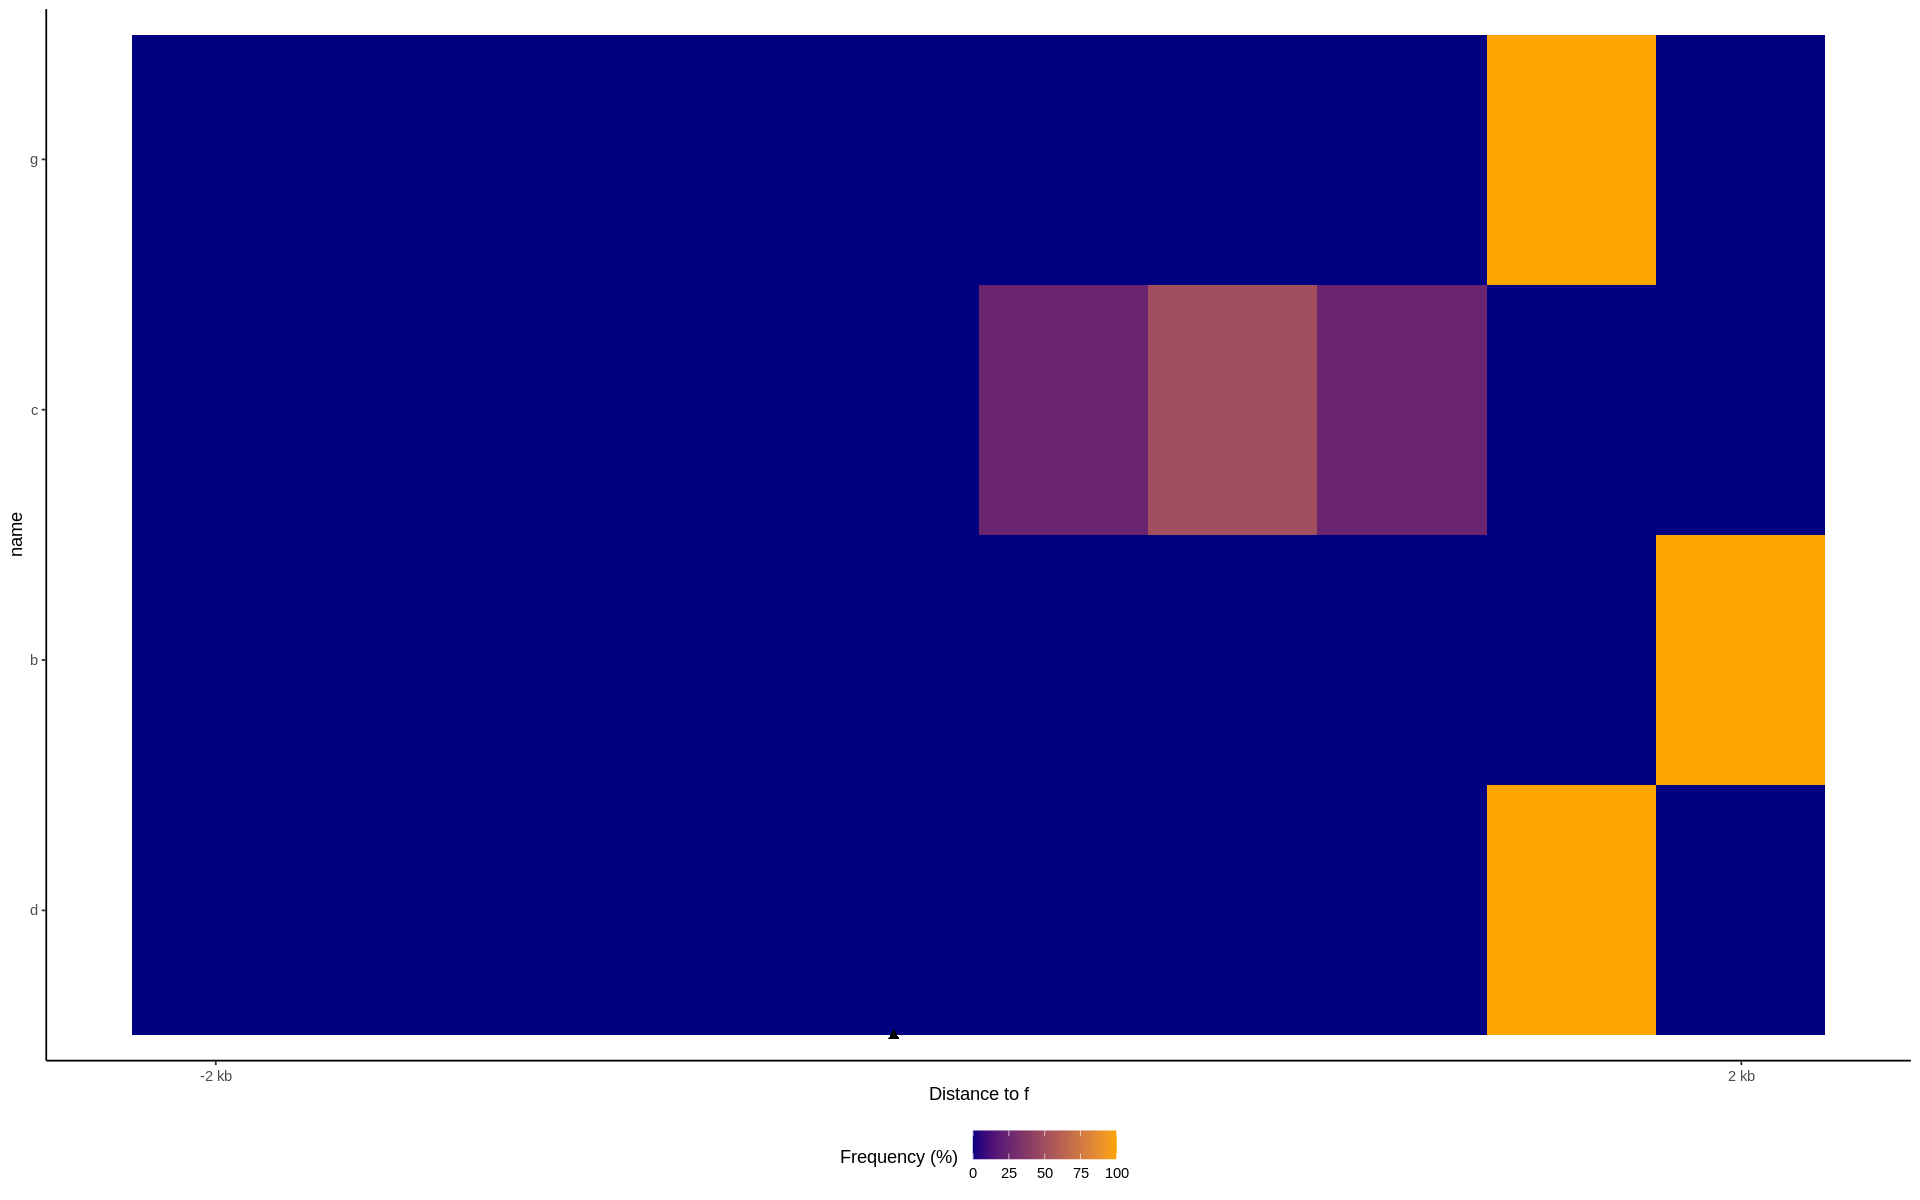

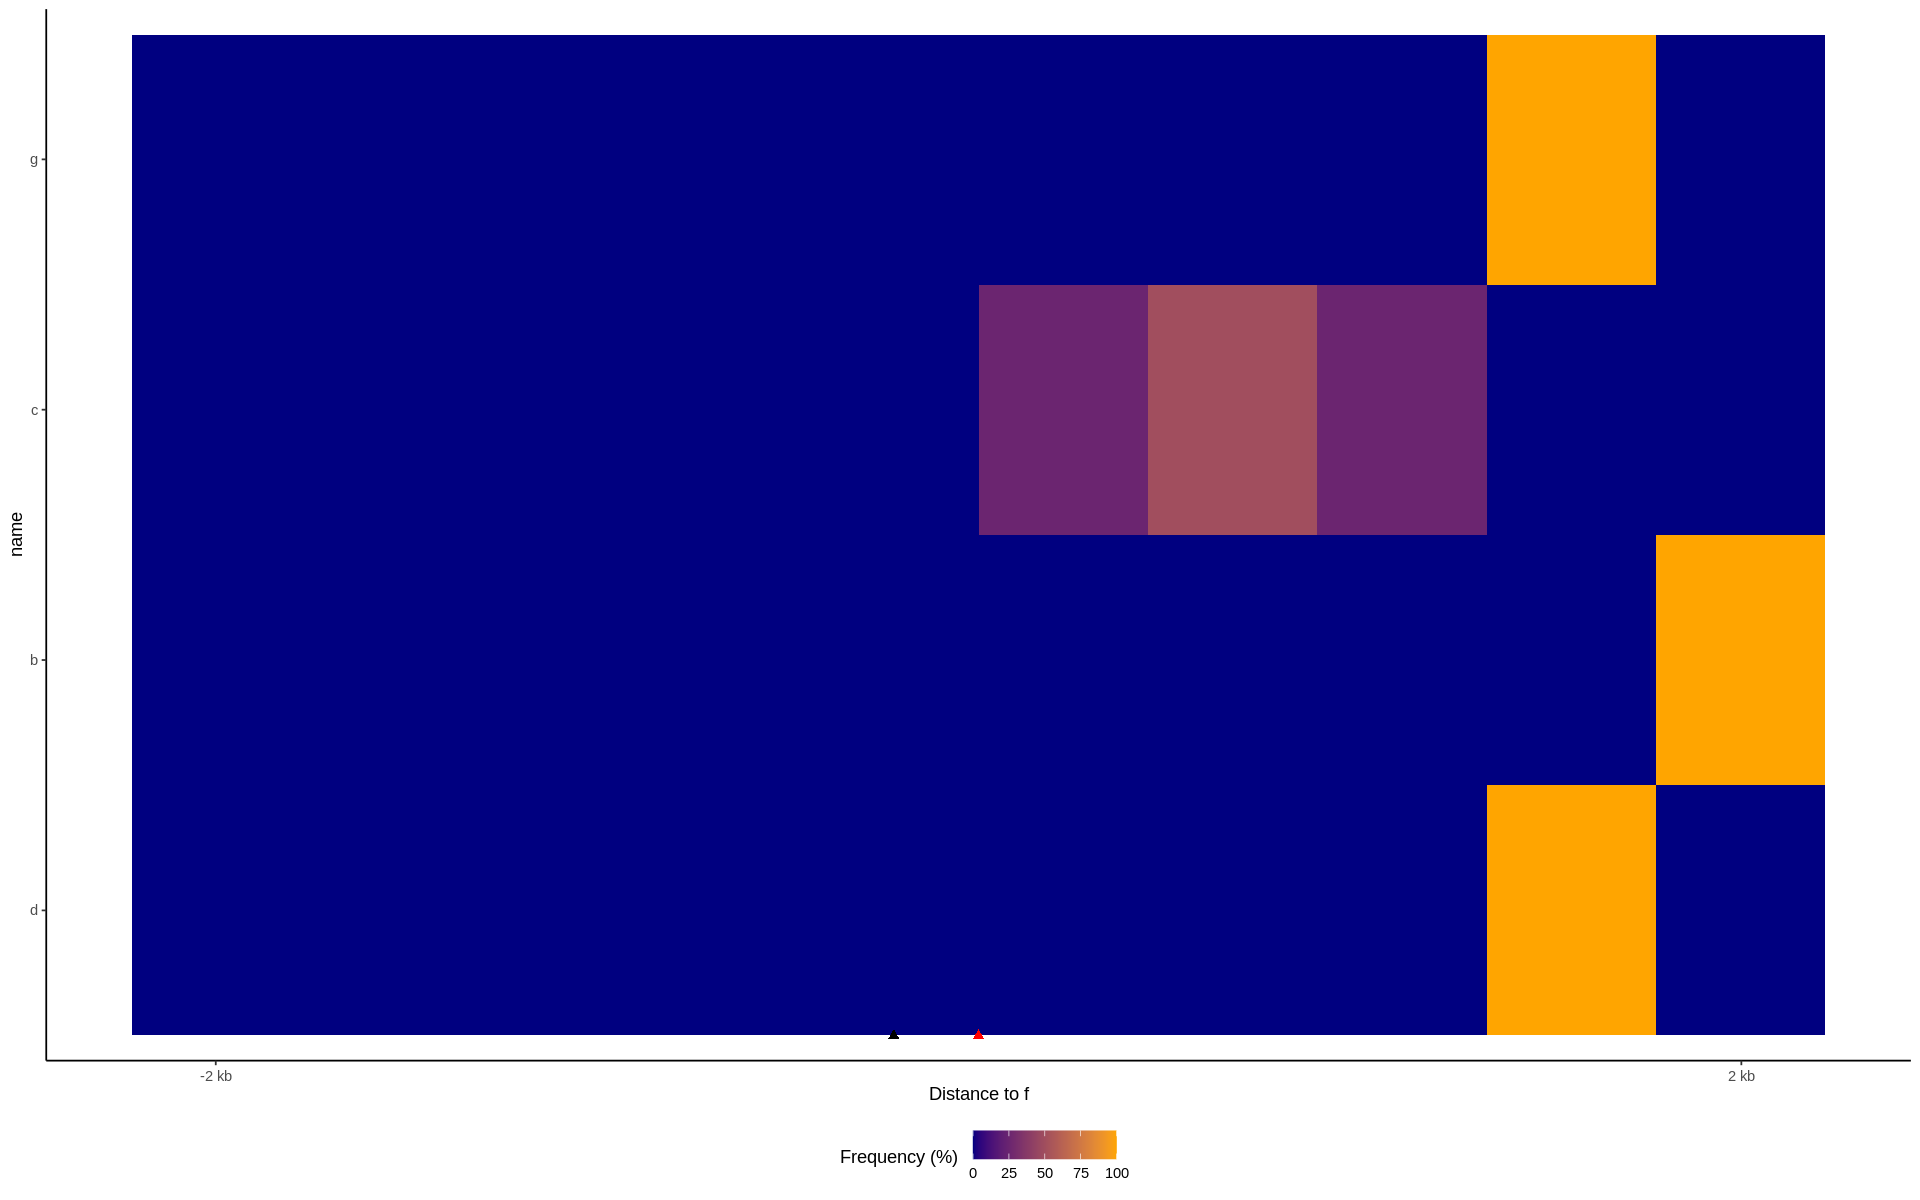

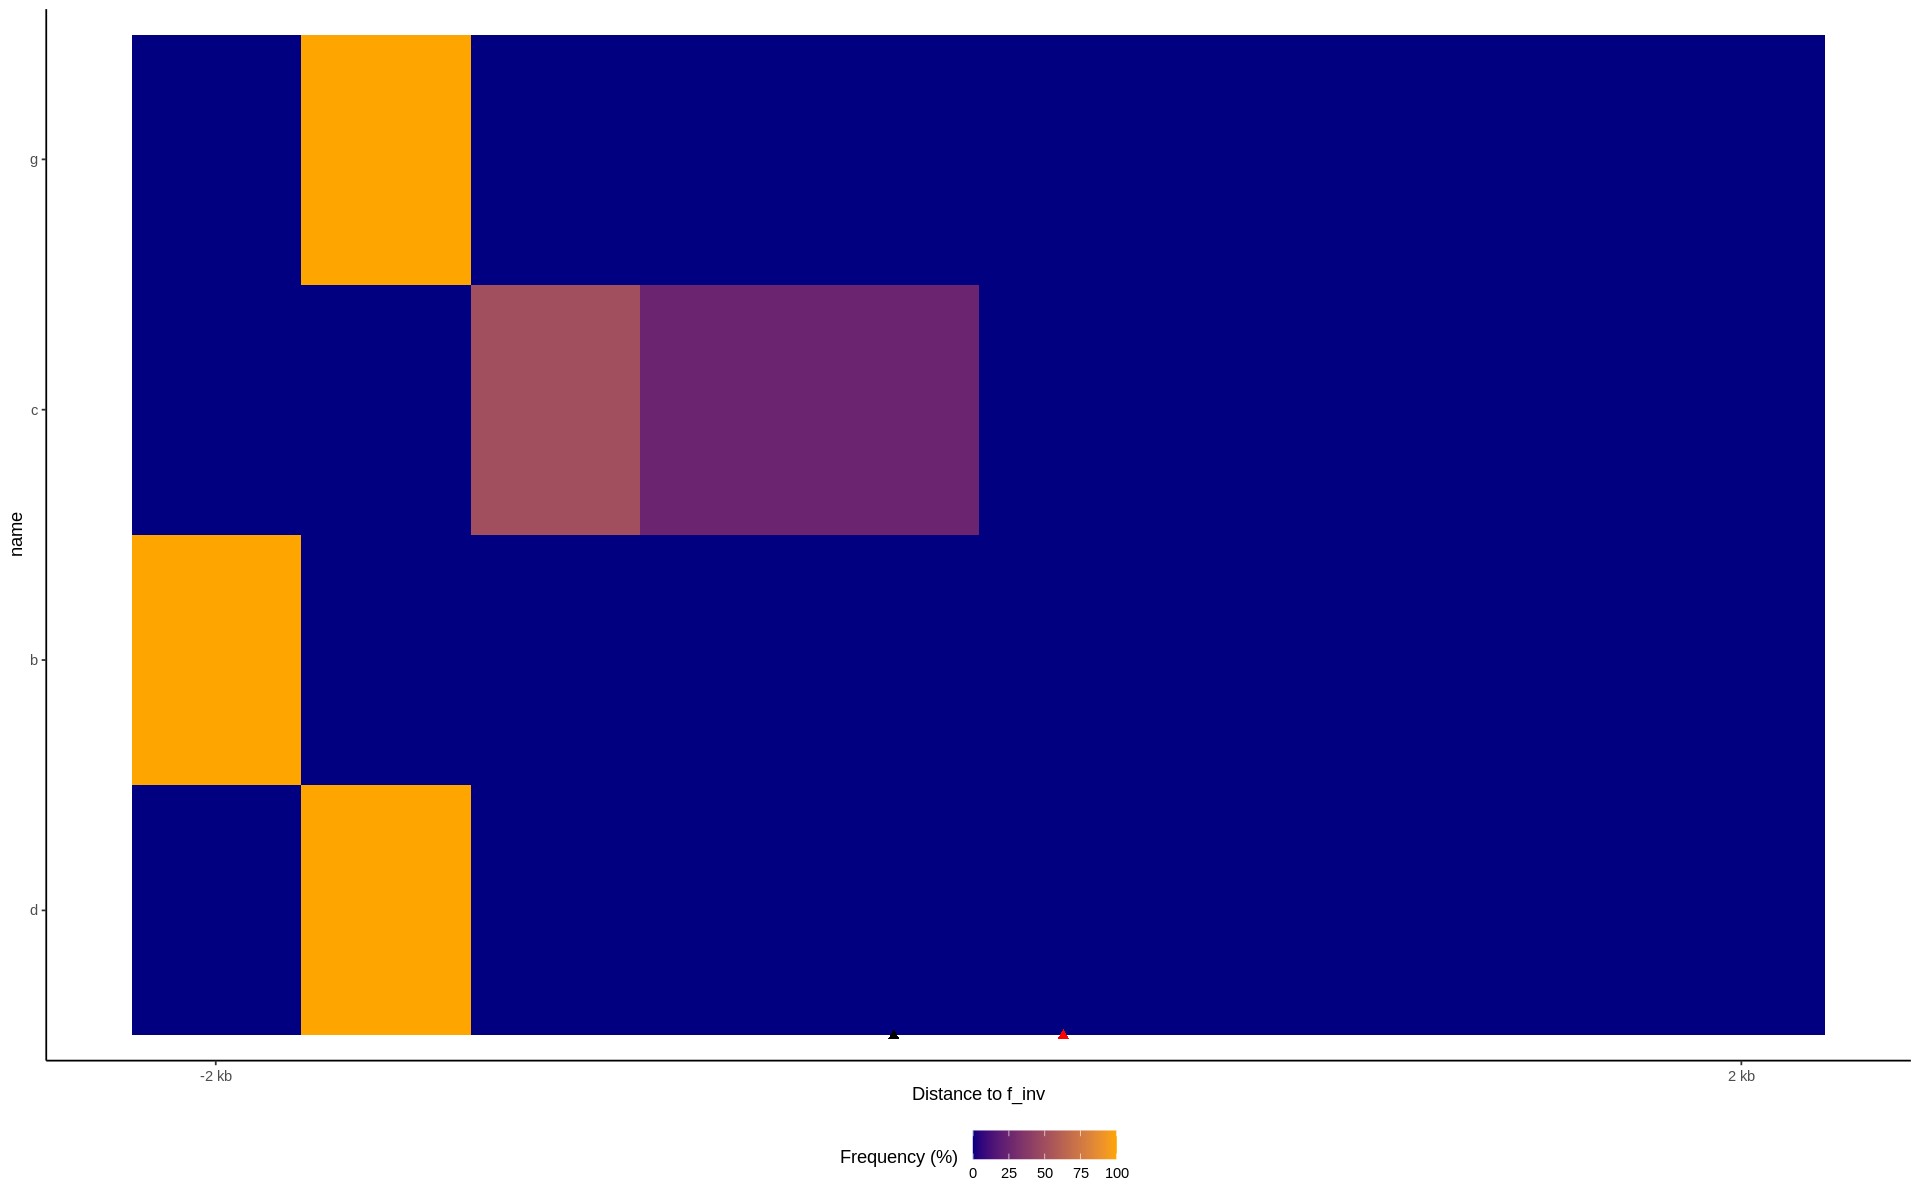

In [49]:
# important observation:
# calcFeatureDist returns the distance as positive or negative, depending on whether the feature is upstream or downstream
# this is rather unintuitive if you think about the region sets as in a genome browser <- upstream & -> downstream
# therefore I want to reverse the output simply by multiplying with -1
a <- GRanges(seqnames = rep("1", 10), 
             ranges = IRanges(start = rep(2000, 10), 
                              end = rep(5000, 10)))

b <- GRanges(seqnames = rep("1", 10), 
             ranges = IRanges(start = rep(1500, 10), 
                              end = rep(1510, 10)))

c <- GRanges(seqnames = c("1", "1", "1", "1", "1", "1", "1", "1"), 
             ranges = IRanges(start = c(2200, 2200, 2200, 2200, 2200, 2200, 2200, 2200), 
                              end = c(4400, 4400, 3800, 3800, 3200, 3200, 2600, 2600)))

d <- GRanges(seqnames = c("1", "1", "1", "1"), 
             ranges = IRanges(start = c(2050, 2050, 8999, 8999), 
                              end = c(2100, 2100, 9000, 9000)))

g <- GRanges(seqnames = rep("1", 10000), 
             ranges = IRanges(start = rep(1900, 10000), 
                              end = rep(2050, 10000)))

e <- GRangesList(d, b, c, g)
names(e) <- c("d", "b", "c", "g")

f <- calcFeatureDist(query = e, features = a)

a
c
f

quick_invert <- function(input){
  input *(-1)
}

str(f)
f_inv <- lapply(f, FUN = quick_invert)
str(f_inv)

#1.)by setting nbins as a variable we can add it to a secondary custom (+1) geom_point call
#   with this, we mark the first downstream bin with a red triangle
#2.) using the inverted vector we now are able to display it in a more logical left to right bp ordering:
#    upstream ... element ... downstream; making interpretation more straightforward
nbins=5

plotFeatureDist(f, featureName="f", size = 2000, nbins = nbins, tile = TRUE, labelOrder = "default")

plotFeatureDist(f, featureName="f", size = 2000, nbins = nbins, tile = TRUE, labelOrder = "default") + 
  geom_point(aes(x=nbins+1/2, y=0.5), color="red", 
                   size=2, shape=17, alpha=0.8)

plotFeatureDist(f_inv, featureName="f_inv", size = 2000, nbins = nbins, tile = TRUE, labelOrder = "default", infBins = FALSE) +
  geom_point(aes(x=nbins+1, y=0.5), color="red", 
                   size=2, shape=17, alpha=0.8)